In [1]:
%config InlineBackend.figure_format='retina'

In [2]:
import pandas as pd
from collections import defaultdict, Counter
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

## function 

In [3]:
import pandas as pd
from collections import defaultdict, Counter
from tqdm import tqdm

def calculate_next_letter_percentages(file_path, n, output_path=None, accuracy_prediction=True, verbose=False):
    with open(file_path, 'r') as file:
        sequence = file.readline().strip().upper()

    subseq_counts = defaultdict(Counter)

    # Traverse the sequence to populate subseq_counts
    for i in tqdm(range(len(sequence) - n), desc="Processing", leave=False):
    #for i in range(len(sequence) - n):
        subseq = sequence[i:i+n]
        next_letter = sequence[i+n]
        subseq_counts[subseq][next_letter] += 1

    # Calculate relative percentages
    subseq_percentages = {}
    for subseq, counts in subseq_counts.items():
        total_count = sum(counts.values())
        subseq_percentages[subseq] = {letter: round((count / total_count) * 100, 10) for letter, count in counts.items()}

    # Create a DataFrame with all possible next letters as columns
    all_letters = sorted(set(sequence))  # Ensure all letters are columns
    data = []
    for subseq, percentages in subseq_percentages.items():
        row = [subseq] + [percentages.get(letter, 0.0) for letter in all_letters]
        data.append(row)

    columns = ["Context"] + all_letters
    df = pd.DataFrame(data, columns=columns)
    df.sort_values(by="Context", inplace=True)

    if output_path is not None:
        df.to_csv(output_path, index=False)

    if accuracy_prediction:
        # Count the occurrences of each context
        context_counts = pd.Series(Counter([sequence[i:i+n] for i in range(len(sequence) - n)])).sort_index()
        total_contexts = len(sequence) - n
        context_relative_freq = round((context_counts / total_contexts * 100),10)
        
        # Identify the most likely nucleotide for each context
        most_likely_nucleotide = df.iloc[:, 1:].idxmax(axis=1)
        
        # Combine all the information into a single DataFrame
        df['Context_Count_Absolute'] = context_counts.values
        df['Context_Count_Relative'] = context_relative_freq.values
        df['Most_Likely_Nucleotide'] = most_likely_nucleotide
        df['accuracy_most_likely'] = df.apply(lambda row: row[row['Most_Likely_Nucleotide']], axis=1)
        
        # Reset index to make 'Context' a column
        df.reset_index(drop=True, inplace=True)
        best_average_accuracy = ((df['accuracy_most_likely'].sum()) / (4 ** int(n))).round(3)
        #print(f"The average best accuracy achievable with a {n} base context per base is: {best_average_accuracy}% \n")

        # Calculate the weighted sum over the accuracy_most_likely column using Context_Count_Relative
        best_accuracy = ((df['accuracy_most_likely'] * df['Context_Count_Relative']).sum() / 100).round(3)
        
        if verbose: print(f"The best accuracy achievable with a {n} base context is: {best_accuracy}% \n\n")

        total_combinations = 4 ** n  # Assuming 4 possible nucleotides (A, T, C, G)
        present_combinations = len(df)
        percentage_present = (present_combinations / total_combinations) * 100
        if verbose: print(f"Only {present_combinations} combinations present of {total_combinations}, i.e. {percentage_present:.2f}%")
        
        if output_path is not None:
            df.to_csv(output_path, index=False)

    return df, best_accuracy


## old Results only on t2t_valdata

In [4]:
t2t_traindata = '../genomic_data/t2t_genome/chr1.txt'
t2t_valdata   = '../genomic_data/t2t_genome/chr21.txt'
t2t_testdata  = '../genomic_data/t2t_genome/chr22.txt'

In [7]:
result = calculate_next_letter_percentages(t2t_valdata,0)
result.head(10)

The best accuracy achievable with a 0 base context is: 29.24% 


Only 1 combinations present of 1, i.e. 100.00%


AttributeError: 'tuple' object has no attribute 'head'

In [34]:
(29.12**2+20.97**2+20.68**2+29.24**2)/100

25.703553000000003

if model guessed by nucleotide frequencies, accuracy would not really be better than chance 
best achievable without any context is always guessing T, i.e. 29%

In [ ]:
result = calculate_next_letter_percentages(t2t_valdata,1)
result.head(10)

In [28]:
result = calculate_next_letter_percentages(t2t_valdata,2)
result.head(10)

Subsequence      A      C      G      T
0           AA  38.42  14.67  19.44  27.47
1           AC  39.82  22.53   6.48  31.17
11          AG  31.50  19.45  25.39  23.66
13          AT  27.36  16.90  24.78  30.96
8           CA  25.95  21.96  26.17  25.91
2           CC  34.37  26.08   8.31  31.23
3           CG  20.76  25.34  29.95  23.95
6           CT  17.23  26.57  29.02  27.18
10          GA  35.78  15.65  27.03  21.54
12          GC  32.38  28.24   8.69  30.70

In [29]:
result = calculate_next_letter_percentages(t2t_valdata,3)
result.head(10)

Subsequence      A      C      G      T
0          AAA  38.44  14.60  19.66  27.30
1          AAC  39.96  21.82   6.06  32.16
37         AAG  33.13  18.07  23.17  25.63
49         AAT  28.98  15.13  29.35  26.54
33         ACA  26.38  20.77  24.40  28.45
2          ACC  34.70  27.69   6.23  31.38
62         ACG  21.77  22.35  28.20  27.68
53         ACT  18.89  24.23  28.32  28.55
28         AGA  35.66  16.72  25.34  22.28
18         AGC  34.36  28.74   6.13  30.76

In [30]:
result = calculate_next_letter_percentages(t2t_valdata,4)
result.head(10)

Subsequence      A      C      G      T
162        AAAA  40.87  13.70  16.83  28.61
0          AAAC  41.13  21.22   5.06  32.58
167        AAAG  34.08  17.12  21.50  27.30
146        AAAT  37.72  13.75  22.66  25.87
181        AACA  31.58  19.41  22.05  26.95
1          AACC  34.61  28.92   4.69  31.79
248        AACG  25.36  17.40  30.74  26.50
188        AACT  23.18  24.24  24.49  28.09
109        AAGA  39.03  16.44  23.10  21.42
169        AAGC  40.11  24.04   6.46  29.38

In [31]:
result = calculate_next_letter_percentages(t2t_valdata,5)
result.head(10)

Subsequence      A      C      G      T
475       AAAAA  48.33  11.36  15.26  25.05
315       AAAAC  44.64  19.62   4.56  31.18
284       AAAAG  40.65  16.78  19.36  23.22
254       AAAAT  42.28  12.79  20.18  24.75
316       AAACA  35.05  18.99  20.50  25.46
0         AAACC  38.41  27.74   4.79  29.07
919       AAACG  27.72  18.24  24.52  29.52
344       AAACT  28.00  19.77  25.59  26.64
285       AAAGA  44.10  14.70  22.28  18.91
456       AAAGC  44.00  21.76   6.45  27.80

In [41]:
result,_= calculate_next_letter_percentages(t2t_valdata,1,accuracy_prediction=True)
result.head(10)

The average best accuracy achievable with a 1 base context per base is: 31.93% 

The best accuracy achievable with a 1 base context is: 32.019% 




Context      A      C      G      T  Context_Count_Absolute  \
0       A  32.99  17.44  22.39  27.18                13128223   
1       C  34.10  25.78   6.93  33.19                 9454120   
2       G  28.82  20.56  26.11  24.51                 9323964   
3       T  21.89  21.32  24.98  31.81                13184374   

   Context_Count_Relative Most_Likely_Nucleotide  accuracy_most_likely  
0                   29.12                      A                 32.99  
1                   20.97                      A                 34.10  
2                   20.68                      A                 28.82  
3                   29.24                      T                 31.81

In [11]:
accuracy_results = []

for window_size in range (3,11):
    print(f'For last {window_size} nucleotides:')
    result, best_accuracy = calculate_next_letter_percentages(t2t_valdata, window_size)
    print(result.sort_values(by="Context_Count_Relative"))
    accuracy_results.append((window_size, best_accuracy))

accuracy_df = pd.DataFrame(accuracy_results, columns=["Window_Size", "Best_Accuracy"])
print(accuracy_df)

# Optionally, save the accuracies DataFrame to a CSV file
accuracy_df.to_csv("best_accuracies_autoreg_chrom21.csv", index=False)

For last 3 nucleotides:
The best accuracy achievable with a 3 base context is: 34.072% 


Only 64 combinations present of 64, i.e. 100.00%
   Context          A          C          G          T  \
24     CGA  26.121225  17.091139  35.612299  21.175337   
54     TCG  24.915345  23.261492  27.983985  23.839178   
6      ACG  21.769120  22.351680  28.196830  27.682370   
27     CGT  15.272201  24.966540  36.560106  23.201152   
25     CGC  18.949645  37.435385  19.769614  23.845357   
..     ...        ...        ...        ...        ...   
55     TCT  17.057834  29.131928  26.141963  27.668275   
15     ATT  23.149706  21.865512  16.765116  38.219667   
3      AAT  28.982063  15.133829  29.347587  26.536521   
63     TTT  20.965420  21.353921  18.526069  39.154590   
0      AAA  38.437965  14.598526  19.660748  27.302761   

    Context_Count_Absolute  Context_Count_Relative Most_Likely_Nucleotide  \
24                  136012                0.301641                      G   
54        

KeyboardInterrupt: 

In [38]:
for window_size in range (10,13):
    print(f'For last {window_size} nucleotides:')
    result, best_accuracy = calculate_next_letter_percentages(t2t_valdata, window_size)
    print(result.sort_values(by="Context_Count_Relative"))
    accuracy_results.append((window_size, best_accuracy))

accuracy_df = pd.DataFrame(accuracy_results, columns=["Window_Size", "Best_Accuracy"])
print(accuracy_df)

# Optionally, save the accuracies DataFrame to a CSV file
accuracy_df.to_csv("best_accuracies_autoreg_chrom21.csv", index=False)

For last 10 nucleotides:
The best accuracy achievable with a 10 base context is: 50.524% 


Only 1012131 combinations present of 1048576, i.e. 96.52%
           Context           A         C           G           T  \
531890  GACGTCCGTT    0.000000  0.000000    0.000000  100.000000   
890534  TGACGGATCG  100.000000  0.000000    0.000000    0.000000   
699386  GTAATTGCGC  100.000000  0.000000    0.000000    0.000000   
699383  GTAATTGCCG    0.000000  0.000000  100.000000    0.000000   
440329  CGTTTTCCGA    0.000000  0.000000  100.000000    0.000000   
...            ...         ...       ...         ...         ...   
519261  GAATGGAATG    4.242200  5.146545   88.523040    2.088215   
231212  ATGGAATGGA   87.085111  3.579118    6.366037    2.969734   
58255   AATGGAATGG   96.108058  0.707810    1.397368    1.786765   
635008  GGAATGGAAT    5.453829  7.022765   83.630630    3.892776   
916922  TGGAATGGAA    6.561766  4.606042    1.709319   87.122873   

        Context_Count_Absolute  C

In [ ]:
result_9,_= calculate_next_letter_percentages(t2t_valdata,13,accuracy_prediction=True)
result_9.head(10)


The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [37]:
result_9[result_9['Context_Count_Absolute']==1]

Context      A      C      G      T  Context_Count_Absolute  \
1446    AAACCGGCG  100.0    0.0    0.0    0.0                       1   
1562    AAACGACGG    0.0    0.0  100.0    0.0                       1   
3480    AAATCGCGA    0.0    0.0    0.0  100.0                       1   
3482    AAATCGCGG    0.0    0.0  100.0    0.0                       1   
5734    AACCGCGCG    0.0  100.0    0.0    0.0                       1   
...           ...    ...    ...    ...    ...                     ...   
259097  TTTCGCGCG    0.0    0.0    0.0  100.0                       1   
259106  TTTCGCGTT    0.0  100.0    0.0    0.0                       1   
259176  TTTCGGTCG    0.0  100.0    0.0    0.0                       1   
259212  TTTCGTCGG    0.0  100.0    0.0    0.0                       1   
260939  TTTTCGCGC  100.0    0.0    0.0    0.0                       1   

        Context_Count_Relative Most_Likely_Nucleotide  accuracy_most_likely  
1446                  0.000002                      A                 100.0  
1562                  0.000002                      G                 100.0  
3480                  0.000002                      T                 100.0  
3482                  0.000002                      G                 100.0  
5734                  0.000002                      C                 100.0  
...                        ...                    ...                   ...  
259097                0.000002                      T                 100.0  
259106                0.000002                      C                 100.0  
259176                0.000002                      C                 100.0  
259212                0.000002                      C                 100.0  
260939                0.000002                      A                 100.0  

[1348 rows x 9 columns]

## summary

## better with train val and test

In [3]:
t2t_traindata = '../genomic_data/t2t_genome/chr1.txt'
t2t_valdata   = '../genomic_data/t2t_genome/chr21.txt'
t2t_testdata  = '../genomic_data/t2t_genome/chr22.txt'

In [4]:
def filter_by_absolute_count(df, threshold):
    filtered_df = df[df['Context_Count_Absolute'] >= threshold]
    return filtered_df

def merge_dataframes_on_context(dfs, labels, n, threshold=10, output_path=None):
    
    if len(dfs) != len(labels):
        raise ValueError("The number of DataFrames and labels must be the same.")
    
    # Prepare DataFrames by filtering low counts, dropping 'A', 'C', 'G', 'T' columns and renaming columns
    processed_dfs = []
    for df, label in zip(dfs, labels):
        df = filter_by_absolute_count(df, threshold)
        df = df.drop(columns=['A', 'C', 'G', 'T'])
        df = df.rename(columns=lambda x: f"{x}_{label}" if x != 'Context' else x)
        processed_dfs.append(df)
    
    # Merge all DataFrames on 'Context'
    merged_df = processed_dfs[0]
    for df in processed_dfs[1:]:
        merged_df = pd.merge(merged_df, df, on='Context', how='inner')  # Use inner join to ensure no NaN values
    
    # Filter rows where all 'Most_Likely_Nucleotide' columns contain the same value
    most_likely_cols = [col for col in merged_df.columns if col.startswith('Most_Likely_Nucleotide')]
    merged_df = merged_df[merged_df[most_likely_cols].nunique(axis=1) == 1]

    # Calculate the weighted sum over the accuracy_most_likely column using Context_Count_Relative
    best_accuracy_on_test = ((merged_df['accuracy_most_likely_test'] * merged_df['Context_Count_Relative_test']).sum() / 100).round(3)
    print(f"The best generalized accuracy achievable on the Test set with a {n} base context is: {best_accuracy_on_test}% \n\n")

    total_combinations = 4 ** n  #  4 possible nucleotides
    present_combinations = len(merged_df)
    percentage_present = (present_combinations / total_combinations) * 100
    print(f"Only {present_combinations} contexts of {total_combinations} generalise sufficiently between the sets, i.e. {percentage_present:.2f}%")
    
    if output_path is not None:
        merged_df.to_csv(output_path, index=False)

    return merged_df, best_accuracy_on_test, percentage_present
    

In [262]:
result_train,_= calculate_next_letter_percentages(t2t_traindata,2, accuracy_prediction=True)

In [263]:
result_train

Context          A          C          G          T  \
0       AA  36.616318  14.510977  19.323484  29.549221   
1       AC  38.922684  23.313014   5.746580  32.017722   
2       AG  31.625070  19.893283  25.834141  22.647506   
3       AT  23.236451  21.340571  25.720818  29.702160   
4       CA  25.653156  20.089822  27.465644  26.791377   
5       CC  35.030511  25.403360   5.729585  33.836544   
6       CG  34.536812  19.958289  24.964226  20.540673   
7       CT  17.977689  25.047412  29.094039  27.880859   
8       GA  38.753213  14.730881  26.175614  20.340292   
9       GC  33.563093  28.259158   5.868034  32.309715   
10      GG  34.044090  21.502730  23.846805  20.606375   
11      GT  21.884673  19.386621  30.284479  28.444227   
12      TA  31.516438  17.202683  20.322723  30.958156   
13      TC  34.171754  24.583662   7.000131  34.244453   
14      TG  26.586394  18.964998  28.754416  25.694192   
15      TT  20.710873  20.937012  20.193089  38.159026   

    Context_Count_Absolute  Context_Count_Relative Most_Likely_Nucleotide  \
0                 24544647                9.881602                      A   
1                 12127265                4.882401                      A   
2                 16936576                6.818615                      A   
3                 19991930                8.048692                      T   
4                 18056780                7.269606                      G   
5                 12875907                5.183802                      A   
6                  3137794                1.263267                      A   
7                 16946533                6.822624                      G   
8                 15965528                6.427674                      A   
9                 10409705                4.190916                      A   
10                13685653                5.509803                      A   
11                12003515                4.832580                      G   
12                15033463                6.052428                      A   
13                15604136                6.282179                      T   
14                18304378                7.369288                      G   
15                22763516                9.164524                      T   

    accuracy_most_likely  
0              36.616318  
1              38.922684  
2              31.625070  
3              29.702160  
4              27.465644  
5              35.030511  
6              34.536812  
7              29.094039  
8              38.753213  
9              33.563093  
10             34.044090  
11             30.284479  
12             31.516438  
13             34.244453  
14             28.754416  
15             38.159026

In [88]:
import pandas as pd

# Initialize an empty list to store the results
results = []

# Loop through the context sizes and calculate the accuracies
for i in range(11):
    train = pd.read_csv(f'autoregressive_best_model_calc/ordered_results/train/train_data_n_gramms_size_{i}.csv')
    test  = pd.read_csv(f'autoregressive_best_model_calc/ordered_results/test/test_data_n_gramms_size_{i}.csv')
    
    if 'Most_Likely_Nucleotide' in train.columns:
        # Create an empty column for accuracy_of_train_prediction
        test['accuracy_of_train_prediction'] = np.nan

        # Apply the lambda function only for valid indices
        for idx, row in train.iterrows():
            if row.name in test.index and row['Most_Likely_Nucleotide'] in test.columns:
                test.at[row.name, 'accuracy_of_train_prediction'] = test.at[row.name, row['Most_Likely_Nucleotide']]

        # Calculate best accuracy if the column was created
        if not test['accuracy_of_train_prediction'].isna().all():
            best_accuracy = ((test['accuracy_of_train_prediction'] * test['Context_Count_Relative']).sum() / 100).round(3)
        else:
            best_accuracy = ((test['A'] * test['Context_Count_Relative']).sum() / 100).round(3)
            print('.',end='')
    else:
        best_accuracy     = ((test['A'] * test['Context_Count_Relative']).sum() / 100).round(3)
        print('elseee case')
    
    accuracy_with_perfect_test = ((test['accuracy_most_likely'] * test['Context_Count_Relative']).sum() / 100).round(3)
    # Store the results in the list
    results.append({'context_size': i, 'best_accuracy_train': best_accuracy, 'accuracy_with_perfect_test': accuracy_with_perfect_test})
    
    print(f'context size {i}: {best_accuracy} with train set knowledge, but with perfect test set knowledge', end=' ')
    print(accuracy_with_perfect_test)

# Create a DataFrame from the results
Basic_summary_train = pd.DataFrame(results)

# Save the DataFrame to a CSV file
Basic_summary_train.to_csv('autoregressive_best_model_calc/ordered_results/Basic_summary_train.csv', index=False)
#context size 11: 26.182 with train set knowledge, but with perfect test set knowledge 61.176

context size 0: 27.186 with train set knowledge, but with perfect test set knowledge 27.186
context size 1: 29.789 with train set knowledge, but with perfect test set knowledge 30.044
context size 2: 32.24 with train set knowledge, but with perfect test set knowledge 32.703
context size 3: 32.478 with train set knowledge, but with perfect test set knowledge 33.765
context size 4: 34.182 with train set knowledge, but with perfect test set knowledge 35.899
context size 5: 35.332 with train set knowledge, but with perfect test set knowledge 38.627
context size 6: 37.798 with train set knowledge, but with perfect test set knowledge 42.11
context size 7: 39.724 with train set knowledge, but with perfect test set knowledge 45.615
context size 8: 41.737 with train set knowledge, but with perfect test set knowledge 48.681
context size 9: 27.409 with train set knowledge, but with perfect test set knowledge 51.816
context size 10: 26.494 with train set knowledge, but with perfect test set knowle

In [2]:
import pandas as pd
import numpy as np


# Initialize an empty list to store the results
results = []

# Loop through the context sizes and calculate the accuracies
for i in range(11):
    train = pd.read_csv(f'autoregressive_best_model_calc/ordered_results/train/train_data_n_gramms_size_{i}.csv')
    test  = pd.read_csv(f'autoregressive_best_model_calc/ordered_results/test/test_data_n_gramms_size_{i}.csv')
    
    if 'Most_Likely_Nucleotide' in train.columns:
        # Create an empty column for accuracy_of_train_prediction
        test['accuracy_of_train_prediction'] = np.nan

        # Apply the lambda function only for valid indices
        for idx, row in train.iterrows():
            if row.name in test.index and row['Most_Likely_Nucleotide'] in test.columns:
                test.at[row.name, 'accuracy_of_train_prediction'] = test.at[row.name, row['Most_Likely_Nucleotide']]

        # Calculate best accuracy if the column was created
        if not test['accuracy_of_train_prediction'].isna().all():
            best_accuracy_on_matching_rows = ((test['accuracy_of_train_prediction'] * test['Context_Count_Relative']).sum() / 100).round(3)
        #else:
        #    best_accuracy_on_matching_rows = ((test['A'] * test['Context_Count_Relative']).sum() / 100).round(3)
        #    print('.',end='')
    #else:
    #    best_accuracy     = ((test['A'] * test['Context_Count_Relative']).sum() / 100).round(3)
    #    print('elseee case')
    
    accuracy_with_perfect_test = ((test['accuracy_most_likely'] * test['Context_Count_Relative']).sum() / 100).round(3)
    
    matching_row_perc=     len(set(test['Context']) & set(train['Context']))/len(test)
    non_matching_row_perc= len(set(test['Context']) - set(train['Context']))/len(test)
    print('best_accuracy_on_matching_rows:',best_accuracy_on_matching_rows,'on',matching_row_perc)
    print('non_matching rows perc:',non_matching_row_perc)
    best_accuracy= matching_row_perc* best_accuracy_on_matching_rows + 0* non_matching_row_perc

    # Store the results in the list
    results.append({'context_size': i, 'best_accuracy_train': best_accuracy, 'accuracy_with_perfect_test': accuracy_with_perfect_test})
    
    print(f'context size {i}: {best_accuracy} with train set knowledge, but with perfect test set knowledge', end=' ')
    print(accuracy_with_perfect_test)

# Create a DataFrame from the results
Basic_summary_train = pd.DataFrame(results)

# Save the DataFrame to a CSV file
#Basic_summary_train.to_csv('autoregressive_best_model_calc/ordered_results/Basic_summary_train.csv', index=False)
#context size 11: 26.182 with train set knowledge, but with perfect test set knowledge 61.176

best_accuracy_on_matching_rows: 27.186 on 0.0
non_matching rows perc: 1.0
context size 0: 0.0 with train set knowledge, but with perfect test set knowledge 27.186
best_accuracy_on_matching_rows: 29.789 on 1.0
non_matching rows perc: 0.0
context size 1: 29.789 with train set knowledge, but with perfect test set knowledge 30.044
best_accuracy_on_matching_rows: 32.24 on 1.0
non_matching rows perc: 0.0
context size 2: 32.24 with train set knowledge, but with perfect test set knowledge 32.703
best_accuracy_on_matching_rows: 32.478 on 1.0
non_matching rows perc: 0.0
context size 3: 32.478 with train set knowledge, but with perfect test set knowledge 33.765
best_accuracy_on_matching_rows: 34.182 on 1.0
non_matching rows perc: 0.0
context size 4: 34.182 with train set knowledge, but with perfect test set knowledge 35.899
best_accuracy_on_matching_rows: 35.332 on 1.0
non_matching rows perc: 0.0
context size 5: 35.332 with train set knowledge, but with perfect test set knowledge 38.627
best_accu

In [3]:
import pandas as pd
import numpy as np


# Initialize an empty list to store the results
results = []

# Loop through the context sizes and calculate the accuracies
for i in range(11,12,13):
    train = pd.read_csv(f'autoregressive_best_model_calc/ordered_results/train/train_data_n_gramms_size_{i}.csv')
    test  = pd.read_csv(f'autoregressive_best_model_calc/ordered_results/test/test_data_n_gramms_size_{i}.csv')
    
    if 'Most_Likely_Nucleotide' in train.columns:
        # Create an empty column for accuracy_of_train_prediction
        test['accuracy_of_train_prediction'] = np.nan

        # Apply the lambda function only for valid indices
        for idx, row in train.iterrows():
            if row.name in test.index and row['Most_Likely_Nucleotide'] in test.columns:
                test.at[row.name, 'accuracy_of_train_prediction'] = test.at[row.name, row['Most_Likely_Nucleotide']]

        # Calculate best accuracy if the column was created
        if not test['accuracy_of_train_prediction'].isna().all():
            best_accuracy_on_matching_rows = ((test['accuracy_of_train_prediction'] * test['Context_Count_Relative']).sum() / 100).round(3)
        #else:
        #    best_accuracy_on_matching_rows = ((test['A'] * test['Context_Count_Relative']).sum() / 100).round(3)
        #    print('.',end='')
    #else:
    #    best_accuracy     = ((test['A'] * test['Context_Count_Relative']).sum() / 100).round(3)
    #    print('elseee case')
    
    accuracy_with_perfect_test = ((test['accuracy_most_likely'] * test['Context_Count_Relative']).sum() / 100).round(3)
    
    matching_row_perc=     len(set(test['Context']) & set(train['Context']))/len(test)
    non_matching_row_perc= len(set(test['Context']) - set(train['Context']))/len(test)
    print('best_accuracy_on_matching_rows:',best_accuracy_on_matching_rows,'on',matching_row_perc)
    print('non_matching rows perc:',non_matching_row_perc)
    best_accuracy= matching_row_perc* best_accuracy_on_matching_rows + 0* non_matching_row_perc

    # Store the results in the list
    results.append({'context_size': i, 'best_accuracy_train': best_accuracy, 'accuracy_with_perfect_test': accuracy_with_perfect_test})
    
    print(f'context size {i}: {best_accuracy} with train set knowledge, but with perfect test set knowledge', end=' ')
    print(accuracy_with_perfect_test)

# Create a DataFrame from the results
Basic_summary_train = pd.DataFrame(results)

# Save the DataFrame to a CSV file
#Basic_summary_train.to_csv('autoregressive_best_model_calc/ordered_results/Basic_summary_train.csv', index=False)
#context size 11: 26.182 with train set knowledge, but with perfect test set knowledge 61.176

best_accuracy_on_matching_rows: 26.182 on 0.9888950689072042
non_matching rows perc: 0.011104931092795783
context size 11: 25.89125069412842 with train set knowledge, but with perfect test set knowledge 61.176


In [96]:
new_row = {'context_size': 11, 'best_accuracy_train': 25.891, 'accuracy_with_perfect_test': 61.176}
Basic_summary_train = pd.concat([Basic_summary_train, pd.DataFrame([new_row])], ignore_index=True)


In [386]:
train

Context          A          C          G          T  \
0      AAA  39.312585  14.889457  19.164067  26.633892   
1      AAC  40.420078  21.530755   6.798444  31.250723   
2      AAG  33.223140  18.167882  24.363082  24.245896   
3      AAT  23.553239  21.166324  30.094190  25.186247   
4      ACA  26.929191  20.328130  27.168944  25.573735   
..     ...        ...        ...        ...        ...   
59     TGT  23.074668  18.618347  28.665417  29.641569   
60     TTA  31.039747  17.266010  18.905667  32.788577   
61     TTC  31.644167  26.075829   3.712631  38.567373   
62     TTG  29.513427  19.495647  22.990491  28.000436   
63     TTT  20.911728  19.910904  19.258707  39.918661   

    Context_Count_Absolute  Context_Count_Relative Most_Likely_Nucleotide  \
0                  8987346                3.618279                      A   
1                  3561668                1.433917                      A   
2                  4742881                1.909470                      A   
3                  7252752                2.919936                      G   
4                  4720257                1.900361                      G   
..                     ...                     ...                    ...   
59                 4703162                1.893479                      T   
60                 4714523                1.898053                      T   
61                 4766000                1.918777                      T   
62                 4596657                1.850600                      A   
63                 8686336                3.497093                      T   

    accuracy_most_likely  
0              39.312585  
1              40.420078  
2              33.223140  
3              30.094190  
4              27.168944  
..                   ...  
59             29.641569  
60             32.788577  
61             38.567373  
62             29.513427  
63             39.918661  

[64 rows x 9 columns]

In [387]:
test

Context          A          C          G          T  \
0      AAA  38.626829  14.994500  22.363182  24.015489   
1      AAC  35.700675  23.816507   8.054337  32.428481   
2      AAG  32.709919  18.183227  26.243981  22.862873   
3      AAT  25.581709  16.949617  35.588757  21.879917   
4      ACA  24.575542  20.914080  28.190849  26.319529   
..     ...        ...        ...        ...        ...   
59     TGT  22.646374  22.138237  30.107670  25.107719   
60     TTA  27.027880  18.308028  21.067643  33.596449   
61     TTC  28.694223  32.317759   3.860511  35.127507   
62     TTG  26.188322  21.922999  23.804605  28.084075   
63     TTT  18.062326  22.956340  19.365151  39.616183   

    Context_Count_Absolute  Context_Count_Relative Most_Likely_Nucleotide  \
0                  1573497                3.065756                      A   
1                   655982                1.278096                      A   
2                   916031                1.784768                      A   
3                  1075452                2.095380                      G   
4                   987966                1.924924                      G   
..                     ...                     ...                    ...   
59                 1009570                1.967017                      G   
60                  693865                1.351907                      T   
61                  998417                1.945287                      T   
62                  819938                1.597544                      T   
63                 1457985                2.840696                      T   

    accuracy_most_likely  accuracy_of_train_prediction  
0              38.626829                     38.626829  
1              35.700675                     35.700675  
2              32.709919                     32.709919  
3              35.588757                     35.588757  
4              28.190849                     28.190849  
..                   ...                           ...  
59             30.107670                     25.107719  
60             33.596449                     33.596449  
61             35.127507                     35.127507  
62             28.084075                     26.188322  
63             39.616183                     39.616183  

[64 rows x 10 columns]

In [ ]:
for i in range(20):
    print(i,end =': ')
    print('Processing train...', end ='')
    result_train,_= calculate_next_letter_percentages(t2t_traindata,i, accuracy_prediction=True)
    #print('val...', end ='')
    #result_val,_  = calculate_next_letter_percentages(t2t_valdata,  i, accuracy_prediction=True)
    print('test')
    result_test,_ = calculate_next_letter_percentages(t2t_testdata ,i, accuracy_prediction=True)
     
    dfs = [result_train, result_test]
    labels = ['train', 'test']
    merged_df,best_accuracy_on_test, percentage_present= merge_dataframes_on_context(dfs, labels, i,output_path=f'autoregressive_best_model_calc/OnlyTrainTest_Context_{i}.csv')
    with open('autoregressive_best_model_calc/OnlyTrainTest_Summary.txt', 'a') as f:
            f.write('\n'+ f'Context {i} has accuracy {best_accuracy_on_test} on {percentage_present}%' + '\n')

# Whole chromosome

### calculate accuracy per region

#### function

In [12]:
def calculate_accuracy_by_position(csv_path, n_per_region=50):
    # Read the CSV file
    prediction_by_position = pd.read_csv(csv_path)
    
    # Create region_id by dividing the index by n_per_region
    prediction_by_position['region_id'] = prediction_by_position.index // n_per_region

    # Calculate mean prediction accuracy by region
    accuracy_by_region = prediction_by_position.groupby('region_id')['prediction'].mean().reset_index()
    accuracy_by_region.columns = ['region_id', 'accuracy']

    # Calculate mean position by region and round it
    position_by_region = prediction_by_position.groupby('region_id')['position'].mean().round().reset_index()
    position_by_region.columns = ['region_id', 'position']

    # Merge the average position information into the accuracy_by_region DataFrame
    accuracy_by_position = pd.merge(accuracy_by_region, position_by_region, on='region_id')

    return accuracy_by_position

#### results

In [13]:
whole_chr_path = 'all_results_by_model/model_N___with_architecture0_context_255/position_stats_model_N.csv'
accuracy_by_position = calculate_accuracy_by_position(whole_chr_path)
accuracy_by_position.head()

region_id  accuracy  position
0          0      1.00     280.0
1          1      0.24   25942.0
2          2      0.40   51604.0
3          3      0.38   77266.0
4          4      0.42  102928.0

In [10]:
'''telomere_p_path = 'all_results_by_model/model_N___with_architecture0_context_255/position_stats_model_N_telomere_p_test2.csv'
accuracy_by_positio_Tel_p= pd.read_csv(telomere_p_path)
accuracy_by_positio_Tel_p['accuracy'] = accuracy_by_positio_Tel_p['prediction'].rolling(window=11, min_periods=1, center=True).mean()
accuracy_by_positio_Tel_p.head(10)'''

"telomere_p_path = 'all_results_by_model/model_N___with_architecture0_context_255/position_stats_model_N_telomere_p_test2.csv'\naccuracy_by_positio_Tel_p= pd.read_csv(telomere_p_path)\naccuracy_by_positio_Tel_p['accuracy'] = accuracy_by_positio_Tel_p['prediction'].rolling(window=11, min_periods=1, center=True).mean()\naccuracy_by_positio_Tel_p.head(10)"

In [11]:
telomere_p_path = 'all_results_by_model/model_N___with_architecture0_context_255/position_stats_model_N_telomere_p_1.csv'
accuracy_by_positio_Tel_p = calculate_accuracy_by_position(telomere_p_path)
accuracy_by_positio_Tel_p.tail()

region_id  accuracy  position
195        195      0.40    9640.0
196        196      0.84    9688.0
197        197      0.72    9736.0
198        198      0.74    9784.0
199        199      0.66    9832.0

In [12]:
telomere_q_path = 'all_results_by_model/model_N___with_architecture0_context_255/position_stats_model_N_telomere_q_1.csv'
accuracy_by_positio_Tel_q = calculate_accuracy_by_position(telomere_q_path)
#accuracy_by_positio_Tel_q['position']= accuracy_by_positio_Tel_q['position']*0.5
#accuracy_by_positio_Tel_q['position']=accuracy_by_positio_Tel_q['position']+51324926 -0.5*9856
accuracy_by_positio_Tel_q['position']=accuracy_by_positio_Tel_q['position']+51324926 -9856

accuracy_by_positio_Tel_q.tail()


region_id  accuracy    position
195        195       1.0  51324710.0
196        196       1.0  51324758.0
197        197       1.0  51324806.0
198        198       1.0  51324854.0
199        199       1.0  51324902.0

### include annotation 

#### function

In [23]:
def sort_and_calculate_length(df):
    df=df.sort_values(by='start')
    df['length']=df['end']-df['start']
    return df

In [24]:
import pandas as pd
from tqdm import tqdm
from bisect import bisect_left

def annotate_positions_part1(position_annotation, censats_chr22, comp_repeats_chr22, chr22_tel, RepeatMasker_chr22, genes_chr22, output_csv=None):
    # Initialize new columns with False
    position_annotation['comp_repeats'] = False
    position_annotation['cen_sat'] = False
    position_annotation['telomere'] = False
    position_annotation['repeats'] = False
    position_annotation['gene'] = False

    # Function to check if a position falls within any intervals in a given dataframe
    def check_intervals(position, intervals_df):
        starts = intervals_df['start'].values
        idx = bisect_left(starts, position)
        if idx == len(starts):  # position is beyond the last interval
            if idx > 0 and intervals_df.iloc[idx - 1]['start'] <= position <= intervals_df.iloc[idx - 1]['end']:
                return True
            #print(intervals_df.iloc[idx - 1]['start'], position, intervals_df.iloc[idx - 1]['end'])
            #print('first false', idx)
            return False
        if idx > 0 and intervals_df.iloc[idx - 1]['start'] <= position <= intervals_df.iloc[idx - 1]['end']:
            #print('last true', idx)
            return True
        for i in range(idx, len(starts)):
            row = intervals_df.iloc[i]
            if row['start'] > position:
                #print('over false', idx)
                #print(intervals_df.iloc[idx ]['start'], position, intervals_df.iloc[idx]['end'])
                #print(intervals_df.iloc[idx - 1]['start'], position, intervals_df.iloc[idx - 1]['end'])
                return False
            if row['start'] <= position <= row['end']:
                #print('inside true', idx)
                return True
        return False

    # Loop through each position in position_annotation
    for idx, row in tqdm(position_annotation.iterrows(), total=position_annotation.shape[0], desc="Processing positions", leave=False):
        position = row['position']

        # Check if the position falls in any intervals of censats_chr22
        if check_intervals(position, censats_chr22):
            position_annotation.loc[idx, 'cen_sat'] = True
        # Check if the position falls in any intervals of comp_repeats_chr22
        if check_intervals(position, comp_repeats_chr22):
            position_annotation.loc[idx, 'comp_repeats'] = True
        # Check if the position falls in any intervals of chr22_tel
        if check_intervals(position, chr22_tel):
            position_annotation.loc[idx, 'telomere'] = True
        # Check if the position falls in any intervals of RepeatMasker_chr22
        if check_intervals(position, RepeatMasker_chr22):
            position_annotation.loc[idx, 'repeats'] = True

        # Check if the position falls in any intervals of genes_chr22
        if check_intervals(position, genes_chr22):
            position_annotation.loc[idx, 'gene'] = True
        
    # Save the updated dataframe to a new CSV file if output path is provided
    if output_csv:
        position_annotation.to_csv(output_csv, index=False)

    return position_annotation

In [25]:
import pandas as pd
from tqdm import tqdm
from bisect import bisect_left

def annotate_positions_part2(accuracy_by_position, censats_chr22, comp_repeats_chr22, chr22_tel, RepeatMasker_chr22, genes_chr22, output_csv=None):
    # Initialize new columns with NaN
    accuracy_by_position['repeat_strand'] = pd.NA
    accuracy_by_position['repeat_repeat_type'] = pd.NA
    accuracy_by_position['repeat_length'] = pd.NA
    accuracy_by_position['gene_type'] = pd.NA
    accuracy_by_position['gene_length'] = pd.NA
    accuracy_by_position['censat_class'] = pd.NA
    accuracy_by_position['censat_length'] = pd.NA

    # Function to check if a position falls within any intervals in a given dataframe and copy corresponding data
    def check_and_copy_intervals(position, intervals_df, cols_to_copy):
        starts = intervals_df['start'].values
        idx = bisect_left(starts, position)
        if idx == len(starts):  # position is beyond the last interval
            if idx > 0 and intervals_df.iloc[idx - 1]['start'] <= position <= intervals_df.iloc[idx - 1]['end']:
                row = intervals_df.iloc[idx - 1]
                return {col: row[col] for col in cols_to_copy}
            return {col: pd.NA for col in cols_to_copy}
        if idx > 0 and intervals_df.iloc[idx - 1]['start'] <= position <= intervals_df.iloc[idx - 1]['end']:
            row = intervals_df.iloc[idx - 1]
            return {col: row[col] for col in cols_to_copy}
        for i in range(idx, len(starts)):
            row = intervals_df.iloc[i]
            if row['start'] > position:
                return {col: pd.NA for col in cols_to_copy}
            if row['start'] <= position <= row['end']:
                return {col: row[col] for col in cols_to_copy}
        return {col: pd.NA for col in cols_to_copy}

    # Loop through each position in accuracy_by_position
    for idx, row in tqdm(accuracy_by_position.iterrows(), total=accuracy_by_position.shape[0], desc="Processing positions", leave=False):
        position = row['position']

        # Check for cen_sat intervals
        censat_data = check_and_copy_intervals(position, censats_chr22, ['class', 'length'])
        for key, value in censat_data.items():
            accuracy_by_position.at[idx, f'censat_{key}'] = value
        
        # Check for RepeatMasker intervals
        repeat_data = check_and_copy_intervals(position, RepeatMasker_chr22, ['strand', 'repeat_type', 'length'])
        for key, value in repeat_data.items():
            accuracy_by_position.at[idx, f'repeat_{key}'] = value
        
        # Check for Gene intervals
        gene_data = check_and_copy_intervals(position, genes_chr22, ['type', 'length'])
        for key, value in gene_data.items():
            accuracy_by_position.at[idx, f'gene_{key}'] = value

    # Save the updated dataframe to a new CSV file if output path is provided
    if output_csv:
        accuracy_by_position.to_csv(output_csv, index=False)

    return accuracy_by_position

#### results

In [26]:
chr22_tel          = pd.read_csv('../genomic_data/t2t_annotation/chr22/chr22_tel.csv')
comp_repeats_chr22 = pd.read_csv('../genomic_data/t2t_annotation/chr22/comp_repeats_chr22.csv')
censats_chr22      = pd.read_csv('../genomic_data/t2t_annotation/chr22/censats_chr22.csv')
RepeatMasker_chr22 = pd.read_csv('../genomic_data/t2t_annotation/chr22/RepeatMasker_chr22.csv')
genes_chr22        = pd.read_csv('../genomic_data/t2t_annotation/chr22/genes_chr22.csv')

In [27]:
chr22_tel          = sort_and_calculate_length(chr22_tel).sort_values(by='start')
comp_repeats_chr22 = sort_and_calculate_length(comp_repeats_chr22).sort_values(by='start')
censats_chr22      = sort_and_calculate_length(censats_chr22).sort_values(by='start')
RepeatMasker_chr22 = sort_and_calculate_length(RepeatMasker_chr22).sort_values(by='start')
genes_chr22        = sort_and_calculate_length(genes_chr22).sort_values(by='start')

In [28]:
chr22_tel

start       end  length
0         0      4600    4600
1  51321800  51324926    3126

In [67]:
accuracy_by_position = annotate_positions_part1(accuracy_by_position, censats_chr22, comp_repeats_chr22, chr22_tel, RepeatMasker_chr22, genes_chr22, '../genomic_data/t2t_annotation/chr22/accuracy_annotation.csv')
accuracy_by_position = annotate_positions_part2(accuracy_by_position, censats_chr22, pd.DataFrame(), pd.DataFrame(), RepeatMasker_chr22, genes_chr22, '../genomic_data/t2t_annotation/chr22/accuracy_annotation.csv')
position_annotation = accuracy_by_position
accuracy_by_position.head()

region_id  accuracy  position  comp_repeats  cen_sat  telomere  repeats  \
0          0      1.00     280.0         False     True      True     True   
1          1      0.24   25942.0         False    False     False    False   
2          2      0.40   51604.0         False    False     False    False   
3          3      0.38   77266.0          True     True     False     True   
4          4      0.42  102928.0          True     True     False     True   

    gene repeat_strand repeat_repeat_type repeat_length gene_type gene_length  \
0  False             +      Simple_repeat          4577      <NA>        <NA>   
1  False          <NA>               <NA>          <NA>      <NA>        <NA>   
2   True          <NA>               <NA>          <NA>      gene         621   
3  False             +          Satellite          1744      <NA>        <NA>   
4  False             +          Satellite          1744      <NA>        <NA>   

  censat_class censat_length   color  
0       censat          4578  purple  
1         <NA>          <NA>    cyan  
2         <NA>          <NA>  yellow  
3       censat        159712  orange  
4       censat        159712  orange

In [20]:
annotated__tel_p = annotate_positions_part1(accuracy_by_positio_Tel_p, censats_chr22, comp_repeats_chr22, chr22_tel, RepeatMasker_chr22, genes_chr22, '../genomic_data/t2t_annotation/chr22/accuracy_annotation_telomere_p.csv')
annotated__tel_p = annotate_positions_part2(annotated__tel_p, censats_chr22, pd.DataFrame(), pd.DataFrame(), RepeatMasker_chr22, genes_chr22, '../genomic_data/t2t_annotation/chr22/accuracy_annotation_telomere_p.csv')
annotated__tel_p.head()

region_id  accuracy  position  comp_repeats  cen_sat  telomere  repeats  \
0          0      0.92     280.0         False     True      True     True   
1          1      1.00     328.0         False     True      True     True   
2          2      0.96     376.0         False     True      True     True   
3          3      0.96     424.0         False     True      True     True   
4          4      0.92     472.0         False     True      True     True   

    gene repeat_strand repeat_repeat_type repeat_length gene_type gene_length  \
0  False             +      Simple_repeat          4577      <NA>        <NA>   
1  False             +      Simple_repeat          4577      <NA>        <NA>   
2  False             +      Simple_repeat          4577      <NA>        <NA>   
3  False             +      Simple_repeat          4577      <NA>        <NA>   
4  False             +      Simple_repeat          4577      <NA>        <NA>   

  censat_class censat_length  
0       censat          4578  
1       censat          4578  
2       censat          4578  
3       censat          4578  
4       censat          4578

In [21]:
annotated__tel_q = annotate_positions_part1(accuracy_by_positio_Tel_q, censats_chr22, comp_repeats_chr22, chr22_tel, RepeatMasker_chr22, genes_chr22, '../genomic_data/t2t_annotation/chr22/accuracy_annotation_telomere_q.csv')
annotated__tel_q = annotate_positions_part2(annotated__tel_q, censats_chr22, pd.DataFrame(), pd.DataFrame(), RepeatMasker_chr22, genes_chr22, '../genomic_data/t2t_annotation/chr22/accuracy_annotation_telomere_q.csv')
annotated__tel_q.tail()

region_id  accuracy    position  comp_repeats  cen_sat  telomere  \
195        195       1.0  51324710.0         False    False      True   
196        196       1.0  51324758.0         False    False      True   
197        197       1.0  51324806.0         False    False      True   
198        198       1.0  51324854.0         False    False      True   
199        199       1.0  51324902.0         False    False      True   

     repeats   gene repeat_strand repeat_repeat_type repeat_length gene_type  \
195     True  False             +      Simple_repeat          2972      <NA>   
196     True  False             +      Simple_repeat          2972      <NA>   
197     True  False             +      Simple_repeat          2972      <NA>   
198     True  False             +      Simple_repeat          2972      <NA>   
199     True  False             +      Simple_repeat          2972      <NA>   

    gene_length censat_class censat_length  
195        <NA>         <NA>          <NA>  
196        <NA>         <NA>          <NA>  
197        <NA>         <NA>          <NA>  
198        <NA>         <NA>          <NA>  
199        <NA>         <NA>          <NA>

## plotting

### Chromosome plot

In [14]:
position_annotation=accuracy_by_position= accuracy_annotation= pd.read_csv('../genomic_data/t2t_annotation/chr22/accuracy_annotation.csv')

In [15]:
accuracy_annotation.head()

region_id  accuracy  position  comp_repeats  cen_sat  telomere  repeats  \
0          0      1.00     280.0         False     True      True     True   
1          1      0.24   25942.0         False    False     False    False   
2          2      0.40   51604.0         False    False     False    False   
3          3      0.38   77266.0          True     True     False     True   
4          4      0.42  102928.0          True     True     False     True   

    gene repeat_strand repeat_repeat_type  repeat_length gene_type  \
0  False             +      Simple_repeat         4577.0       NaN   
1  False           NaN                NaN            NaN       NaN   
2   True           NaN                NaN            NaN      gene   
3  False             +          Satellite         1744.0       NaN   
4  False             +          Satellite         1744.0       NaN   

   gene_length censat_class  censat_length  
0          NaN       censat         4578.0  
1          NaN          NaN            NaN  
2        621.0          NaN            NaN  
3          NaN       censat       159712.0  
4          NaN       censat       159712.0

#### general Chr22

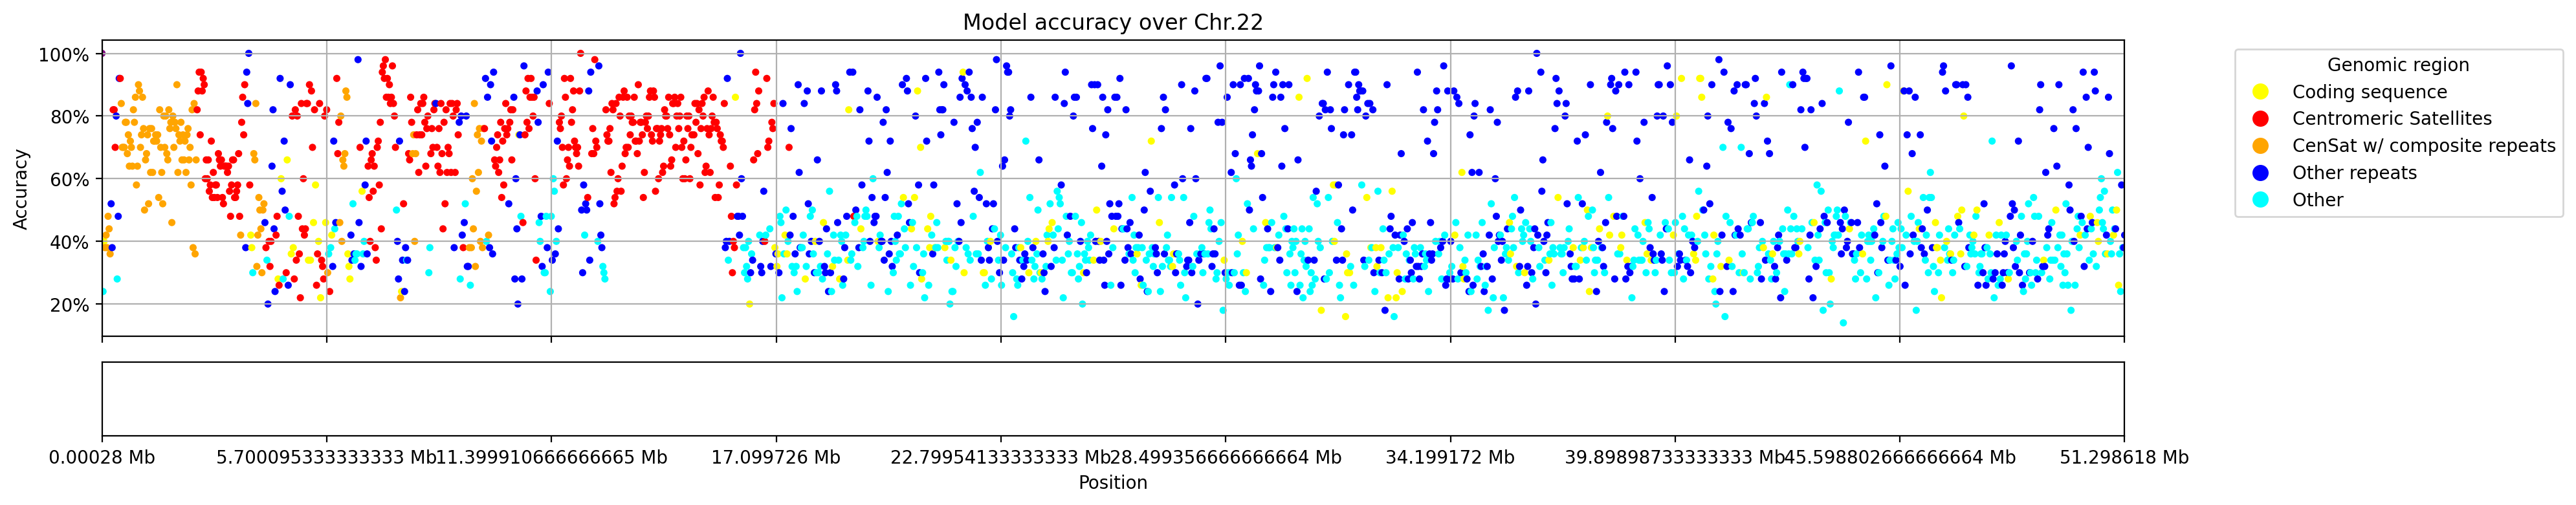

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from tqdm import tqdm

def get_color(row):
    if row['telomere']: 
        return 'purple'
    elif row['gene']:
        return 'yellow'
    elif row['comp_repeats'] and row['cen_sat']:
        return 'orange'
    elif row['comp_repeats']:
        return 'green'
    elif row['cen_sat']:
        return 'red'
    elif row['repeats']:
        return 'blue'
    else:
        return 'cyan'

# Apply the color function to each row
position_annotation['color'] = position_annotation.apply(get_color, axis=1)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 4), sharex=True, gridspec_kw={'height_ratios': [4, 1]})

# Plot the accuracy data on the first subplot
scatter = ax1.scatter(position_annotation['position'], position_annotation['accuracy'], c=position_annotation['color'], marker='.')
ax1.set_title('Model accuracy over Chr.22')
ax1.set_ylabel('Accuracy')

# Set the number of ticks to 10 and label them in Mb
num_ticks = 10
positions = position_annotation['position']
ax1.set_xticks(np.linspace(min(positions), max(positions), num_ticks))
ax1.set_xticklabels([f'{float(pos / 1e6)} Mb' for pos in np.linspace(min(positions), max(positions), num_ticks)])

# Format the y-axis to show accuracy in percentage
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y*100:.0f}%'))

# Display the grid on the first subplot
ax1.grid(True)

"""
# Adding horizontal bars to the second subplot for cen_sats
for idx, row in tqdm(censats_chr22.iterrows(), total=censats_chr22.shape[0], desc="Processing censats_chr22", leave=False):    
    ax2.add_patch(Rectangle((row['start'], 0.1), row['end'] - row['start'], 1, color='red', alpha=0.5))

# Adding horizontal bars to the second subplot for comp_repeats
for idx, row in tqdm(comp_repeats_chr22.iterrows(), total=comp_repeats_chr22.shape[0], desc="Processing comp_repeats_chr22", leave=False):    
    ax2.add_patch(Rectangle((row['start'], 0.2), row['end'] - row['start'], 1, color='yellow', alpha=0.5))
"""
ax2.set_yticks([])  # Hide y-axis ticks for the second subplot
ax2.set_xlabel('Position')
ax2.set_xlim(min(positions), max(positions))

# Set x-ticks for the second subplot to match the first subplot
ax2.set_xticks(np.linspace(min(positions), max(positions), num_ticks))
ax2.set_xticklabels([f'{float(pos / 1e6)} Mb' for pos in np.linspace(min(positions), max(positions), num_ticks)])

# Create a legend for the scatter plot
legend_labels = {
    'yellow': 'Coding sequence',
    'red': 'Centromeric Satellites',
    'orange': 'CenSat w/ composite repeats',
    'blue': 'Other repeats',
    'cyan': 'Other '
}

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label) 
           for color, label in legend_labels.items()]
ax1.legend(handles=handles, title='Genomic region', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()


#### general Chr22 - only repeats

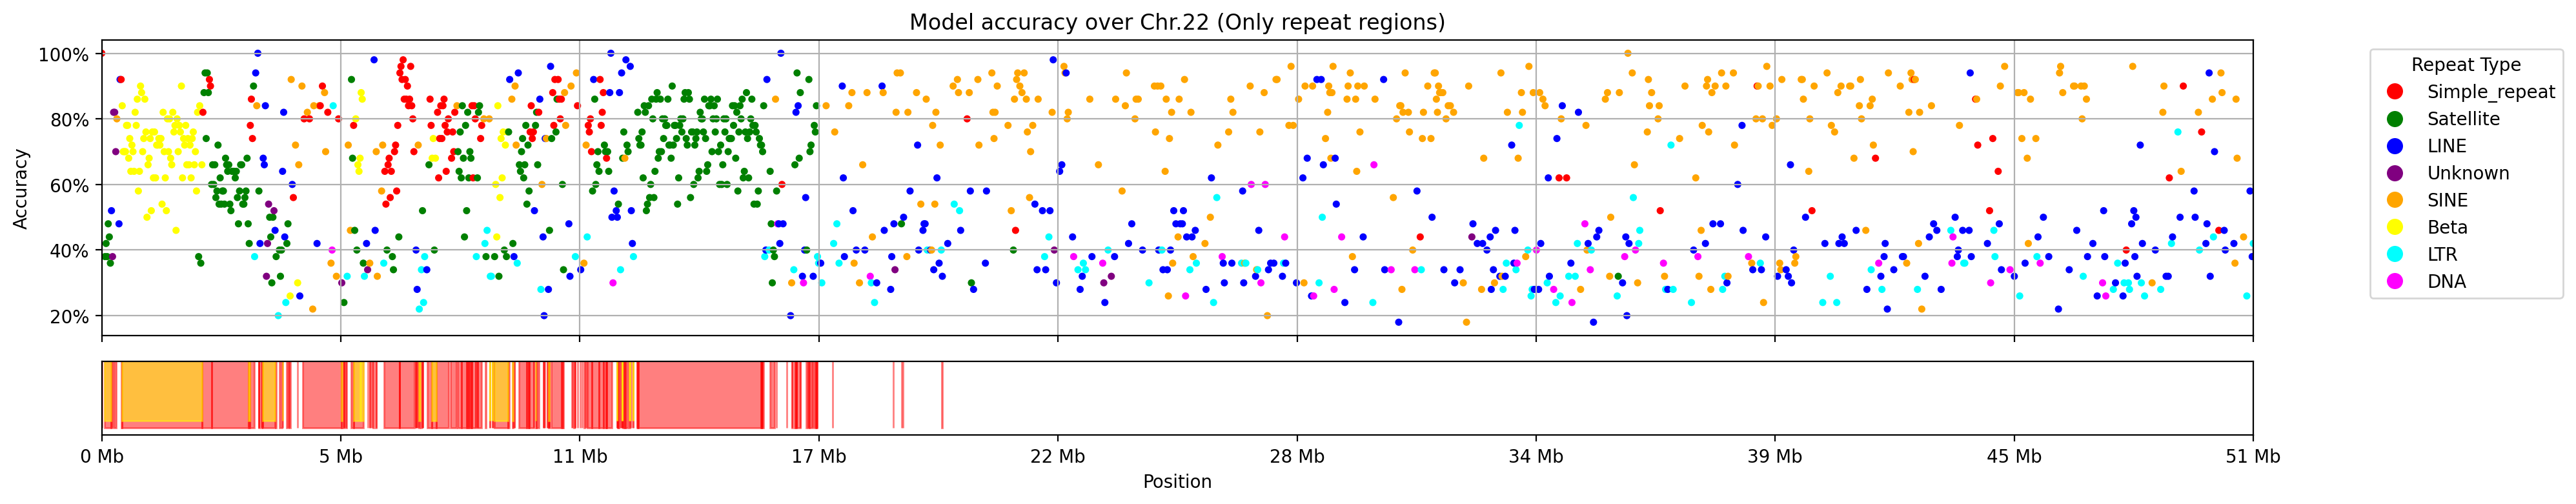

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Assume position_annotation, censats_chr22, comp_repeats_chr22 are already defined

# Filter the data
position_annotation_repeats = position_annotation[position_annotation['repeats']]
position_annotation_repeats = position_annotation_repeats.groupby('repeat_repeat_type').filter(lambda x: len(x) >= 10)

# Create a list of specific colors
specific_colors = ['red', 'green', 'blue', 'purple', 'orange', 'yellow', 'cyan', 'magenta']

# Create a color map for the unique values in the specified column
unique_values = position_annotation_repeats['repeat_repeat_type'].unique()
color_map = {value: color for value, color in zip(unique_values, specific_colors)}

# Apply the color map to each row
position_annotation_repeats['color'] = position_annotation_repeats['repeat_repeat_type'].map(color_map)

# Get the colors for the scatter plot
colors = position_annotation_repeats['color'].tolist()

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 4), sharex=True, gridspec_kw={'height_ratios': [4, 1]})

# Plot the accuracy data on the first subplot
scatter = ax1.scatter(position_annotation_repeats['position'], position_annotation_repeats['accuracy'], c=colors, marker='.')
ax1.set_title('Model accuracy over Chr.22 (Only repeat regions)')
ax1.set_ylabel('Accuracy')

# Set the number of ticks to 10 and label them in Mb
num_ticks = 10
positions = position_annotation_repeats['position']
ax1.set_xticks(np.linspace(min(positions), max(positions), num_ticks))
ax1.set_xticklabels([f'{int(pos / 1e6)} Mb' for pos in np.linspace(min(positions), max(positions), num_ticks)])

# Format the y-axis to show accuracy in percentage
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y*100:.0f}%'))

# Display the grid on the first subplot
ax1.grid(True)

# Adding horizontal bars to the second subplot for cen_sats
for idx, row in censats_chr22.iterrows():
    ax2.add_patch(Rectangle((row['start'], 0.1), row['end'] - row['start'], 1, color='red', alpha=0.5))

# Adding horizontal bars to the second subplot for comp_repeats
for idx, row in comp_repeats_chr22.iterrows():
    ax2.add_patch(Rectangle((row['start'], 0.2), row['end'] - row['start'], 1, color='yellow', alpha=0.5))

ax2.set_yticks([])  # Hide y-axis ticks for the second subplot
ax2.set_xlabel('Position')
ax2.set_xlim(min(positions), max(positions))

# Set x-ticks for the second subplot to match the first subplot
ax2.set_xticks(np.linspace(min(positions), max(positions), num_ticks))
ax2.set_xticklabels([f'{int(pos / 1e6)} Mb' for pos in np.linspace(min(positions), max(positions), num_ticks)])

# Create a legend for the scatter plot
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[value], markersize=10, label=value) for value in unique_values]
ax1.legend(handles=handles, title='Repeat Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()


#### Telomere zoom in

280.0
9832.0


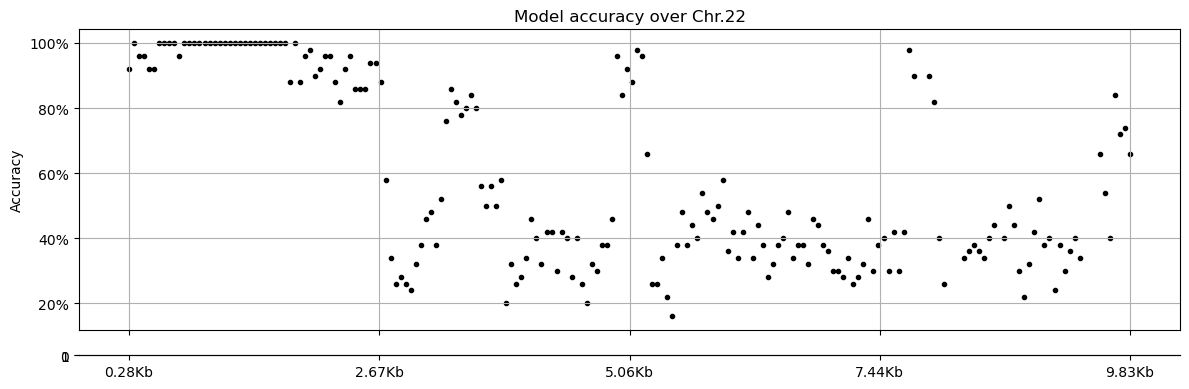

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from tqdm import tqdm

def get_color(row):
    if row['telomere']: 
        return 'purple'
    elif row['gene']:
        return 'yellow'
    elif row['comp_repeats'] and row['cen_sat']:
        return 'orange'
    elif row['comp_repeats']:
        return 'green'
    elif row['cen_sat']:
        return 'red'
    elif row['repeats']:
        return 'blue'
    else:
        return 'cyan'

# Apply the color function to each row
annotated__tel_p['color'] = annotated__tel_p.apply(get_color, axis=1)

# Create a figure with two subplots
#fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 4), sharex=True, gridspec_kw={'height_ratios': [4, 1]})
fig, (ax1,ax2) = plt.subplots(2, 1, figsize=(12, 4), sharex=True, gridspec_kw={'height_ratios': [4, 0]})

# Plot the accuracy data on the first subplot
#scatter = ax1.scatter(annotated__tel_p['position'], annotated__tel_p['accuracy'], c=annotated__tel_p['color'], marker='.')
scatter = ax1.scatter(annotated__tel_p['position'], annotated__tel_p['accuracy'], c='black', marker='.')
ax1.set_title('Model accuracy over Chr.22')
ax1.set_ylabel('Accuracy')

# Set the number of ticks to 10 and label them in Mb
num_ticks = 5
print(min(positions))
print(max(positions))
positions = annotated__tel_p['position']
ax1.set_xticks(np.linspace(min(positions), max(positions), num_ticks))
ax1.set_xticklabels([f'{(float(pos)/1e3):.2f}Kb' for pos in np.linspace(min(positions), max(positions), num_ticks)])

# Format the y-axis to show accuracy in percentage
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y*100:.0f}%'))

# Display the grid on the first subplot
ax1.grid(True)
"""
# Adding horizontal bars to the second subplot for cen_sats
for idx, row in tqdm(chr22_tel.iterrows(), total=chr22_tel.shape[0], desc="Processing tel", leave=False):    
    ax2.add_patch(Rectangle((row['start'], 0.1), row['end'] - row['start'], 1, color='red', alpha=0.5))

ax2.set_yticks([])  # Hide y-axis ticks for the second subplot
ax2.set_xlabel('Position')
ax2.set_xlim(min(positions), max(positions))

# Set x-ticks for the second subplot to match the first subplot
ax2.set_xticks(np.linspace(min(positions), max(positions), num_ticks))
ax2.set_xticklabels([f'{int(pos)/1e3}Kb' for pos in np.linspace(min(positions), max(positions), num_ticks)])

# Create a legend for the scatter plot
legend_labels = {
    'purple': 'Telomeres',
    'yellow': 'Genes',
    'red': 'Centromeric Satellites',
    'orange': '--w/ composite repeats',
    'blue': 'Other repeats',
    'cyan': 'Other'
}

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label) 
           for color, label in legend_labels.items()]
ax1.legend(handles=handles, title='Annotation Type', bbox_to_anchor=(1.05, 1), loc='upper left')
"""
# Display the plot
plt.tight_layout()
plt.show()


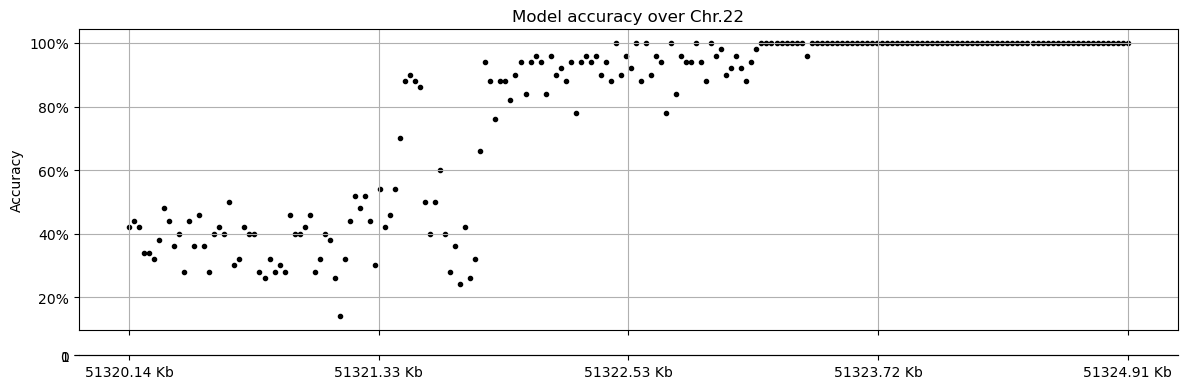

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from tqdm import tqdm

def get_color(row):
    if row['telomere']: 
        return 'purple'
    elif row['gene']:
        return 'yellow'
    elif row['comp_repeats'] and row['cen_sat']:
        return 'orange'
    elif row['comp_repeats']:
        return 'green'
    elif row['cen_sat']:
        return 'red'
    elif row['repeats']:
        return 'blue'
    else:
        return 'cyan'

# Apply the color function to each row
annotated__tel_q['color'] = annotated__tel_q.apply(get_color, axis=1)

# Create a figure with two subplots
#fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 4), sharex=True, gridspec_kw={'height_ratios': [4, 1]})
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 4), sharex=True, gridspec_kw={'height_ratios': [4, 0]})

# Plot the accuracy data on the first subplot
#scatter = ax1.scatter(annotated__tel_q['position'], annotated__tel_q['accuracy'], c=annotated__tel_q['color'], marker='.')
scatter = ax1.scatter(annotated__tel_q['position'], annotated__tel_q['accuracy'], c='black', marker='.')
ax1.set_title('Model accuracy over Chr.22')
ax1.set_ylabel('Accuracy')

# Set the number of ticks to 10 and label them in Mb
num_ticks = 5
positions = annotated__tel_q['position']
ax1.set_xticks(np.linspace(min(positions), max(positions), num_ticks))
ax1.set_xticklabels([f'{(float(pos / 1e3)):.2f} Kb' for pos in np.linspace(min(positions), max(positions), num_ticks)])

# Format the y-axis to show accuracy in percentage
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y*100:.0f}%'))

# Display the grid on the first subplot
ax1.grid(True)
"""
# Adding horizontal bars to the second subplot for cen_sats
for idx, row in tqdm(censats_chr22.iterrows(), total=censats_chr22.shape[0], desc="Processing censats_chr22", leave=False):    
    ax2.add_patch(Rectangle((row['start'], 0.1), row['end'] - row['start'], 1, color='red', alpha=0.5))

# Adding horizontal bars to the second subplot for comp_repeats
for idx, row in tqdm(comp_repeats_chr22.iterrows(), total=comp_repeats_chr22.shape[0], desc="Processing comp_repeats_chr22", leave=False):    
    ax2.add_patch(Rectangle((row['start'], 0.2), row['end'] - row['start'], 1, color='yellow', alpha=0.5))

ax2.set_yticks([])  # Hide y-axis ticks for the second subplot
ax2.set_xlabel('Position')
ax2.set_xlim(min(positions), max(positions))

# Set x-ticks for the second subplot to match the first subplot
ax2.set_xticks(np.linspace(min(positions), max(positions), num_ticks))
ax2.set_xticklabels([f'{(float(pos / 1e3)):.2f} Kb' for pos in np.linspace(min(positions), max(positions), num_ticks)])

# Create a legend for the scatter plot
legend_labels = {
    'yellow': 'Genes',
    'red': 'Centromeric Satellites',
    'orange': '--w/ composite repeats',
    'blue': 'Other repeats',
    'cyan': 'Other'
}

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label) 
           for color, label in legend_labels.items()]
ax1.legend(handles=handles, title='Annotation Type', bbox_to_anchor=(1.05, 1), loc='upper left')
"""
# Display the plot
plt.tight_layout()
plt.show()


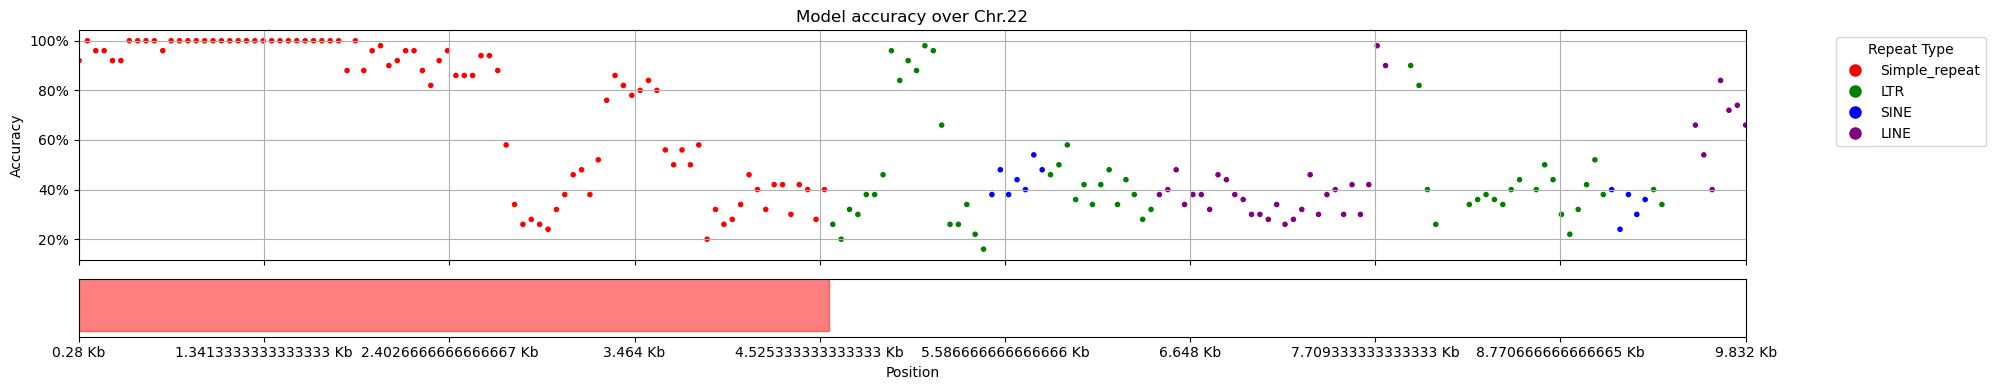

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Assume position_annotation, censats_chr22, comp_repeats_chr22 are already defined

# Filter the data
annotated__tel_p = annotated__tel_p[annotated__tel_p['repeats']]
annotated__tel_p = annotated__tel_p.groupby('repeat_repeat_type').filter(lambda x: len(x) >= 10)

# Create a list of specific colors
specific_colors = ['red', 'green', 'blue', 'purple', 'orange', 'yellow', 'cyan', 'magenta']

# Create a color map for the unique values in the specified column
unique_values = annotated__tel_p['repeat_repeat_type'].unique()
color_map = {value: color for value, color in zip(unique_values, specific_colors)}

# Apply the color map to each row
annotated__tel_p['color'] = annotated__tel_p['repeat_repeat_type'].map(color_map)

# Get the colors for the scatter plot
colors = annotated__tel_p['color'].tolist()

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 4), sharex=True, gridspec_kw={'height_ratios': [4, 1]})

# Plot the accuracy data on the first subplot
scatter = ax1.scatter(annotated__tel_p['position'], annotated__tel_p['accuracy'], c=colors, marker='.')
ax1.set_title('Model accuracy over Chr.22')
ax1.set_ylabel('Accuracy')

# Set the number of ticks to 10 and label them in Mb
num_ticks = 10
positions = annotated__tel_p['position']
ax1.set_xticks(np.linspace(min(positions), max(positions), num_ticks))
ax1.set_xticklabels([f'{float(pos / 1e3)} Kb' for pos in np.linspace(min(positions), max(positions), num_ticks)])

# Format the y-axis to show accuracy in percentage
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y*100:.0f}%'))

# Display the grid on the first subplot
ax1.grid(True)

# Adding horizontal bars to the second subplot for cen_sats
for idx, row in censats_chr22.iterrows():
    ax2.add_patch(Rectangle((row['start'], 0.1), row['end'] - row['start'], 1, color='red', alpha=0.5))

# Adding horizontal bars to the second subplot for comp_repeats
for idx, row in comp_repeats_chr22.iterrows():
    ax2.add_patch(Rectangle((row['start'], 0.2), row['end'] - row['start'], 1, color='yellow', alpha=0.5))

ax2.set_yticks([])  # Hide y-axis ticks for the second subplot
ax2.set_xlabel('Position')
ax2.set_xlim(min(positions), max(positions))

# Set x-ticks for the second subplot to match the first subplot
ax2.set_xticks(np.linspace(min(positions), max(positions), num_ticks))
ax2.set_xticklabels([f'{float(pos / 1e3)} Kb' for pos in np.linspace(min(positions), max(positions), num_ticks)])

# Create a legend for the scatter plot
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[value], markersize=10, label=value) for value in unique_values]
ax1.legend(handles=handles, title='Repeat Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()


In [136]:
RepeatMasker_chr22.head(10)

start   end     repeat strand    repeat_type  length
1380      1  4578  (AACCCT)n      +  Simple_repeat    4577
1381   4578  4650     LTR60B      -            LTR      72
1382   4652  4809     LTR60B      -            LTR     157
1383   4815  5327  MER31-int      +            LTR     512
1384   5294  5511  MER31-int      +            LTR     217
1385   5511  5816     AluYk3      +           SINE     305
1386   5816  6455  MER31-int      +            LTR     639
1387   6455  7811      L1PA4      +           LINE    1356
1388   7907  8082  MER31-int      +            LTR     175
1389   8154  8185      (TG)n      +  Simple_repeat      31

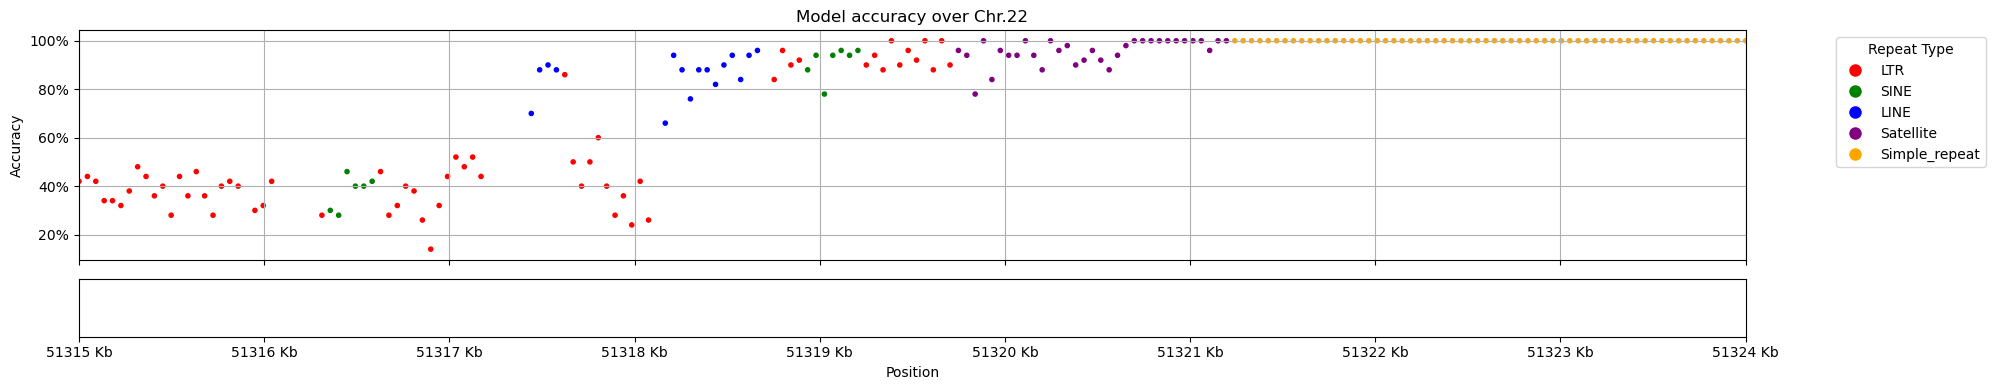

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Assume position_annotation, censats_chr22, comp_repeats_chr22 are already defined

# Filter the data
annotated__tel_q = annotated__tel_q[annotated__tel_q['repeats']]
annotated__tel_q = annotated__tel_q.groupby('repeat_repeat_type').filter(lambda x: len(x) >= 10)

# Create a list of specific colors
specific_colors = ['red', 'green', 'blue', 'purple', 'orange', 'yellow', 'cyan', 'magenta']

# Create a color map for the unique values in the specified column
unique_values = annotated__tel_q['repeat_repeat_type'].unique()
color_map = {value: color for value, color in zip(unique_values, specific_colors)}

# Apply the color map to each row
annotated__tel_q['color'] = annotated__tel_q['repeat_repeat_type'].map(color_map)

# Get the colors for the scatter plot
colors = annotated__tel_q['color'].tolist()

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 4), sharex=True, gridspec_kw={'height_ratios': [4, 1]})

# Plot the accuracy data on the first subplot
scatter = ax1.scatter(annotated__tel_q['position'], annotated__tel_q['accuracy'], c=colors, marker='.')
ax1.set_title('Model accuracy over Chr.22')
ax1.set_ylabel('Accuracy')

# Set the number of ticks to 10 and label them in Mb
num_ticks = 10
positions = annotated__tel_q['position']
ax1.set_xticks(np.linspace(min(positions), max(positions), num_ticks))
ax1.set_xticklabels([f'{int(pos / 1e3)} Kb' for pos in np.linspace(min(positions), max(positions), num_ticks)])

# Format the y-axis to show accuracy in percentage
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y*100:.0f}%'))

# Display the grid on the first subplot
ax1.grid(True)

# Adding horizontal bars to the second subplot for cen_sats
for idx, row in censats_chr22.iterrows():
    ax2.add_patch(Rectangle((row['start'], 0.1), row['end'] - row['start'], 1, color='red', alpha=0.5))

# Adding horizontal bars to the second subplot for comp_repeats
for idx, row in comp_repeats_chr22.iterrows():
    ax2.add_patch(Rectangle((row['start'], 0.2), row['end'] - row['start'], 1, color='yellow', alpha=0.5))

ax2.set_yticks([])  # Hide y-axis ticks for the second subplot
ax2.set_xlabel('Position')
ax2.set_xlim(min(positions), max(positions))

# Set x-ticks for the second subplot to match the first subplot
ax2.set_xticks(np.linspace(min(positions), max(positions), num_ticks))
ax2.set_xticklabels([f'{int(pos / 1e3)} Kb' for pos in np.linspace(min(positions), max(positions), num_ticks)])

# Create a legend for the scatter plot
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[value], markersize=10, label=value) for value in unique_values]
ax1.legend(handles=handles, title='Repeat Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()


### violin plots

KeyError: 'telomere'

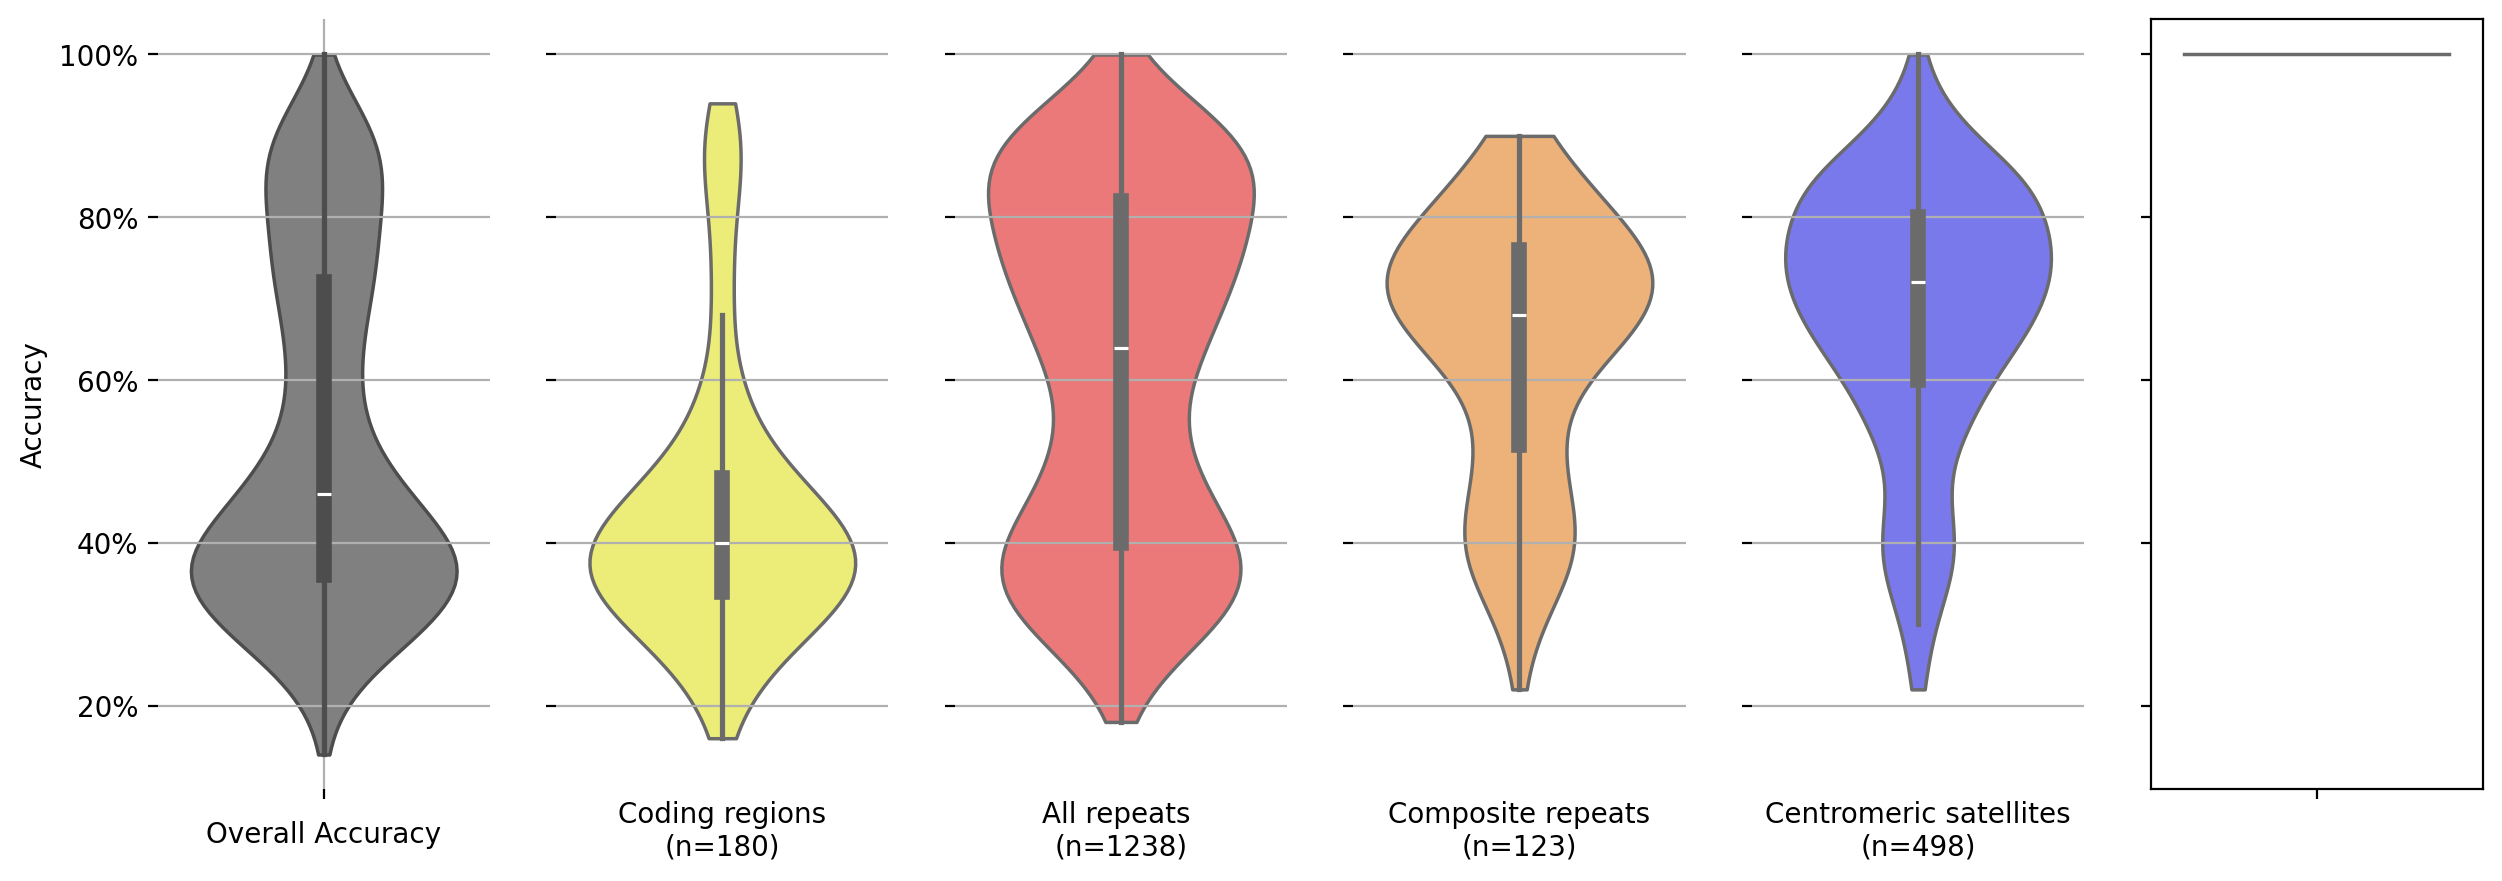

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming accuracy_by_position is already defined
# Automatically define the boolean columns
boolean_columns = accuracy_by_position.select_dtypes(include='bool').columns.tolist()

# Calculate medians for sorting
medians = {col: accuracy_by_position[accuracy_by_position[col]]['accuracy'].median() for col in boolean_columns}
sorted_columns = sorted(boolean_columns, key=lambda x: medians[x])

# Determine the number of subplots needed
num_plots = len(sorted_columns) + 1  # including the overall accuracy plot

# Define the color palette based on the provided color scheme
palette = {
    'Overall Accuracy': 'grey',
    sorted_columns[0]: '#FFFF66',  # Yellow for Coding sequence
    sorted_columns[1]: '#FF6666',  # Red for Centromeric Satellites
    sorted_columns[2]: '#FFB266',  # Orange for CenSat w/ composite repeats
    sorted_columns[3]: '#6666FF',  # Blue for Other repeats
    sorted_columns[4]: '#66FFFF'   # Cyan for Other
}

# Define the labels to match the new desired labels
labels = {
    sorted_columns[0]: 'Coding regions',
    sorted_columns[1]: 'All repeats ',
    sorted_columns[2]: 'Composite repeats',
    sorted_columns[3]: 'Centromeric satellites',
}

# Create a figure for the violin plots
fig, axes = plt.subplots(1, num_plots, figsize=(15, 5), sharey=True)

# Plot overall accuracy
sns.violinplot(y='accuracy', data=accuracy_by_position, ax=axes[0], cut=0, color=palette['Overall Accuracy'])
axes[0].set_xlabel('Overall Accuracy', fontsize=10)
axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y * 100:.0f}%'))
for spine in axes[0].spines.values():
    spine.set_visible(False)
axes[0].set_ylabel('Accuracy')

axes[0].grid(True)

# Plot accuracy for positions in each boolean column intervals
for i, col in enumerate(sorted_columns, start=1):
    subset = accuracy_by_position[accuracy_by_position[col]]
    sns.violinplot(y='accuracy', data=subset, ax=axes[i], cut=0, color=palette[col])
    num_points = len(subset)
    axes[i].set_xlabel(f'{labels[col]}\n(n={num_points})', fontsize=10)
    axes[i].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y * 100:.0f}%'))
    for spine in axes[i].spines.values():
        spine.set_visible(False)
    axes[i].set_xticks([])  # Remove x-ticks
    axes[i].set_xticklabels([])  # Remove x-tick labels
    axes[i].grid(True)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plots
plt.show()


In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_violin_for_column(df, column):
    # Filter out categories with fewer than 10 data points
    filtered_df = df.groupby(column).filter(lambda x: len(x) >= 10)
    if filtered_df.empty:
        print("No categories with 10 or more data points.")
        return
    
    # Get unique values in the column, excluding NA values
    unique_values = filtered_df[column].dropna().unique()
    
    # Calculate medians for sorting
    medians = {value: filtered_df[filtered_df[column] == value]['accuracy'].median() for value in unique_values}
    sorted_values = sorted(unique_values, key=lambda x: medians[x])
    
    # Calculate the number of plots needed
    num_plots = len(sorted_values)
    
    # Create a figure for the violin plots
    fig, axes = plt.subplots(1, num_plots, figsize=(15, 5), sharey=True)
    axes[0].set_ylabel('Accuracy')
    
    # Plot violin plots for each unique value
    for i, value in enumerate(sorted_values):
        data_subset = filtered_df[filtered_df[column] == value]
        sns.violinplot(y='accuracy', data=data_subset, ax=axes[i], cut=0)
        num_points = len(data_subset)
        axes[i].set_xlabel(f'{value}\n(n={num_points})', fontsize=10)
        axes[i].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y*100:.0f}%'))
        for spine in axes[i].spines.values():
            spine.set_visible(False)
        axes[i].grid(True)
    
    # Adjust layout for better spacing
    plt.tight_layout()
    
    # Display the plots
    plt.show()


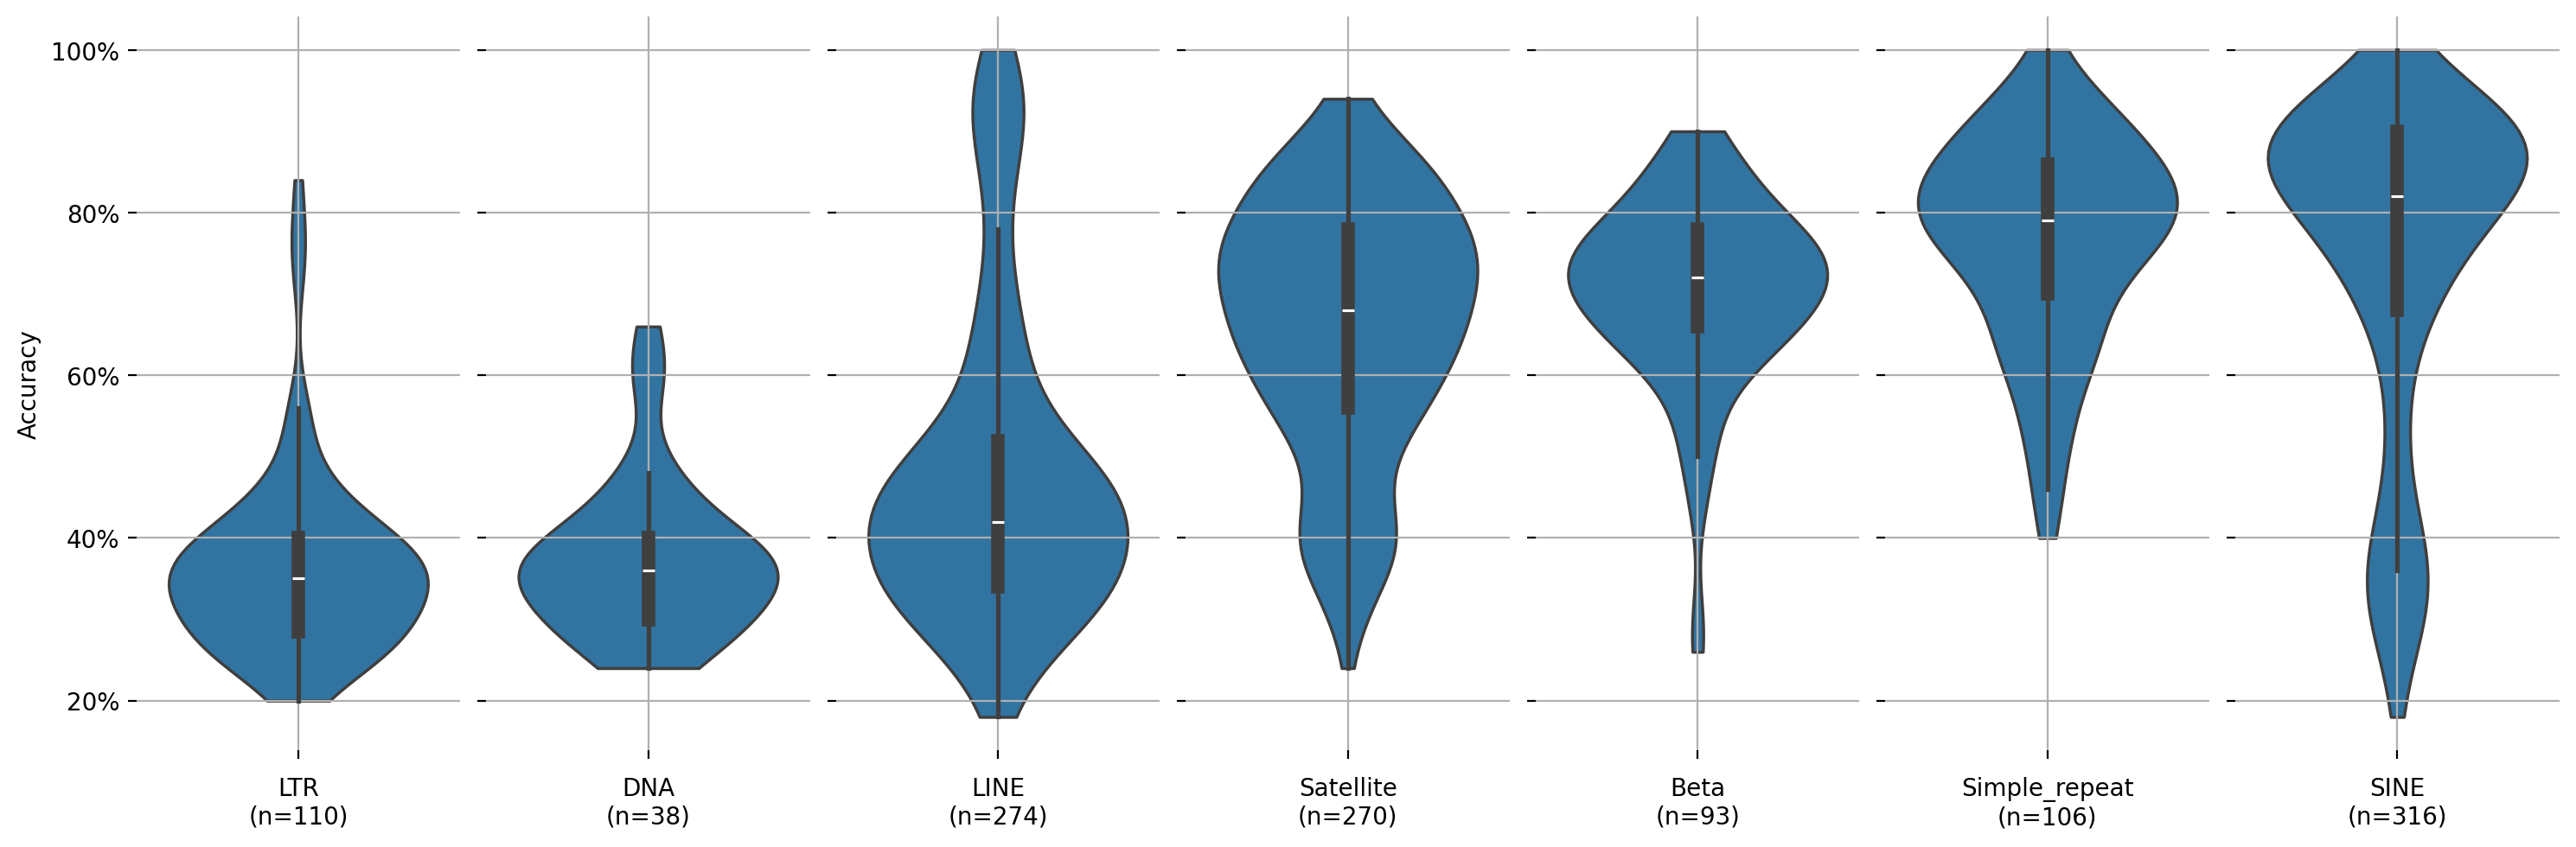

'\nHighest accuracy for SINE which have length 200-300 nucleotides!!! (check if also core length tho)\nPerfect match for models block_size\n'

In [47]:
accuracy_by_position_edited=accuracy_by_position[accuracy_by_position['repeat_repeat_type']!='Unknown']
plot_violin_for_column(accuracy_by_position_edited, 'repeat_repeat_type')
#repeat_strand shows no real difference, '_'  bit better tho

'''
Highest accuracy for SINE which have length 200-300 nucleotides!!! (check if also core length tho)
Perfect match for models block_size
'''


In [48]:
# Print summary statistics of the accuracy column
print(accuracy_by_position[accuracy_by_position['gene_type']=='gene']['accuracy'].describe())

# Check for any unexpected values
print("Unique values in accuracy column:", accuracy_by_position[accuracy_by_position['gene_type']=='gene']['accuracy'].unique())


count    41.000000
mean      0.469756
std       0.204603
min       0.220000
25%       0.340000
50%       0.380000
75%       0.480000
max       0.920000
Name: accuracy, dtype: float64
Unique values in accuracy column: [0.4  0.38 0.6  0.36 0.34 0.22 0.42 0.32 0.28 0.56 0.74 0.86 0.88 0.48
 0.46 0.3  0.72 0.92]


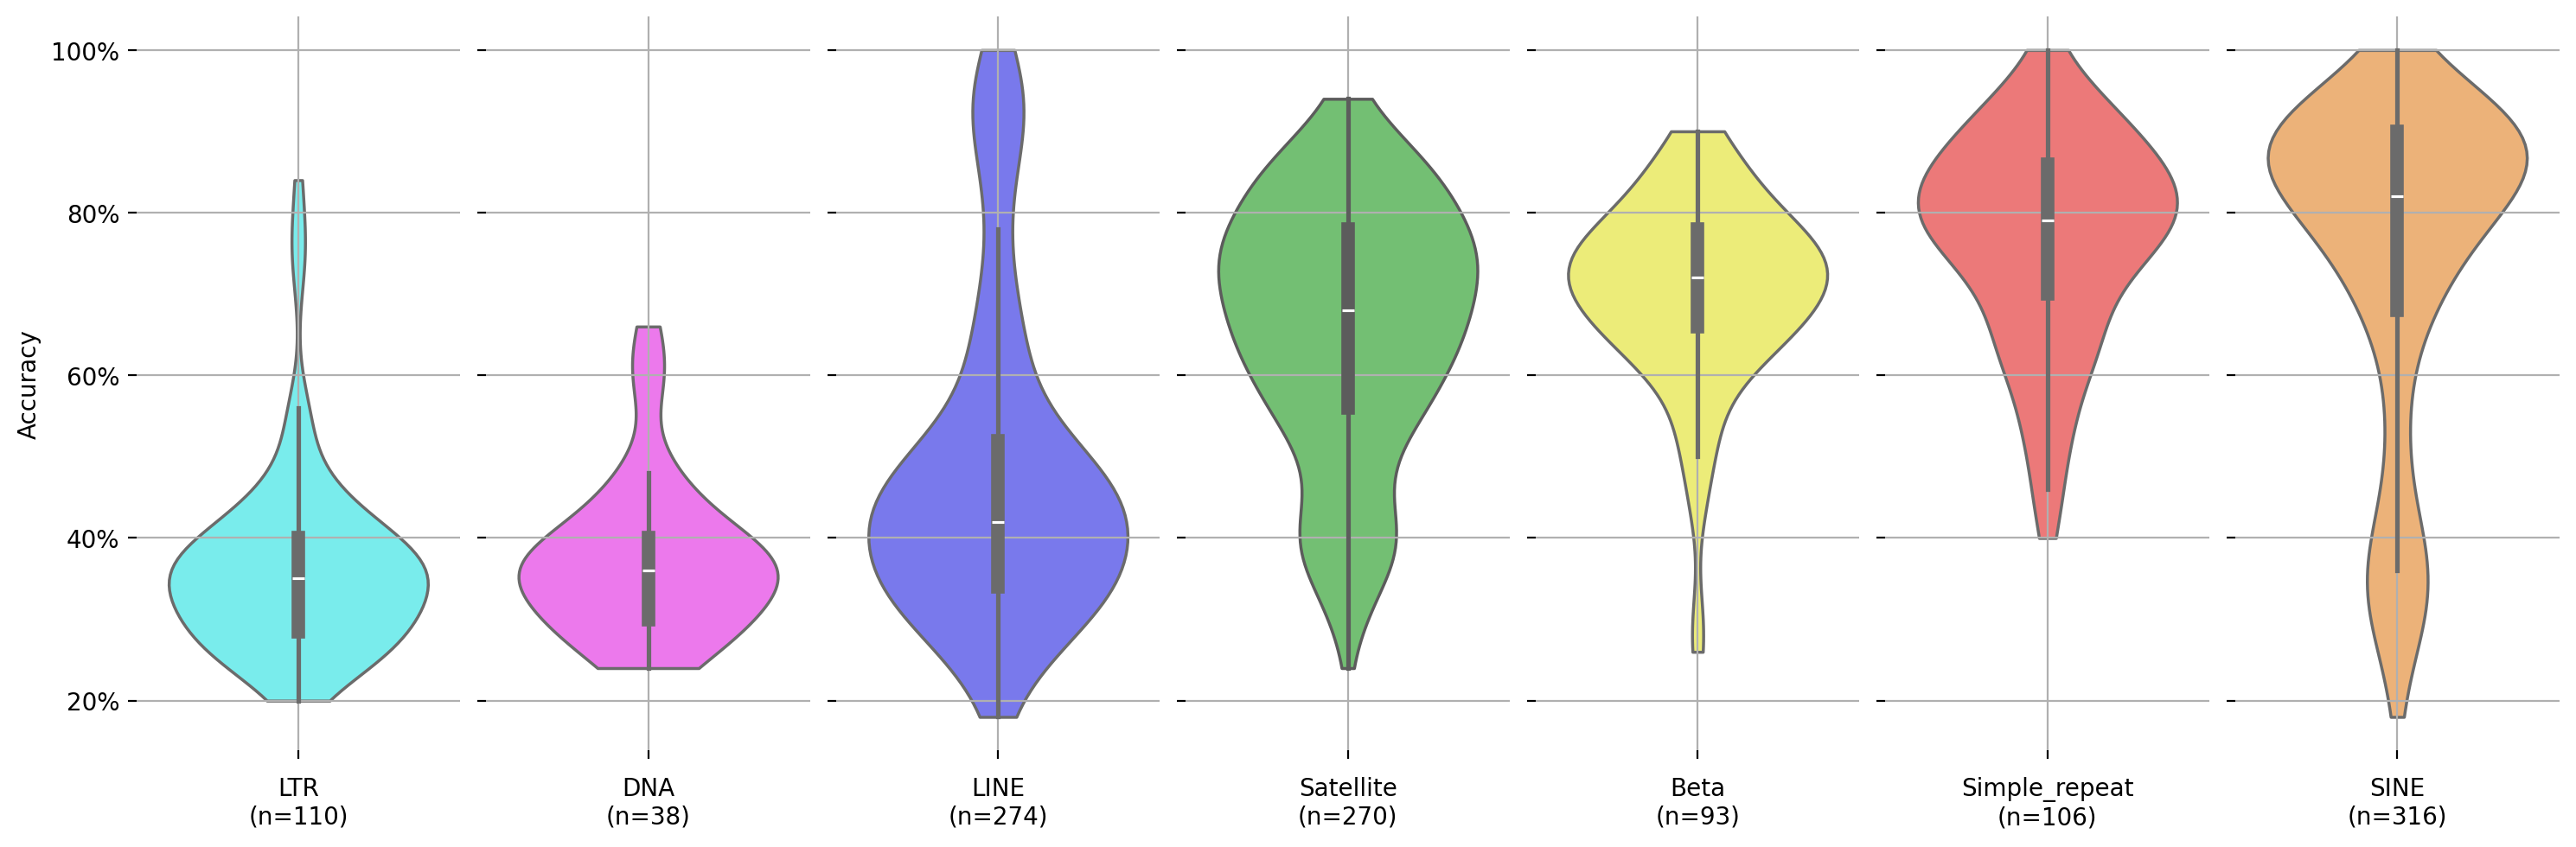

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_violin_for_column(df, column):
    # Filter out categories with fewer than 10 data points
    filtered_df = df.groupby(column).filter(lambda x: len(x) >= 10)
    if filtered_df.empty:
        print("No categories with 10 or more data points.")
        return
    
    # Get unique values in the column, excluding NA values
    unique_values = filtered_df[column].dropna().unique()
    
    # Calculate medians for sorting
    medians = {value: filtered_df[filtered_df[column] == value]['accuracy'].median() for value in unique_values}
    sorted_values = sorted(unique_values, key=lambda x: medians[x])
    
    # Define color palette based on your provided legend
    color_palette = {
        'Simple_repeat': '#FF6666',  # Red
        'Satellite': '#66CC66',      # Green
        'LINE': '#6666FF',           # Blue
        'SINE': '#FFB266',           # Orange
        'LTR': '#66FFFF',            # Cyan
        'DNA': '#FF66FF',            # Pink
        'Beta': '#FFFF66'            # Yellow
    }
    
    # Calculate the number of plots needed
    num_plots = len(sorted_values)
    
    # Create a figure for the violin plots
    fig, axes = plt.subplots(1, num_plots, figsize=(15, 5), sharey=True)
    axes[0].set_ylabel('Accuracy')
    
    # Plot violin plots for each unique value
    for i, value in enumerate(sorted_values):
        data_subset = filtered_df[filtered_df[column] == value]
        sns.violinplot(y='accuracy', data=data_subset, ax=axes[i], cut=0, color=color_palette.get(value, 'grey'))
        num_points = len(data_subset)
        axes[i].set_xlabel(f'{value}\n(n={num_points})', fontsize=10)
        axes[i].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y*100:.0f}%'))
        for spine in axes[i].spines.values():
            spine.set_visible(False)
        axes[i].grid(True)
    
    # Adjust layout for better spacing
    plt.tight_layout()
    
    # Display the plots
    plt.show()

# Filter out "Unknown" and plot
accuracy_by_position_edited = accuracy_by_position[accuracy_by_position['repeat_repeat_type'] != 'Unknown']
plot_violin_for_column(accuracy_by_position_edited, 'repeat_repeat_type')


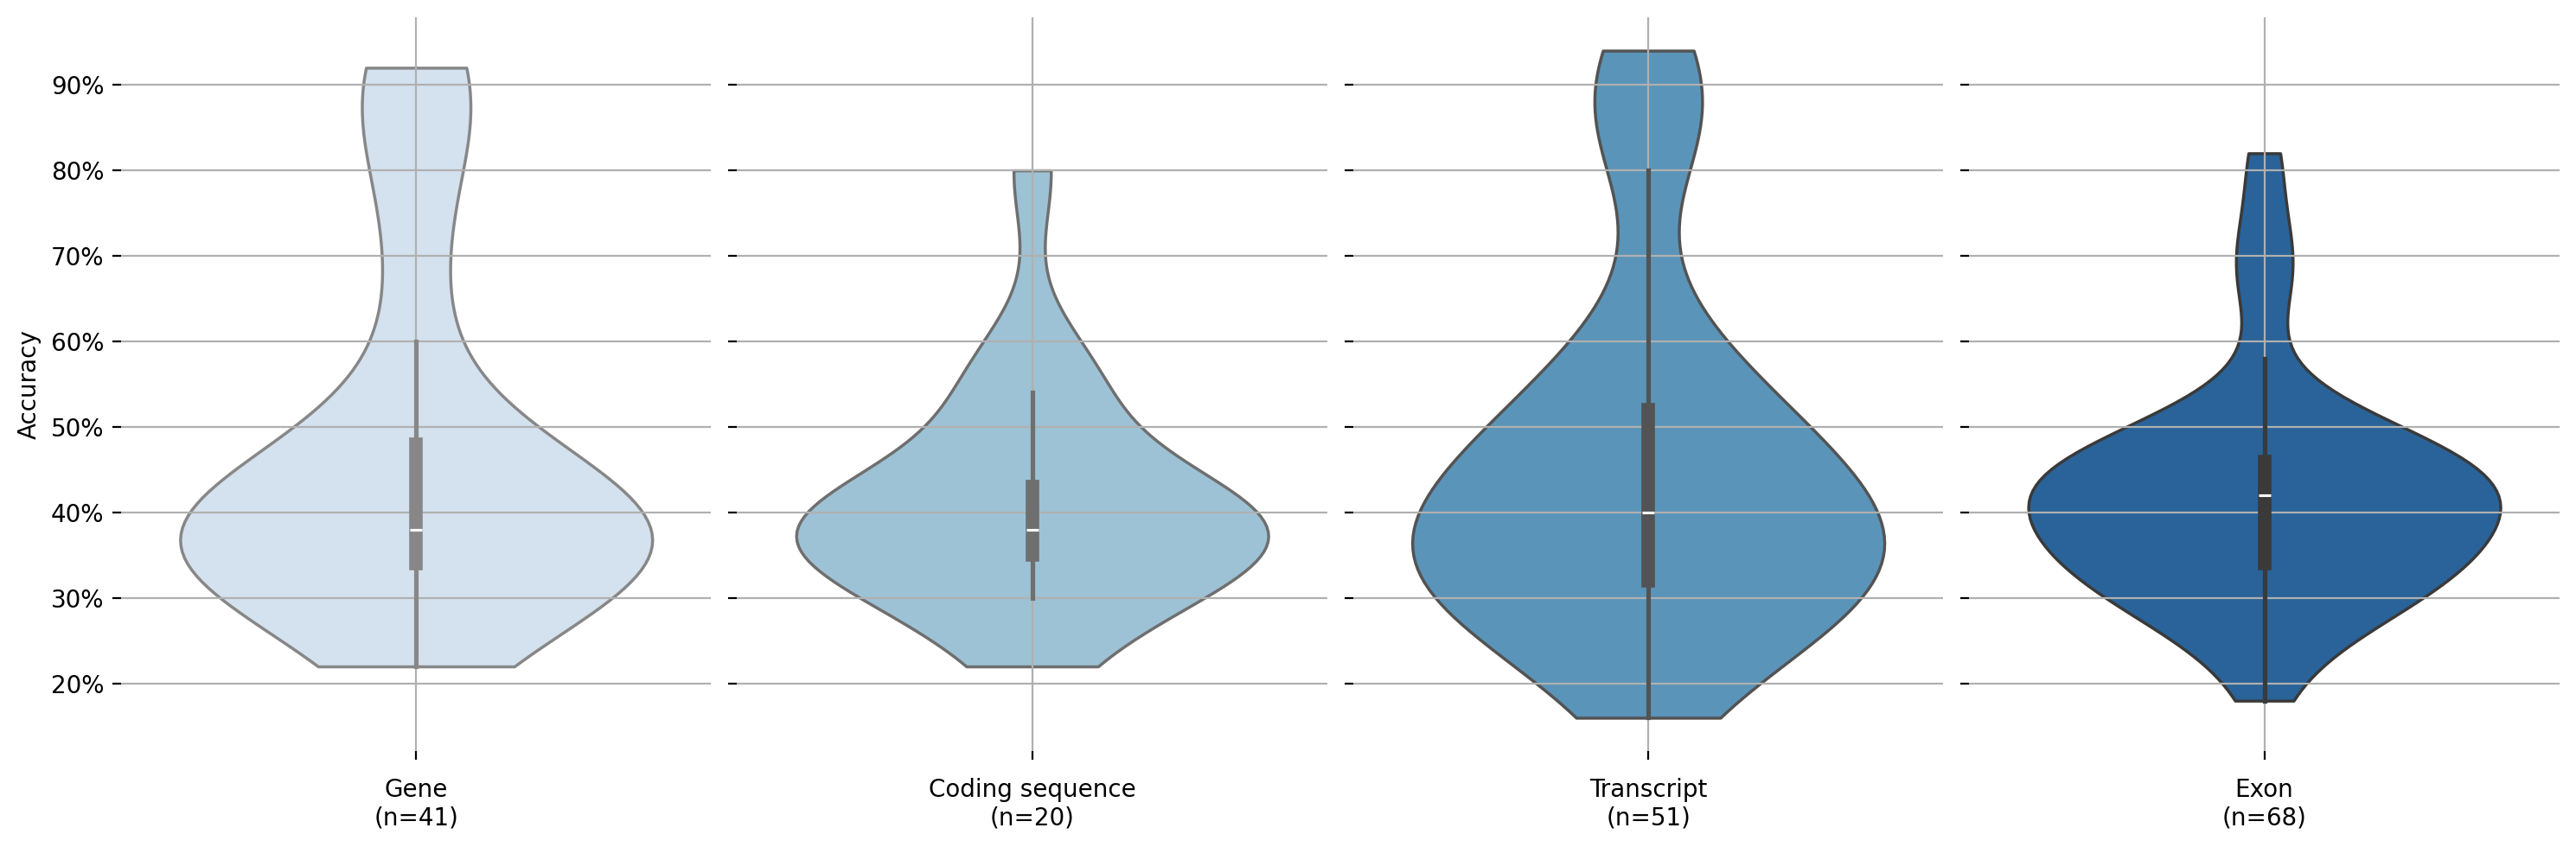

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_violin_for_column(df, column):
    # Define a mapping from original gene_type values to new names
    name_mapping = {
        'exon': 'Exon',
        'CDS': 'Coding sequence',
        'gene': 'Gene',
        'transcript': 'Transcript'
    }
    
    # Apply the mapping to the column
    df[column] = df[column].map(name_mapping)
    
    # Filter out categories with fewer than 10 data points
    filtered_df = df.groupby(column).filter(lambda x: len(x) >= 10)
    if filtered_df.empty:
        print("No categories with 10 or more data points.")
        return
    
    # Get unique values in the column, excluding NA values
    unique_values = filtered_df[column].dropna().unique()
    
    # Calculate medians for sorting
    medians = {value: filtered_df[filtered_df[column] == value]['accuracy'].median() for value in unique_values}
    sorted_values = sorted(unique_values, key=lambda x: medians[x])
    
    # Calculate the number of plots needed
    num_plots = len(sorted_values)
    
    # Generate shades of blue
    blue_palette = sns.color_palette("Blues", num_plots)
    
    # Create a figure for the violin plots
    fig, axes = plt.subplots(1, num_plots, figsize=(15, 5), sharey=True)
    axes[0].set_ylabel('Accuracy')
    
    # Plot violin plots for each unique value
    for i, value in enumerate(sorted_values):
        data_subset = filtered_df[filtered_df[column] == value]
        sns.violinplot(y='accuracy', data=data_subset, ax=axes[i], cut=0, color=blue_palette[i])
        num_points = len(data_subset)
        axes[i].set_xlabel(f'{value}\n(n={num_points})', fontsize=10)
        axes[i].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y*100:.0f}%'))
        for spine in axes[i].spines.values():
            spine.set_visible(False)
        axes[i].grid(True)
    
    # Adjust layout for better spacing
    plt.tight_layout()
    
    # Display the plots
    plt.show()

# Assuming 'gene_type' has values that need to be renamed, and accuracy_by_position is your DataFrame
plot_violin_for_column(accuracy_by_position, 'gene_type')


In [66]:
plot_violin_for_column(accuracy_by_position, 'gene_type')

No categories with 10 or more data points.


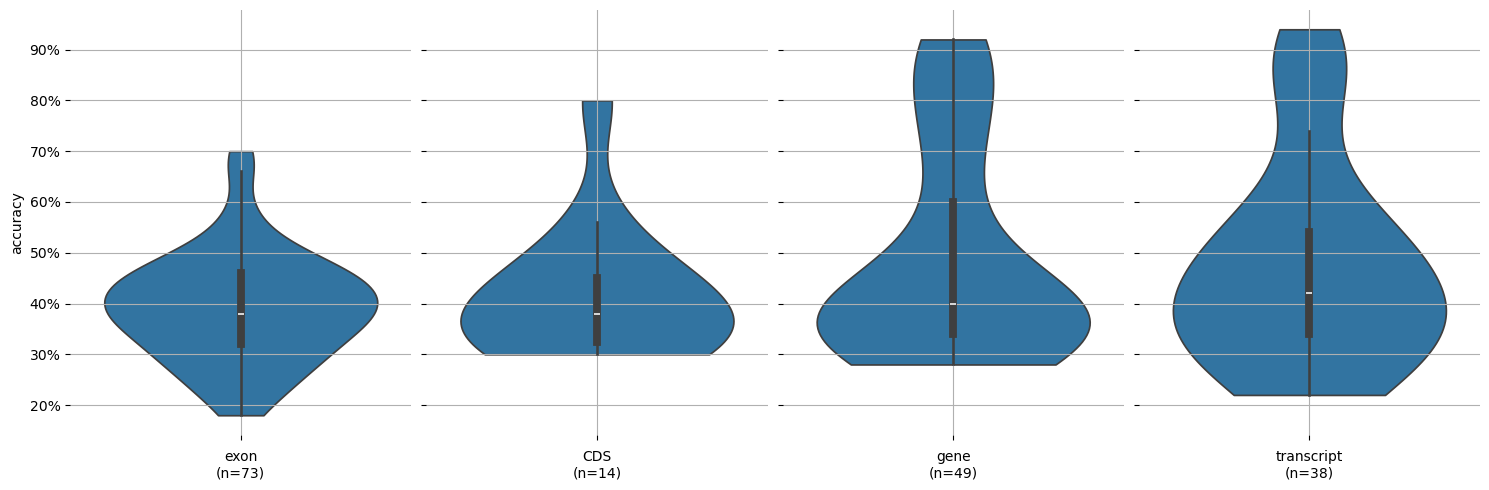

In [91]:
plot_violin_for_column(accuracy_by_position, 'gene_type')

/local/j262r/27918624/cluster_tmp/ipykernel_6502/261077611.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accuracy_by_position_edited['censat_class'] = accuracy_by_position['censat_class'].replace('censat', 'unspecified')


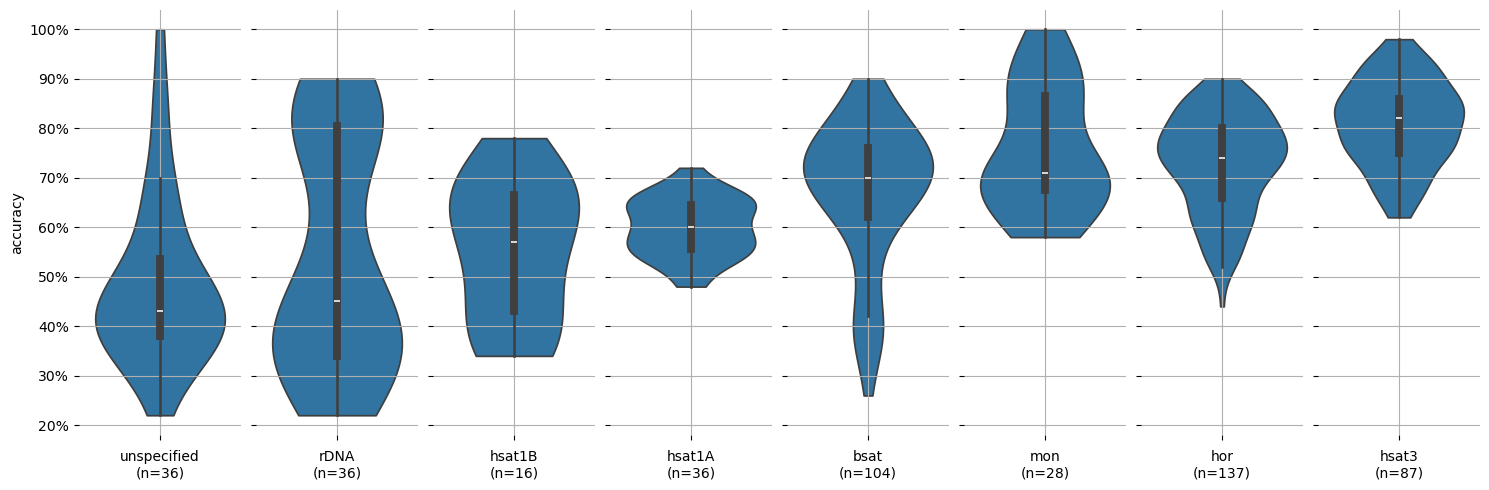

In [92]:
accuracy_by_position_edited['censat_class'] = accuracy_by_position['censat_class'].replace('censat', 'unspecified')

plot_violin_for_column(accuracy_by_position_edited, 'censat_class')


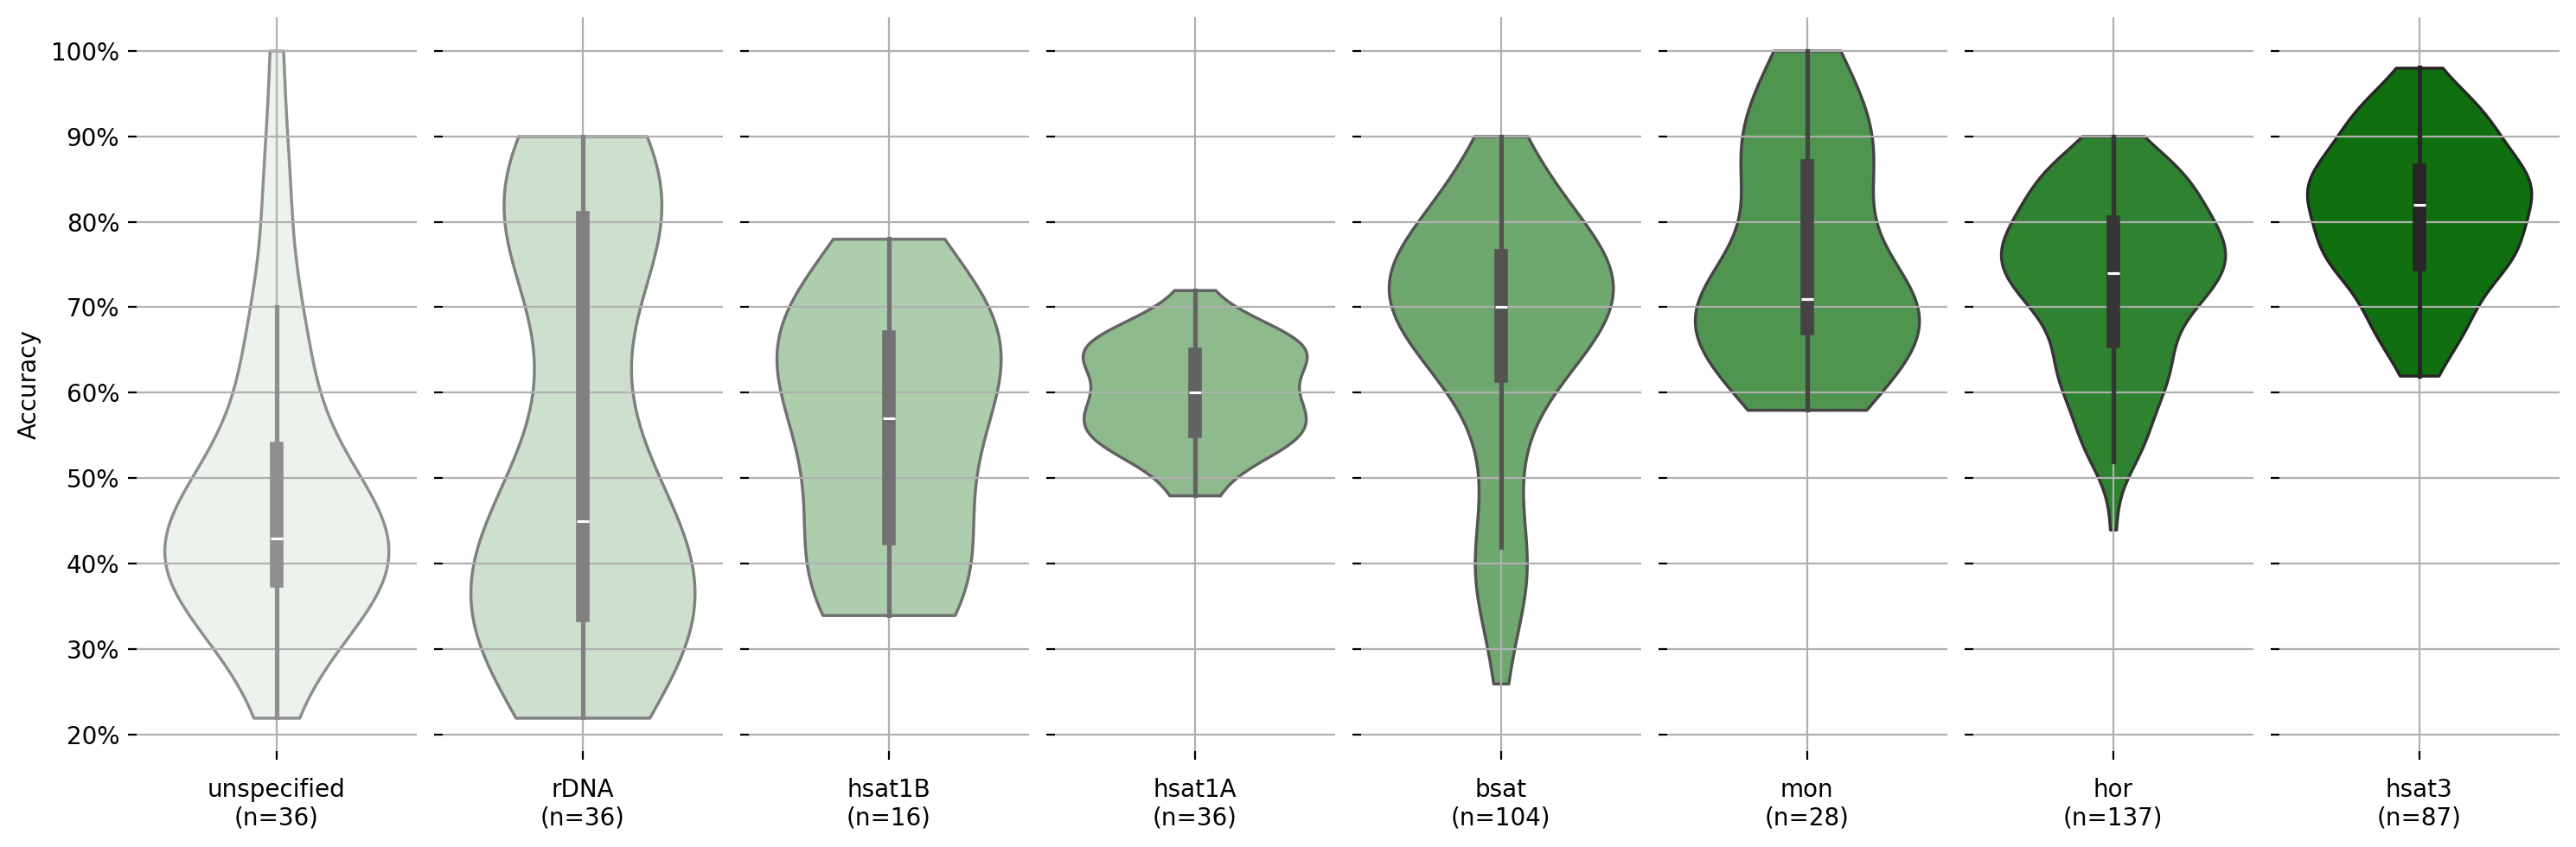

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_violin_for_column(df, column):
    # Filter out categories with fewer than 10 data points
    filtered_df = df.groupby(column).filter(lambda x: len(x) >= 10)
    if filtered_df.empty:
        print("No categories with 10 or more data points.")
        return
    
    # Get unique values in the column, excluding NA values
    unique_values = filtered_df[column].dropna().unique()
    
    # Calculate medians for sorting
    medians = {value: filtered_df[filtered_df[column] == value]['accuracy'].median() for value in unique_values}
    sorted_values = sorted(unique_values, key=lambda x: medians[x])
    
    # Calculate the number of plots needed
    num_plots = len(sorted_values)
    
    # Generate shades of green
    greens_palette = sns.light_palette("green", n_colors=num_plots)
    
    # Create a figure for the violin plots
    fig, axes = plt.subplots(1, num_plots, figsize=(15, 5), sharey=True)
    axes[0].set_ylabel('Accuracy')
    
    # Plot violin plots for each unique value
    for i, value in enumerate(sorted_values):
        data_subset = filtered_df[filtered_df[column] == value]
        sns.violinplot(y='accuracy', data=data_subset, ax=axes[i], cut=0, color=greens_palette[i])
        num_points = len(data_subset)
        axes[i].set_xlabel(f'{value}\n(n={num_points})', fontsize=10)
        axes[i].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y*100:.0f}%'))
        for spine in axes[i].spines.values():
            spine.set_visible(False)
        axes[i].grid(True)
    
    # Adjust layout for better spacing
    plt.tight_layout()
    
    # Display the plots
    plt.show()

# Replace 'censat' with 'unspecified' using .loc[]
accuracy_by_position_edited.loc[accuracy_by_position_edited['censat_class'] == 'censat', 'censat_class'] = 'unspecified'

# Plot using shades of green
plot_violin_for_column(accuracy_by_position_edited, 'censat_class')


### correlation plots

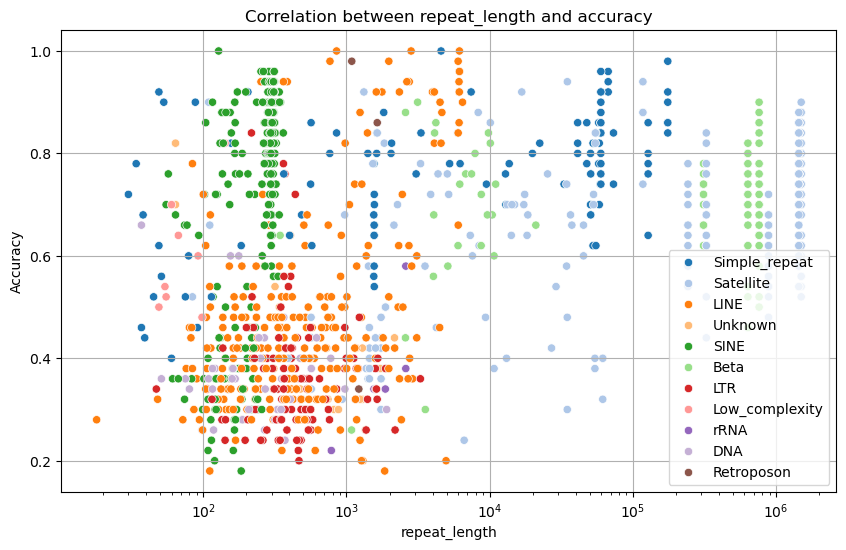

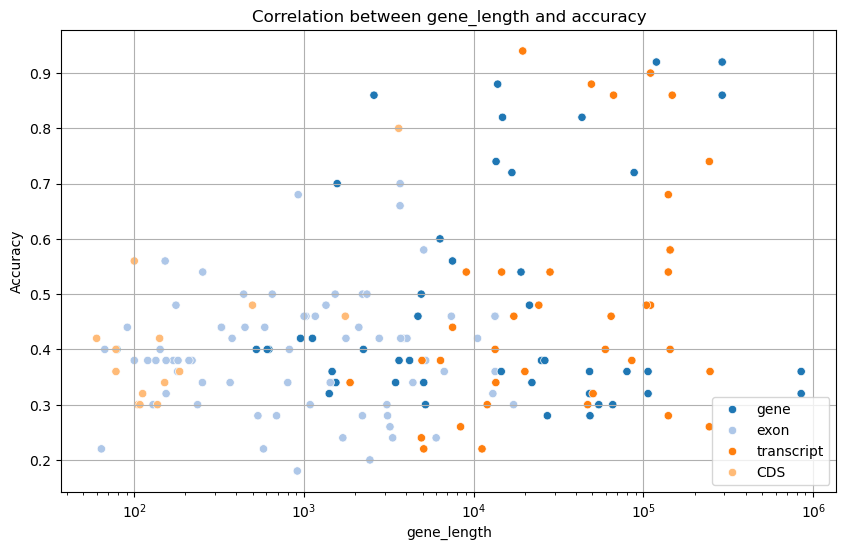

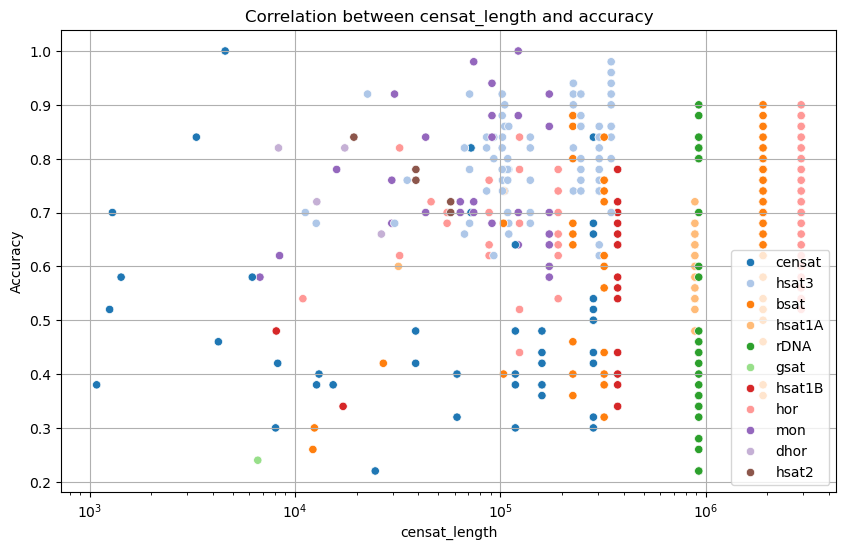

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_correlation(df, length_column, accuracy_column='accuracy', hue_column=None):
    # Suppress SettingWithCopyWarning
    pd.options.mode.chained_assignment = None  # default='warn'
    
    # Remove rows with NA values in the relevant columns
    df_filtered = df.dropna(subset=[length_column, accuracy_column])
    
    # Ensure the columns are numeric
    df_filtered[length_column] = pd.to_numeric(df_filtered[length_column], errors='coerce')
    df_filtered[accuracy_column] = pd.to_numeric(df_filtered[accuracy_column], errors='coerce')
    
    # Drop any rows that could not be converted to numeric
    df_filtered = df_filtered.dropna(subset=[length_column, accuracy_column])
    
    # Create the correlation plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_filtered, x=length_column, y=accuracy_column, hue=hue_column, palette='tab20')
    plt.xscale('log')  # Set x-axis to logarithmic scale
    plt.title(f'Correlation between {length_column} and {accuracy_column}')
    plt.xlabel(length_column)
    if len(df_filtered)>4: plt.legend(loc='lower right') 
    else:   plt.legend(loc='top right') 

    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.show()
    
    # Re-enable the default SettingWithCopyWarning
    pd.options.mode.chained_assignment = 'warn'

# Example usage for repeat_length with repeat_repeat_type
plot_correlation(accuracy_by_position, 'repeat_length', hue_column='repeat_repeat_type')

# Example usage for gene_length with gene_type
plot_correlation(accuracy_by_position, 'gene_length', hue_column='gene_type')

plot_correlation(accuracy_by_position, 'censat_length', hue_column='censat_class')


# Repeat Analysis

## functions

### old

In [195]:
### find all subsequences up to a certain length that are repeated up to a certain length in chromosome file
### for computational efficiency the most recent version of this was moved to the code/find_repeats_50.py file

from itertools import product
from tqdm import tqdm
import pandas as pd

# Read the nucleotide sequence from the file
with open('../genomic_data/t2t_genome/chr1.txt', 'r') as file:
    sequence = file.read().strip().upper()

# Function to repeat the subsequence to a length of 255 nucleotides
def repeat_to_length(subseq, target_length=255):
    return (subseq * (target_length // len(subseq) + 1))[:target_length]


# Function to check if a subsequence contains smaller repeating patterns
def has_smaller_repeating_pattern(subseq):
    length = len(subseq)
    for i in range(1, length // 2 + 1):
        if length % i == 0 and subseq[:i] * (length // i) == subseq:
            return True
    return False

# Function to check for circular equivalence
def is_circular_equivalent(subseq, found_subsequences):
    rotated_variants = {subseq[i:] + subseq[:i] for i in range(len(subseq))}
    for found in found_subsequences:
        if found in rotated_variants:
            return True
    return False

# List to keep track of found circularly unique subsequences
found_subsequences = []

# Generate all possible subsequences of length n (for n from 1 to 5)
for n in range(1,9):
    subsequences = list(product('ACGT', repeat=n))
    for subseq_tuple in tqdm(subsequences, desc=f"Processing length {n}", leave=False):
        subseq = ''.join(subseq_tuple)
        # Check if the subsequence has smaller repeating patterns
        if has_smaller_repeating_pattern(subseq):
            continue
        # Check for circular equivalence
        if is_circular_equivalent(subseq, found_subsequences):
            continue
        repeated_subseq = repeat_to_length(subseq, target_length=100)
        #repeated_subseq=subseq*20
        count = sequence.count(repeated_subseq)
        if count > 0:
            found_subsequences.append(subseq)
            print(subseq, "# ", count,)
            #with open('../genomic_data/t2t_genome/repeats_chr1.txt', 'a') as file:
            #        file.write('\n'+ f"{subseq} count: {count}" + "\n")           

Processing length 3:  52%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                       | 33/64 [00:02<00:02, 13.58it/s]

CTT #  1


Processing length 4:   1%|██▌                                                                                                                                                                                                                   | 3/256 [00:00<00:10, 23.36it/s]

AAAG #  9


Processing length 4:  51%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                        | 130/256 [00:27<00:15,  8.40it/s]

CTTT #  3


Processing length 5:   1%|█▏                                                                                                                                                                                                                   | 6/1024 [00:00<01:02, 16.32it/s]

AAAAT #  2
AAACC #  2


Processing length 5:   1%|██▍                                                                                                                                                                                                                 | 12/1024 [00:00<01:33, 10.85it/s]

AAAGG #  1


Processing length 5:   6%|████████████▍                                                                                                                                                                                                       | 60/1024 [00:12<05:14,  3.06it/s]

AATGG #  1


Processing length 5:  37%|█████████████████████████████████████████████████████████████████████████████▎                                                                                                                                     | 375/1024 [02:07<02:17,  4.71it/s]

CCTCT #  7


Processing length 5:  38%|███████████████████████████████████████████████████████████████████████████████▎                                                                                                                                   | 385/1024 [02:09<01:33,  6.83it/s]

CCTTT #  2


Processing length 5:  69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                 | 705/1024 [04:09<00:39,  8.03it/s]

GGTTT #  1


Processing length 6:   2%|████▋                                                                                                                                                                                                               | 90/4096 [00:15<08:05,  8.25it/s]

AACCCT #  10


Processing length 6:   9%|██████████████████                                                                                                                                                                                                 | 350/4096 [01:53<09:45,  6.40it/s]

ACCCTC #  1


Processing length 6:  17%|███████████████████████████████████▍                                                                                                                                                                               | 688/4096 [05:01<11:39,  4.87it/s]

AGGGTG #  1
AGGGTT #  14


Processing length 6:  34%|███████████████████████████████████████████████████████████████████████▋                                                                                                                                          | 1399/4096 [11:01<07:46,  5.79it/s]

CCCTCT #  3


Processing length 6:  37%|██████████████████████████████████████████████████████████████████████████████▎                                                                                                                                   | 1527/4096 [11:47<07:31,  5.69it/s]

CCTTCT #  1


Processing length 7:  14%|████████████████████████████▎                                                                                                                                                                                    | 2220/16384 [18:32<56:44,  4.16it/s]

AGAGGGG #  3


KeyboardInterrupt: 

#### results, better found in repeats_{lengt e.g. 50 or 100}_chr1.text file 

### --- getting statistics of most likely next base for a list of repeats from chromosome files 

In [19]:
import pandas as pd
import re
from tqdm import tqdm
from collections import Counter

def analyze_repeats(sequence_file=None, chromosome_files=None, input_df=None):
    # Check if an input DataFrame is provided; if not, read from the sequence file
    if input_df is not None:
        df = input_df
    else:
        # Step 1: Read the document with subsequences and counts
        with open(sequence_file, 'r') as file:
            document = file.read()

        # Extracting subsequences and counts from the document
        data = re.findall(r'([A-Z]+) count: (\d+)', document)
        subsequences = [seq for seq, count in data]
        counts = [int(count) for seq, count in data]

        # Creating the initial dataframe
        df = pd.DataFrame({'repeat': subsequences, 'count': counts})

    # Initialize columns for counts of nucleotides following repeated subsequences
    df['A'] = 0
    df['C'] = 0
    df['G'] = 0
    df['T'] = 0
    df['repeat_count']=0
    
    #def repeat_to_length(subseq, target_length=50):
    #    return (subseq * (target_length // len(subseq) + 1))[:target_length]
    
    # Function to find subsequences repeated to form a pattern of exactly 50 characters and extract the next nucleotide
    def find_repeats_and_next_nucleotide(sequence, subseq):
        #repeated_subseq = repeat_to_length(subseq, 50)
        repeated_subseq = subseq*2
        #pattern = f"(?=({re.escape(repeated_subseq)})(.))"  # Lookahead to include overlapping matches
        pattern = re.escape(repeated_subseq) + '(.)'  # Escape the repeated subsequence to create a pattern
        #print(f"Pattern for subsequence '{subseq}': {pattern}")  # Print the pattern for verification
        matches = re.finditer(pattern, sequence)
        next_nucleotides = [match.group(1) for match in matches if match.end(1) < len(sequence)]
        print(f"Next nucleotides for subsequence '{subseq}'", end=' ')  # Debug statement
        # Initialize the counter with all nucleotides
        repeat_count = len(next_nucleotides)

        counts = Counter({'A': 0, 'C': 0, 'G': 0, 'T': 0})
        # Update with actual counts
        counts.update(next_nucleotides)
        print(counts)
        return counts, repeat_count

    # Step 2: Loop through the list of chromosome files and analyze sequences
    for chrom_file in chromosome_files:
        print(chrom_file)
        with open(chrom_file, 'r') as file:
            chrom_sequence = file.read().strip().upper()
        
        for index, row in tqdm(df.iterrows(), total=df.shape[0], desc=f"Processing subsequences from {chrom_file}", leave=False):
            subseq = row['repeat']
            #print(subseq, end=': ')
            counts, repeat_count = find_repeats_and_next_nucleotide(chrom_sequence, subseq)
            
            df.at[index, 'A'] += counts['A']
            df.at[index, 'C'] += counts['C']
            df.at[index, 'G'] += counts['G']
            df.at[index, 'T'] += counts['T']
            df.at[index, 'repeat_count'] += repeat_count

    # Step 3: Determine the most likely nucleotide
    df['most_likely'] = df[['A', 'C', 'G', 'T']].idxmax(axis=1)

    # Save the DataFrame to a CSV file for further analysis
    #df.to_csv('subsequence_analysis.csv', index=False)
    return df 

### --- generating sequences that are not repeated in test file, based on repeated sequence list

In [5]:
import pandas as pd
import re
import random
from collections import Counter

def generate_non_existing_sequences(existing_sequences, length, num_sequences):
    generated_sequences = set()
    existing_set = set(existing_sequences)
    
    while len(generated_sequences) < num_sequences:
        sequence = ''.join(random.choices('ACGT', k=length))
        if sequence not in existing_set:
            generated_sequences.add(sequence)
    return sorted(generated_sequences)

def generate_sequences_not_in_file(sequence_file, multiplier=10):
    with open(sequence_file, 'r') as file:
        document = file.read()
    data = re.findall(r'([A-Z]+) count: (\d+)', document)
    subsequences = [seq for seq, count in data]
    original_df = pd.DataFrame({'sequence': subsequences})

    # Identify unique lengths of sequences in the original DataFrame
    sequence_lengths = original_df['sequence'].apply(len).unique()
   
    # Create a new DataFrame to store the generated sequences
    generated_sequences = []

    for length in sequence_lengths:
        existing_sequences = original_df[original_df['sequence'].apply(len) == length]['sequence']
        num_sequences_to_generate = min(multiplier * len(existing_sequences), 4**length -len(existing_sequences),100)
        #print('length',length,':', num_sequences_to_generate, 'to generate')
        new_sequences = generate_non_existing_sequences(existing_sequences, length, num_sequences_to_generate)
        generated_sequences.extend(new_sequences)

    new_df = pd.DataFrame({'sequence': generated_sequences}).rename(columns={'sequence': 'subsequence'})
    
    return new_df

## Results

###### old

In [ ]:
known_repeats = pd.read_csv('../genomic_data/t2t_annotation/t2t_autoreg_analysis/known_repeats.csv')
unknown_repeats = pd.read_csv('../genomic_data/t2t_annotation/t2t_autoreg_analysis/unknown_repeats.csv')

known_chromosomes= [f'../genomic_data/t2t_genome/chr{i}.txt' for i in range (1,2)]
unknown_chromosomes=  [f'../genomic_data/t2t_genome/chr{i}.txt' for i in range (2,21)]

known_repeats_distribution=analyze_repeats(input_df=known_repeats, chromosome_files=known_chromosomes)
known_repeats_distribution.head()

unknown_repeats_distribution=analyze_repeats(input_df=unknown_repeats, chromosome_files=unknown_chromosomes)
unknown_repeats_distribution.head()

### import and calculate results 

##### ... for repeats 

In [72]:
import pandas as pd

results = {}

for split in ['known', 'unknown']:
    probs_path                = f'../results/all_results_by_model/model_N___with_architecture0_context_255/prediction_probabilities_model_N_{split}_repeats.csv'
    repeats_path              = f'../genomic_data/t2t_annotation/t2t_autoreg_analysis/{split}_repeats.csv' 
    repeats_distribution_path = f'../genomic_data/t2t_annotation/t2t_autoreg_analysis/{split}_repeats_distribution.csv' if split=='known' \
                         else   f'../genomic_data/t2t_annotation/t2t_autoreg_analysis/{split}_repeats_distribution_Chr2-4.csv'
    output_path               = f'../genomic_data/t2t_annotation/t2t_autoreg_analysis/{split}_repeats_all_merged.csv'

    probs                     = pd.read_csv(probs_path)
    repeats                   = pd.read_csv(repeats_path)
    repeats_distribution      = pd.read_csv(repeats_distribution_path)

    # Process repeats
    repeats['next_nucl'] = repeats['expanded_repeat'].str[255:]
    repeats['expanded_repeat'] = repeats['expanded_repeat'].str[:255]
    repeats = repeats.merge(probs, left_on='expanded_repeat', right_on='Context')
    
    columns_to_rename = {col: f"{col}_probs" for col in probs.columns if col != 'Context'}
    merged_repeats = repeats.rename(columns=columns_to_rename)
    merged_repeats = merged_repeats.drop(columns=['Context'])

    # Merge repeats with distribution
    merged_df = pd.merge(merged_repeats, repeats_distribution, on='repeat', suffixes=('', '_duplicate'))

    # Remove duplicate columns and rows where repeat_count is 0
    merged_df = merged_df.loc[:, ~merged_df.columns.str.endswith('_duplicate')]    
    merged_df = merged_df[merged_df['repeat_count'] != 0]
    merged_df['highest_probs'] = merged_df[['A_probs', 'C_probs', 'G_probs', 'T_probs']].max(axis=1)


    merged_df.to_csv(output_path, index=False)
    results[split] = merged_df

known_df = results['known']
unknown_df = results['unknown']

known_df['label'] = 'known'
unknown_df['label'] = 'unknown'

# Concatenate the DataFrames
repeats = pd.concat([known_df, unknown_df], ignore_index=True)


In [73]:
# Find the column with the highest probability
repeats['highest_prob_column'] = repeats[['A_probs', 'C_probs', 'G_probs', 'T_probs']].idxmax(axis=1).str.replace('_probs', '')

# Find the column with the highest count
repeats['highest_count_column'] = repeats[['A', 'C', 'G', 'T']].idxmax(axis=1)

# Create the prediction_true column, defaulting to True
repeats['prediction_true'] = True

# Filter rows where the highest prob column does not match the highest count column
mismatched_rows = repeats[repeats['highest_prob_column'] != repeats['highest_count_column']]

# Find the highest and second highest counts
mismatched_rows['highest_count']        = mismatched_rows[['A', 'C', 'G', 'T']].max(axis=1)
mismatched_rows['second_highest_count'] = mismatched_rows[['A', 'C', 'G', 'T']].apply(lambda row: row.nlargest(2).values[-1], axis=1)

# Filter rows where the highest and second highest counts are more than 2 apart
mismatched_rows = mismatched_rows[mismatched_rows['highest_count'] - mismatched_rows['second_highest_count'] > 2]

# Set prediction_true to False for these mismatched rows
repeats.loc[mismatched_rows.index, 'prediction_true'] = False

repeats['correctly_continued'] = repeats['highest_prob_column'] == repeats['next_nucl']
repeats.to_csv(f'../genomic_data/t2t_annotation/t2t_autoreg_analysis/All_repeats_all_merged.csv', index=False)

/local/j262r/29922848/cluster_tmp/ipykernel_14713/3606951777.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mismatched_rows['highest_count']        = mismatched_rows[['A', 'C', 'G', 'T']].max(axis=1)
/local/j262r/29922848/cluster_tmp/ipykernel_14713/3606951777.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mismatched_rows['second_highest_count'] = mismatched_rows[['A', 'C', 'G', 'T']].apply(lambda row: row.nlargest(2).values[-1], axis=1)


In [74]:
print(repeats.shape)
repeats.head(3)

(10568, 20)


repeat  single_repeat_length  length  \
0      A                     1   51345   
1      G                     1    1547   
2      C                     1    2908   

                                     expanded_repeat next_nucl  A_probs  \
0  AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...         A  0.84043   
1  GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG...         G  0.08162   
2  CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...         C  0.03546   

   C_probs  G_probs  T_probs        A        C        G        T  \
0  0.02809  0.07518  0.05631  5864935  2335246  3162083  5107443   
1  0.00408  0.90538  0.00892  3622389  2283124  2512382  2143512   
2  0.90302  0.01761  0.04392  3297332  2523197   481834  3442935   

   repeat_count  highest_probs  label highest_prob_column  \
0      16469707        0.84043  known                   A   
1      10561407        0.90538  known                   G   
2       9745298        0.90302  known                   C   

  highest_count_column  prediction_true  correctly_continued  
0                    A             True                 True  
1                    A            False                 True  
2                    T            False                 True

In [75]:
## for additional randomly generated unknown repeats
probs_path   ='../results/all_results_by_model/model_N___with_architecture0_context_255/prediction_probabilities_model_N_more_random_nonGenomic_repeats.csv'
repeats_path ='../genomic_data/t2t_annotation/t2t_autoreg_analysis/more_random_nonGenomic_repeats.csv'
output_path  = '../genomic_data/t2t_annotation/t2t_autoreg_analysis/unknown_moreRandom_repeats_all_merged.csv'
probs                     = pd.read_csv(probs_path)
rand_repeats                   = pd.read_csv(repeats_path)

rand_repeats['next_nucl'] = rand_repeats['expanded_repeat'].str[255:]
rand_repeats['expanded_repeat'] = rand_repeats['expanded_repeat'].str[:255]

rand_repeats = rand_repeats.merge(probs, left_on='expanded_repeat', right_on='Context')
columns_to_rename = {col: f"{col}_probs" for col in probs.columns if col != 'Context'}
merged_repeats = rand_repeats.rename(columns=columns_to_rename)
merged_repeats = merged_repeats.drop(columns=['Context'])

merged_repeats['highest_probs']       = merged_repeats[['A_probs', 'C_probs', 'G_probs', 'T_probs']].max(axis=1)
merged_repeats['highest_prob_column'] = merged_repeats[['A_probs', 'C_probs', 'G_probs', 'T_probs']].idxmax(axis=1).str.replace('_probs', '')
merged_repeats['correctly_continued'] = merged_repeats['highest_prob_column'] == merged_repeats['next_nucl']

merged_repeats['label'] = 'unknown_random'

merged_repeats.to_csv(output_path, index=False)
repeats_large = pd.concat([repeats, merged_repeats], ignore_index=True)
#repeats_large.to_csv(f'../genomic_data/t2t_annotation/t2t_autoreg_analysis/All_repeats_all_merged_large.csv', index=False)

merged_repeats

single_repeat_length  \
0                        10   
1                        10   
2                        10   
3                        10   
4                        10   
...                     ...   
11675                   127   
11676                   127   
11677                   127   
11678                   127   
11679                   127   

                                                  repeat  \
0                                             AACGTAAATT   
1                                             GTAGGTCTAG   
2                                             GAAAATGTCT   
3                                             AGATGATTCG   
4                                             ACCAAGCCAA   
...                                                  ...   
11675  CTACTTCCGCGCCCCATTTCGGGAAGAATTCTAAATGTGCGCTGCC...   
11676  CGCAGGTTCTCCTTCAGGATTTAGCCCTAACGTTCGAGCGATAGAA...   
11677  AATCCAGTAAGAGGTGAAATCTTTCATCCACGTCGGAGATTGCGAT...   
11678  TACCTCTCCTACTCCCAAGGGTGCTTTAACGCTAAGGGGCGCATCA...   
11679  GTGGCTACATTTAGCTGTACATCGAATTCGTGCTGTATATAACCCT...   

                                         expanded_repeat next_nucl  A_probs  \
0      AACGTAAATTAACGTAAATTAACGTAAATTAACGTAAATTAACGTA...         A  0.82540   
1      GTAGGTCTAGGTAGGTCTAGGTAGGTCTAGGTAGGTCTAGGTAGGT...         T  0.00599   
2      GAAAATGTCTGAAAATGTCTGAAAATGTCTGAAAATGTCTGAAAAT...         T  0.36182   
3      AGATGATTCGAGATGATTCGAGATGATTCGAGATGATTCGAGATGA...         A  0.98973   
4      ACCAAGCCAAACCAAGCCAAACCAAGCCAAACCAAGCCAAACCAAG...         G  0.38298   
...                                                  ...       ...      ...   
11675  CTACTTCCGCGCCCCATTTCGGGAAGAATTCTAAATGTGCGCTGCC...         T  0.28811   
11676  CGCAGGTTCTCCTTCAGGATTTAGCCCTAACGTTCGAGCGATAGAA...         G  0.50030   
11677  AATCCAGTAAGAGGTGAAATCTTTCATCCACGTCGGAGATTGCGAT...         A  0.29648   
11678  TACCTCTCCTACTCCCAAGGGTGCTTTAACGCTAAGGGGCGCATCA...         A  0.17943   
11679  GTGGCTACATTTAGCTGTACATCGAATTCGTGCTGTATATAACCCT...         T  0.35144   

       C_probs  G_probs  T_probs  highest_probs highest_prob_column  \
0      0.02018  0.05886  0.09555        0.82540                   A   
1      0.01203  0.00585  0.97613        0.97613                   T   
2      0.11746  0.15320  0.36751        0.36751                   T   
3      0.00085  0.00830  0.00111        0.98973                   A   
4      0.14089  0.46196  0.01417        0.46196                   G   
...        ...      ...      ...            ...                 ...   
11675  0.30193  0.09353  0.31642        0.31642                   T   
11676  0.18120  0.05071  0.26779        0.50030                   A   
11677  0.14005  0.25759  0.30589        0.30589                   T   
11678  0.17664  0.47272  0.17121        0.47272                   G   
11679  0.17398  0.17398  0.30060        0.35144                   A   

       correctly_continued           label  
0                     True  unknown_random  
1                     True  unknown_random  
2                     True  unknown_random  
3                     True  unknown_random  
4                     True  unknown_random  
...                    ...             ...  
11675                 True  unknown_random  
11676                False  unknown_random  
11677                False  unknown_random  
11678                False  unknown_random  
11679                False  unknown_random  

[11680 rows x 12 columns]

##### ... for non-repeats 

In [83]:
import pandas as pd

probs_path = '../results/all_results_by_model/model_N___with_architecture0_context_255/prediction_probabilities_model_N_non_repeats.csv'
non_repeats_path = '../genomic_data/t2t_annotation/t2t_autoreg_analysis/non_repeats.csv'
output_path = '../genomic_data/t2t_annotation/t2t_autoreg_analysis/non_repeats_all_merged.csv'

probs = pd.read_csv(probs_path)
non_repeats = pd.read_csv(non_repeats_path)

# Process non repeats
non_repeats['next_nucl'] = non_repeats['sequence'].str[255:]
non_repeats['sequence'] = non_repeats['sequence'].str[:255]
non_repeats = non_repeats.merge(probs, left_on='sequence', right_on='Context')
columns_to_rename = {col: f"{col}_probs" for col in probs.columns if col != 'Context' and col != 'next_nucl'}
merged_df = non_repeats.rename(columns=columns_to_rename)
merged_df = merged_df.drop(columns=['Context'])

# Calculate highest_probs and the corresponding column
merged_df['highest_probs'] = merged_df[['A_probs', 'C_probs', 'G_probs', 'T_probs']].max(axis=1)
merged_df['highest_probs_column'] = merged_df[['A_probs', 'C_probs', 'G_probs', 'T_probs']].idxmax(axis=1)

# Store a boolean if the highest_probs_column (without '_probs' at the end) equals next_nucl
merged_df['prediction_correct'] = merged_df['highest_probs_column'].str.replace('_probs', '') == merged_df['next_nucl']

# Save the merged DataFrame to a CSV file
merged_df.to_csv(output_path, index=False)

# Display the first few rows of the updated DataFrame
merged_df.head()
non_repeats_stats=merged_df

In [84]:
print(non_repeats_stats.shape)
non_repeats_stats

(990, 10)


sequence    label next_nucl  \
0    TTCAATGGACACATCTGTATTTGCAGAAAATGATGAAGATGAAGAT...    known         G   
1    TTAAACATGTAGACAAAGAATTATTTTATGTTTAATATGTCCACCA...    known         T   
2    GGTTCTATGAAGCTGCTTCGGCCATTAGTAGAGAAAATGAAGTTTC...    known         A   
3    CCTAATTATCAATTGTTTCATATCACGTGAGAATGCTGAAAATCAA...    known         T   
4    GAACAGATGAGCTGGAGGCTGCAATGATCAGAACATTAGCTAGAGG...    known         C   
..                                                 ...      ...       ...   
985  TAGCTCTGCTTTTCGTCCCTCACCAAGACAGTCTTAAACTCTTTAC...  unknown         T   
986  TTTAACACCTAAGAGAAGCGAGCCACGTGCCAGGTCCCCAGCTCGG...  unknown         A   
987  CCCACGGAACTCACTTTTGTGCAGAGCCAACGTAAATTTCTAAGGA...  unknown         G   
988  GAAACTGTTTACCTTAGCAAGCCTTAAATTTTAGGAGAAATGGAAT...  unknown         G   
989  GATGTTATCAGACATAAATGCTTCTTACAAATGTTGCTTTTACATT...  unknown         A   

     A_probs  C_probs  G_probs  T_probs  highest_probs highest_probs_column  \
0    0.36634  0.18711  0.26802  0.17854        0.36634              A_probs   
1    0.29182  0.14674  0.22028  0.34117        0.34117              T_probs   
2    0.37994  0.20336  0.01226  0.40444        0.40444              T_probs   
3    0.20745  0.19489  0.25024  0.34742        0.34742              T_probs   
4    0.22472  0.24298  0.23921  0.29309        0.29309              T_probs   
..       ...      ...      ...      ...            ...                  ...   
985  0.45467  0.19863  0.01406  0.33264        0.45467              A_probs   
986  0.18263  0.21688  0.50425  0.09624        0.50425              G_probs   
987  0.15826  0.18503  0.43698  0.21973        0.43698              G_probs   
988  0.48871  0.16889  0.01685  0.32555        0.48871              A_probs   
989  0.40257  0.15280  0.22232  0.22232        0.40257              A_probs   

     prediction_correct  
0                 False  
1                  True  
2                 False  
3                  True  
4                 False  
..                  ...  
985               False  
986               False  
987                True  
988               False  
989                True  

[990 rows x 10 columns]

## Analysis of repeats vs non-repeats

### non-repeats analysis

In [32]:
non_repeats_stats[non_repeats_stats['label']=='unknown']['highest_probs'].mean() 

0.4374749598393574

In [33]:
non_repeats_stats[non_repeats_stats['label']=='unknown']['prediction_correct'].mean()

0.39759036144578314

In [34]:
non_repeats_stats.sort_values(by='highest_probs').tail(3)

sequence  label next_nucl  \
82   TATTGGCCGGGCGCGGTGGCTCACGCCTGTAATCCCAGCACTTTGG...  known         A   
476  AAGGCTAATTTCAAAAACTCTAAAGATGAAAACCTAATTAGAAAAT...  known         A   
71   TCTAGTTTGGATTTTTGAAAGACATACACAGATGACTAGACATTGA...  known         T   

     A_probs  C_probs  G_probs  T_probs  highest_probs highest_probs_column  \
82   0.99704  0.00080  0.00189  0.00027        0.99704              A_probs   
476  0.99771  0.00049  0.00146  0.00034        0.99771              A_probs   
71   0.00021  0.00116  0.00036  0.99827        0.99827              T_probs   

     prediction_correct  
82                 True  
476                True  
71                 True

In [35]:
# Calculate the total number of values for each label
label_counts = non_repeats_stats['label'].value_counts()

# Sum up the prediction_correct column for each label
correct_sums = non_repeats_stats.groupby('label')['prediction_correct'].sum()

# Calculate the percentage of correct predictions for each label
correct_percentages = (correct_sums / label_counts) * 100

# Display the results
print(correct_percentages,'%')


label
known      42.886179
unknown    39.759036
dtype: float64 %


##### plots

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Assuming repeats DataFrame is already defined

# Define custom x labels
custom_labels = ['Repeats in Chr1', 'In Chr2, not in Chr1']  # Replace with your actual labels

# Plot violin plots of highest_probs for each combination of 'next_nucl' and 'prediction_correct'
plt.figure(figsize=(8, 6))

g = sns.catplot(
    data=non_repeats_stats,
    x='label', 
    y='highest_probs', 
    hue='prediction_correct', 
    kind='violin', 
    split=True, 
    cut=0,
    height=4, 
    aspect=1,
    palette={True: 'blue', False: 'red'},
    inner=None,  # Disable the default inner boxplot
    legend=False
)

# Manually add the inner boxplot with custom colors
for ax in g.axes.flat:
    sns.boxplot(
        data=non_repeats_stats,
        x='label', 
        y='highest_probs', 
        hue='prediction_correct', 
        showcaps=True, 
        boxprops={'facecolor': 'white'}, 
        showfliers=False, 
        whiskerprops={'linewidth': 2}, 
        ax=ax,
        width=0.2,
        dodge=True
    ).legend_.remove()  # Remove the legend for the boxplot

# Adjust the plot
g.set_axis_labels("", "Probability of highest prediction")
g.set_xticklabels(custom_labels)  # Set custom x labels
g.fig.suptitle('Highest Prediction Probabilities for Non-repeat sequences (Trained on Chr1)', fontsize=12)

# Calculate the number of samples for each part
n_samples = non_repeats_stats.groupby(['label', 'prediction_correct']).size().unstack(fill_value=0)

# Add text annotations for the number of samples
label_map = {'known': 'Seq. in train data', 'unknown': 'Seq. not in train data'}
for label, custom_label in label_map.items():
    for j, cont in enumerate([False, True]):
        count = n_samples.loc[label, cont]
        ax = g.axes[0, 0]  # Since there's only one row, we use (0,0)
        ax.text(j / 5 + (0.15 if label == 'known' else 0.65), -0.12, f'n={count}', ha='center', va='center', transform=ax.transAxes, fontsize=8)

# Format the y-axis as percentages
def percent_formatter(x, pos):
    return f'{x * 100:.0f}%'

g.ax.yaxis.set_major_formatter(FuncFormatter(percent_formatter))
plt.legend(title='Prediction', loc='upper center',  bbox_to_anchor=(1.2, 1),labels=['Incorrect', 'Correct'])# Add grid
#g.ax.grid(True, which="both", ls="--")

# Show the plot
plt.subplots_adjust(top=0.85)
plt.show()
## split such that proportions seem right

NameError: name 'non_repeats_stats' is not defined

<Figure size 800x600 with 0 Axes>

### repeats analysis

In [37]:
repeats[repeats['correctly_continued']==False].head(3)

repeat  single_repeat_length  length  \
31     TGG                     3    5244   
55     TCG                     3      86   
106   TTGT                     4    4295   

                                       expanded_repeat next_nucl  A_probs  \
31   TGGTGGTGGTGGTGGTGGTGGTGGTGGTGGTGGTGGTGGTGGTGGT...         T  0.51841   
55   TCGTCGTCGTCGTCGTCGTCGTCGTCGTCGTCGTCGTCGTCGTCGT...         T  0.91619   
106  TTGTTTGTTTGTTTGTTTGTTTGTTTGTTTGTTTGTTTGTTTGTTT...         T  0.52434   

     C_probs  G_probs  T_probs      A      C      G      T  repeat_count  \
31   0.00757  0.04425  0.42977  17797  42009  22419  28791        111016   
55   0.01002  0.04980  0.02399    554    325    336    455          1670   
106  0.01971  0.02801  0.42795   2333   1635   2352   9440         15760   

     highest_probs  label highest_prob_column highest_count_column  \
31         0.51841  known                   A                    C   
55         0.91619  known                   A                    A   
106        0.52434  known                   A                    T   

     prediction_true  correctly_continued  
31             False                False  
55              True                False  
106            False                False

In [38]:
repeats.shape

(10568, 20)

In [39]:
repeats[repeats['correctly_continued']==False].shape

(505, 20)

In [40]:
print (f' The percentage of wrongly continued repeats is \
{repeats[repeats['correctly_continued']==False].shape[0] / repeats.shape[0] *100} %')

print (f' for unseen repeats: \
{repeats[(repeats['correctly_continued']==False) &  (repeats['label']=='unknown')].shape[0] / repeats[(repeats['label']=='unknown')].shape[0] *100} %')

print (f' for seen repeats: \
{repeats[(repeats['correctly_continued']==False) & (repeats['label']=='known')].shape[0] / repeats[(repeats['label']=='known')].shape[0] *100} %')


 The percentage of wrongly continued repeats is 4.778576835730507 %
 for unseen repeats: 4.889206576125805 %
 for seen repeats: 4.561992723201791 %


In [282]:
# Calculate the percentage of rows where highest_count_column != next_nucl for correctly_continued == True
true_condition = (repeats['correctly_continued'] == True)
false_condition = (repeats['correctly_continued'] == False)

true_percentage = (repeats[true_condition]['highest_count_column'] != repeats[true_condition]['next_nucl']).mean() * 100
false_percentage = (repeats[false_condition]['highest_count_column'] != repeats[false_condition]['next_nucl']).mean() * 100

# Display the results
print(f"Percentage of rows where highest_count_column != next_nucl for correctly_continued == True: {true_percentage:.2f}%")
print(f"Percentage of rows where highest_count_column != next_nucl for correctly_continued == False: {false_percentage:.2f}%")


Percentage of rows where highest_count_column != next_nucl for correctly_continued == True: 63.16%
Percentage of rows where highest_count_column != next_nucl for correctly_continued == False: 76.24%


#### plots

/local/j262r/29922848/cluster_tmp/ipykernel_14713/3162748184.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


<Figure size 1200x600 with 0 Axes>

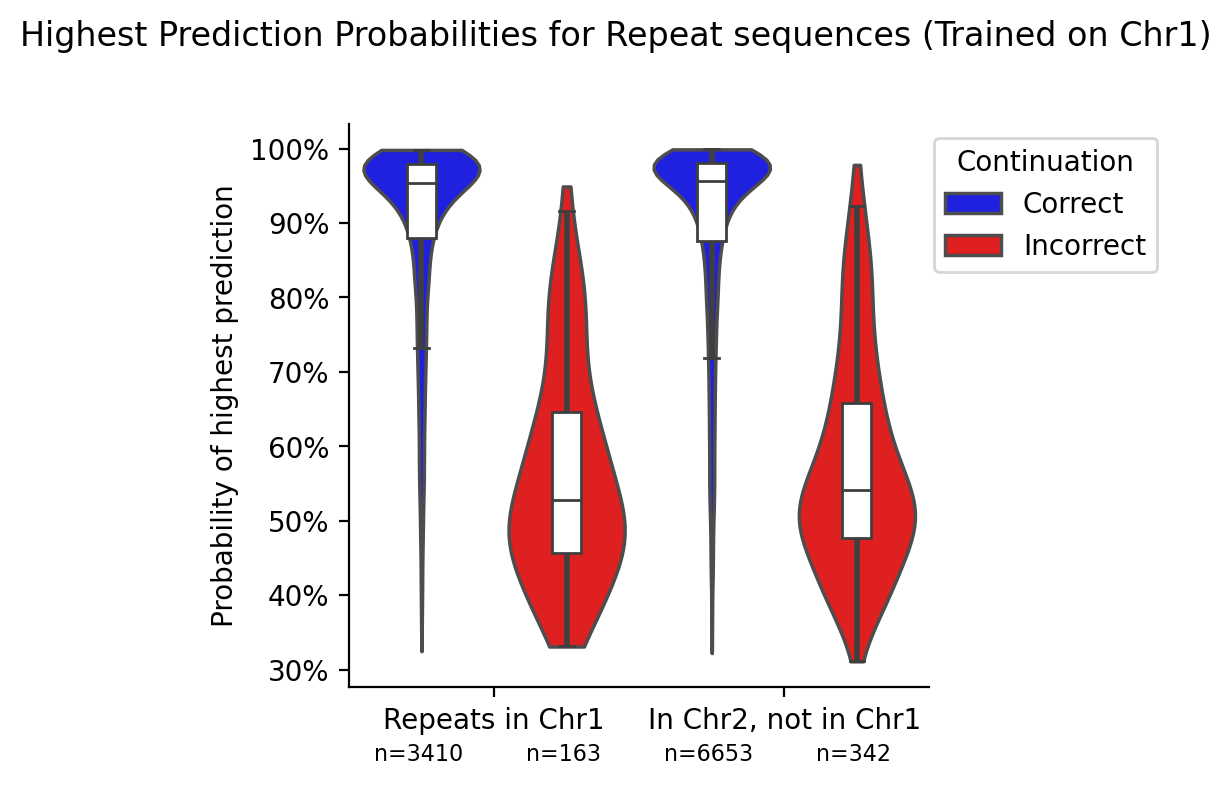

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Assuming repeats DataFrame is already defined

# Define custom x labels
custom_labels = ['Repeats in Chr1', 'In Chr2, not in Chr1'] 

# Create a column to differentiate between 'correctly_continued' values for each 'label'
repeats['label_correct'] = repeats.apply(lambda row: f"{row['label']} - {'Correct' if row['correctly_continued'] else 'Incorrect'}", axis=1)

# Define the palette with correct keys
palette = {
    'known - Correct': 'blue', 
    'known - Incorrect': 'red',
    'unknown - Correct': 'blue', 
    'unknown - Incorrect': 'red'
}

# Plot violin plots of highest_probs for each combination of 'label' and 'correctly_continued'
plt.figure(figsize=(12, 6))

g = sns.catplot(
    data=repeats,
    x='label_correct', 
    y='highest_probs', 
    kind='violin', 
    split=False, 
    cut=0,
    height=4, 
    aspect=1,
    width=0.8,
    palette=palette,
    inner=None,  # Disable the default inner boxplot
    legend=False
)

# Manually add the inner boxplot with custom colors
for ax in g.axes.flat:
    sns.boxplot(
        data=repeats,
        x='label_correct',
        y='highest_probs', 
        showcaps=True, 
        boxprops={'facecolor': 'white'}, 
        showfliers=False, 
        whiskerprops={'linewidth': 2}, 
        ax=ax,
        width=0.2,
        dodge=True
    )

# Adjust the plot
g.set_axis_labels("", "Probability of highest prediction")
# Set custom x labels only for the first and third position
g.set_xticklabels(['']*4)
for ax in g.axes.flat:
    ax.set_xticks([0.5, 2.5])
    ax.set_xticklabels(custom_labels)

g.fig.suptitle('Highest Prediction Probabilities for Repeat sequences (Trained on Chr1)', fontsize=12)

# Calculate the number of samples for each part
n_samples = repeats.groupby(['label_correct']).size()

for i, label_correct in enumerate(n_samples.index):
    count = n_samples.loc[label_correct]
    ax = g.axes[0, 0]  # Since there's only one row, we use (0,0)
    ax.text(i / 4 + 0.12, -0.12, f'n={count}', ha='center', va='center', transform=ax.transAxes, fontsize=8)


# Format the y-axis as percentages
def percent_formatter(x, pos):
    return f'{x * 100:.0f}%'

g.ax.yaxis.set_major_formatter(FuncFormatter(percent_formatter))
plt.legend(title='Continuation', loc='upper center', bbox_to_anchor=(1.2, 1), labels=['Correct', 'Incorrect'])

# Add grid

# Show the plot
plt.subplots_adjust(top=0.85)
plt.show()


In [79]:
print(repeats[(repeats['label']=='known')   & (repeats['correctly_continued']==False)].shape)
print(repeats[(repeats['label']=='known')   & (repeats['correctly_continued']==True)].shape)
print(repeats[(repeats['label']=='unknown') & (repeats['correctly_continued']==False)].shape)
print(repeats[(repeats['label']=='unknown') & (repeats['correctly_continued']==True)].shape)

(163, 21)
(3410, 21)
(342, 21)
(6653, 21)


In [80]:
aggregated_single_length = repeats_large.groupby(['label', 'single_repeat_length']).agg(
    continuation_accuracy=('correctly_continued', lambda x: x.mean() * 100),
    prediction_accuracy=('prediction_true', lambda x: x.mean() * 100),
    certainty=('highest_probs', lambda x: x.mean() * 100),
    num_datapoints=('correctly_continued', 'size')
).reset_index()
aggregated_single_length#.head(3)

label  single_repeat_length  continuation_accuracy  \
0             known                     1             100.000000   
1             known                     2             100.000000   
2             known                     3              96.610169   
3             known                     4              99.528302   
4             known                     5              97.528517   
..              ...                   ...                    ...   
133  unknown_random                   123              58.585859   
134  unknown_random                   124              50.505051   
135  unknown_random                   125              57.575758   
136  unknown_random                   126              45.454545   
137  unknown_random                   127              51.020408   

     prediction_accuracy  certainty  num_datapoints  
0              50.000000  87.345000               4  
1              25.000000  93.371083              12  
2              62.711864  93.064085              59  
3              39.150943  93.783627             212  
4              67.110266  90.400901             526  
..                   ...        ...             ...  
133                  NaN  42.834424              99  
134                  NaN  39.855596              99  
135                  NaN  41.077990              99  
136                  NaN  40.081980              99  
137                  NaN  39.173388              98  

[138 rows x 6 columns]

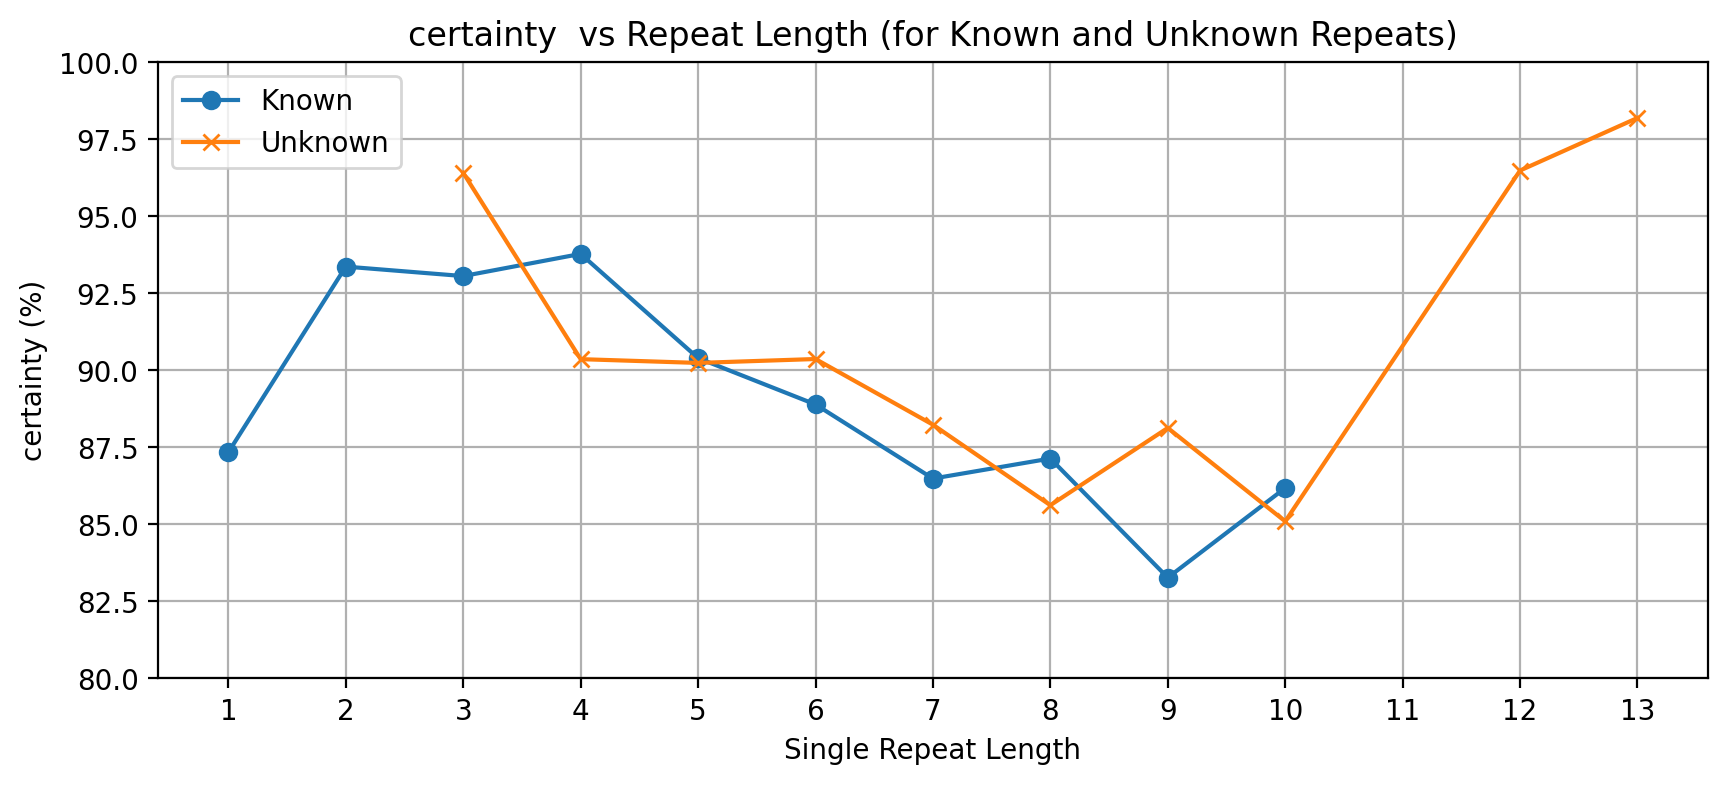

In [81]:
import matplotlib.pyplot as plt

# Assuming aggregated_single_length DataFrame is already defined
# Separate the data for 'known' and 'unknown' labels
known_data = aggregated_single_length[aggregated_single_length['label'] == 'known']
unknown_data = aggregated_single_length[aggregated_single_length['label'] == 'unknown']

# Plot for 'known' and 'unknown' labels in the same plot
plt.figure(figsize=(10, 4))
plt.plot(known_data['single_repeat_length'], known_data['certainty'], marker='o', label='Known')
plt.plot(unknown_data['single_repeat_length'], unknown_data['certainty'], marker='x', label='Unknown')


# Show all values from 1 to 13 on the x-axis
plt.xticks(range(1, 14))

# Add number of datapoints beneath the x-axis, aligned with ticks
ax = plt.gca()
for i, row in known_data.iterrows():
    ax.annotate(f"n={row['num_datapoints']}", xy=(row['single_repeat_length'], 0), xytext=(0, -32),
                textcoords='offset points', ha='center', va='top', fontsize=8, color='blue')
for i, row in unknown_data.iterrows():
    ax.annotate(f"n={row['num_datapoints']}", xy=(row['single_repeat_length'], 0), xytext=(0, -40),
                textcoords='offset points', ha='center', va='top', fontsize=8,color='orange')

plt.ylim(80, 100)
plt.xlabel('Single Repeat Length')
plt.ylabel('certainty (%)')
plt.title('certainty  vs Repeat Length (for Known and Unknown Repeats)')
plt.legend()
plt.grid(True)
plt.show()


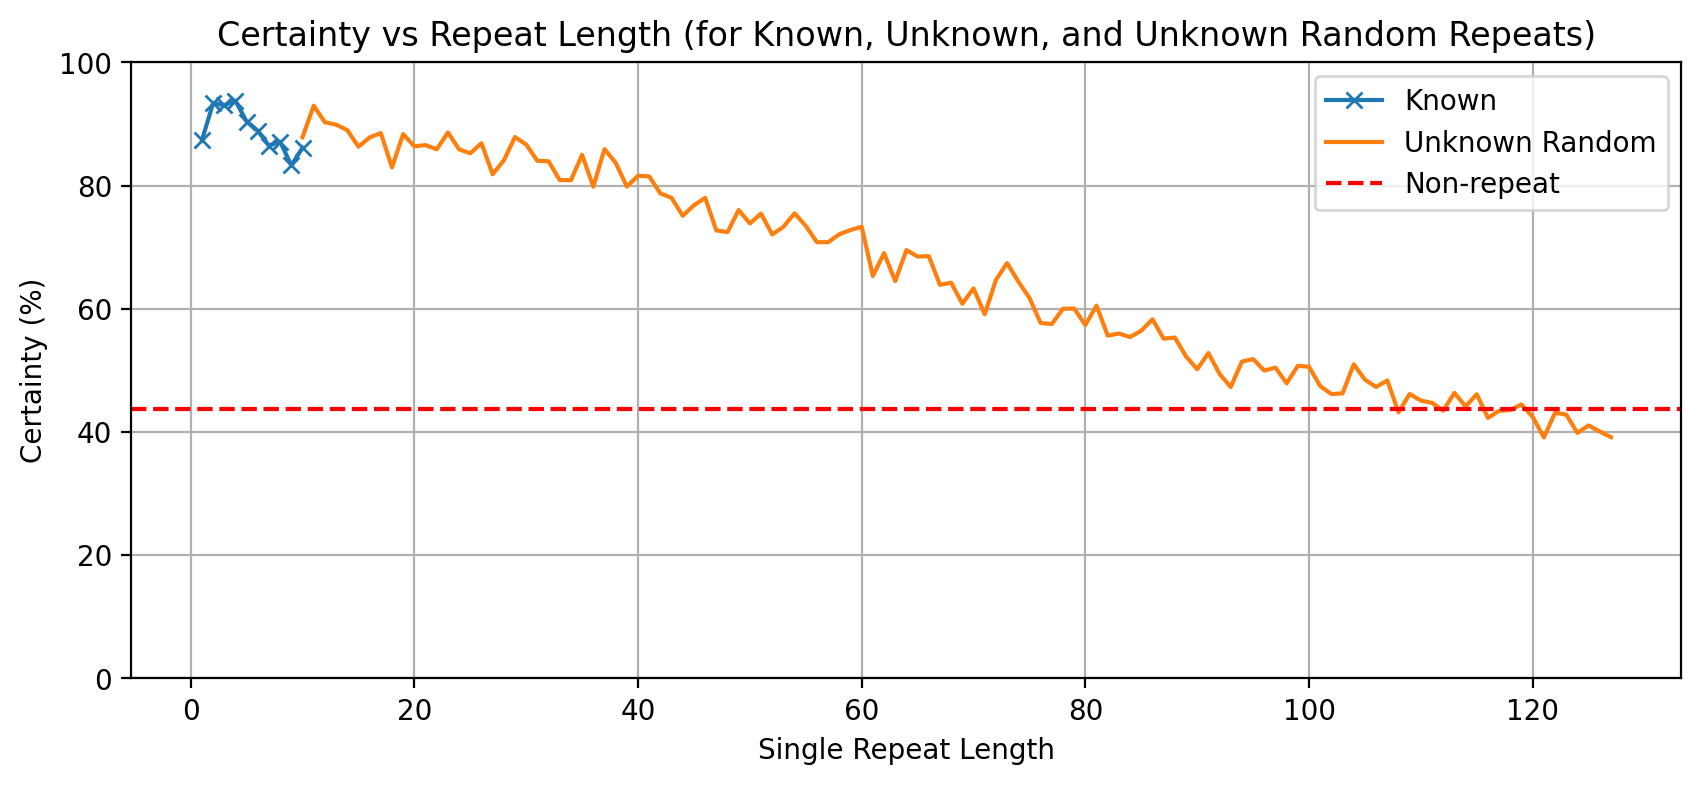

In [87]:
import matplotlib.pyplot as plt

# Assuming aggregated_single_length DataFrame is already defined
# Separate the data for 'known', 'unknown', and 'unknown_random' labels
known_data = aggregated_single_length[aggregated_single_length['label'] == 'known']
unknown_data = aggregated_single_length[aggregated_single_length['label'] == 'unknown']
unknown_random_data = aggregated_single_length[aggregated_single_length['label'] == 'unknown_random']

# Plot for 'known', 'unknown', and 'unknown_random' labels in the same plot
plt.figure(figsize=(10, 4))
plt.plot(known_data['single_repeat_length'], known_data['certainty'], marker='x', label='Known')
#plt.plot(unknown_data['single_repeat_length'], unknown_data['certainty'], marker='x', label='Unknown')
plt.plot(unknown_random_data['single_repeat_length'], unknown_random_data['certainty'], marker='', label='Unknown Random')

# Show all values from 1 to 13 on the x-axis
plt.xticks()

# Add number of datapoints beneath the x-axis, aligned with ticks
ax = plt.gca()

baseline=(non_repeats_stats[non_repeats_stats['label']=='unknown']['highest_probs'].mean())*100 
plt.axhline(y=baseline, color='red', linestyle='--', label='Non-repeat')

plt.ylim(0, 100)
plt.xlabel('Single Repeat Length')
plt.ylabel('Certainty (%)')
plt.title('Certainty vs Repeat Length (for Known, Unknown, and Unknown Random Repeats)')
plt.legend()
plt.grid(True)
plt.show()


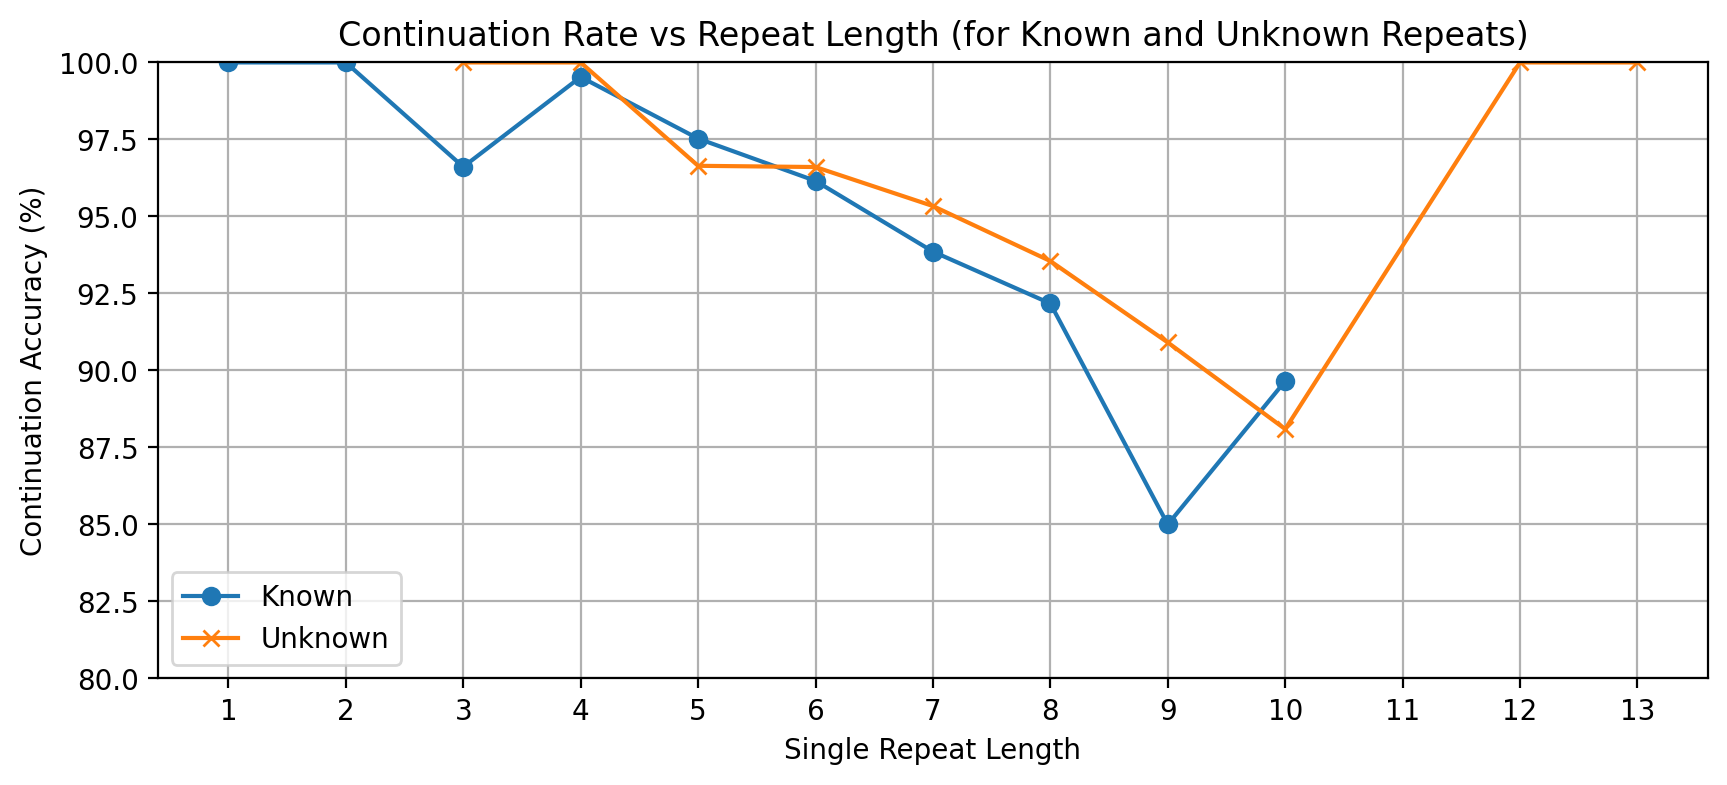

In [356]:
import matplotlib.pyplot as plt

# Assuming aggregated_single_length DataFrame is already defined
# Separate the data for 'known' and 'unknown' labels
known_data = aggregated_single_length[aggregated_single_length['label'] == 'known']
unknown_data = aggregated_single_length[aggregated_single_length['label'] == 'unknown']

# Plot for 'known' and 'unknown' labels in the same plot
plt.figure(figsize=(10, 4))
plt.plot(known_data['single_repeat_length'], known_data['continuation_accuracy'], marker='o', label='Known')
plt.plot(unknown_data['single_repeat_length'], unknown_data['continuation_accuracy'], marker='x', label='Unknown')

# Show all values from 1 to 13 on the x-axis
plt.xticks(range(1, 14))

# Add number of datapoints beneath the x-axis, aligned with ticks
ax = plt.gca()
for i, row in known_data.iterrows():
    ax.annotate(f"n={row['num_datapoints']}", xy=(row['single_repeat_length'], 0), xytext=(0, -32),
                textcoords='offset points', ha='center', va='top', fontsize=8, color='blue')
for i, row in unknown_data.iterrows():
    ax.annotate(f"n={row['num_datapoints']}", xy=(row['single_repeat_length'], 0), xytext=(0, -40),
                textcoords='offset points', ha='center', va='top', fontsize=8,color='orange')

plt.ylim(80, 100)
plt.xlabel('Single Repeat Length')
plt.ylabel('Continuation Accuracy (%)')
plt.title('Continuation Accuracy vs Repeat Length (for Known and Unknown Repeats)')
plt.legend()
plt.grid(True)
plt.show()


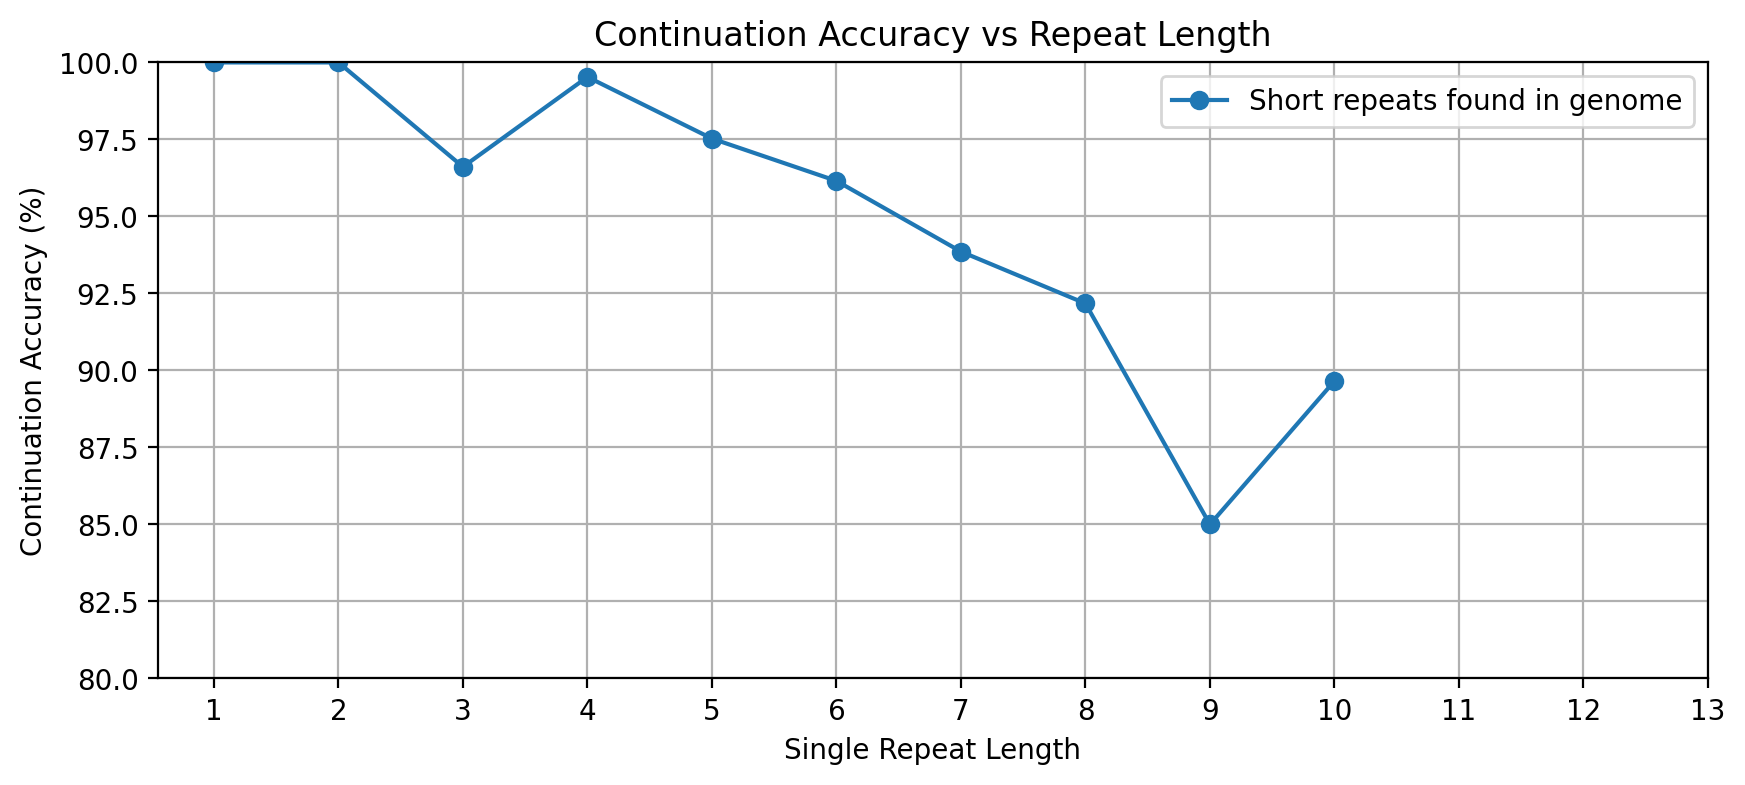

In [50]:
import matplotlib.pyplot as plt

# Assuming aggregated_single_length DataFrame is already defined
# Separate the data for 'known' and 'unknown' labels
known_data = aggregated_single_length[aggregated_single_length['label'] == 'known']
#unknown_data = aggregated_single_length[aggregated_single_length['label'] == 'unknown']

# Plot for 'known' and 'unknown' labels in the same plot
plt.figure(figsize=(10, 4))
plt.plot(known_data['single_repeat_length'], known_data['continuation_accuracy'], marker='o', label='Short repeats found in genome')
#plt.plot(unknown_data['single_repeat_length'], unknown_data['continuation_accuracy'], marker='x', label='Unknown')

# Show all values from 1 to 13 on the x-axis
plt.xticks(range(1, 14))

# Add number of datapoints beneath the x-axis, aligned with ticks
ax = plt.gca()
for i, row in known_data.iterrows():
    ax.annotate(f"n={row['num_datapoints']}", xy=(row['single_repeat_length'], 0), xytext=(0, -32),
                textcoords='offset points', ha='center', va='top', fontsize=8, color='blue')
"""
for i, row in unknown_data.iterrows():
    ax.annotate(f"n={row['num_datapoints']}", xy=(row['single_repeat_length'], 0), xytext=(0, -40),
                textcoords='offset points', ha='center', va='top', fontsize=8,color='orange')
"""
plt.ylim(80, 100)
plt.xlabel('Single Repeat Length')
plt.ylabel('Continuation Accuracy (%)')
plt.title('Continuation Accuracy vs Repeat Length')
plt.legend()
plt.grid(True)
plt.show()


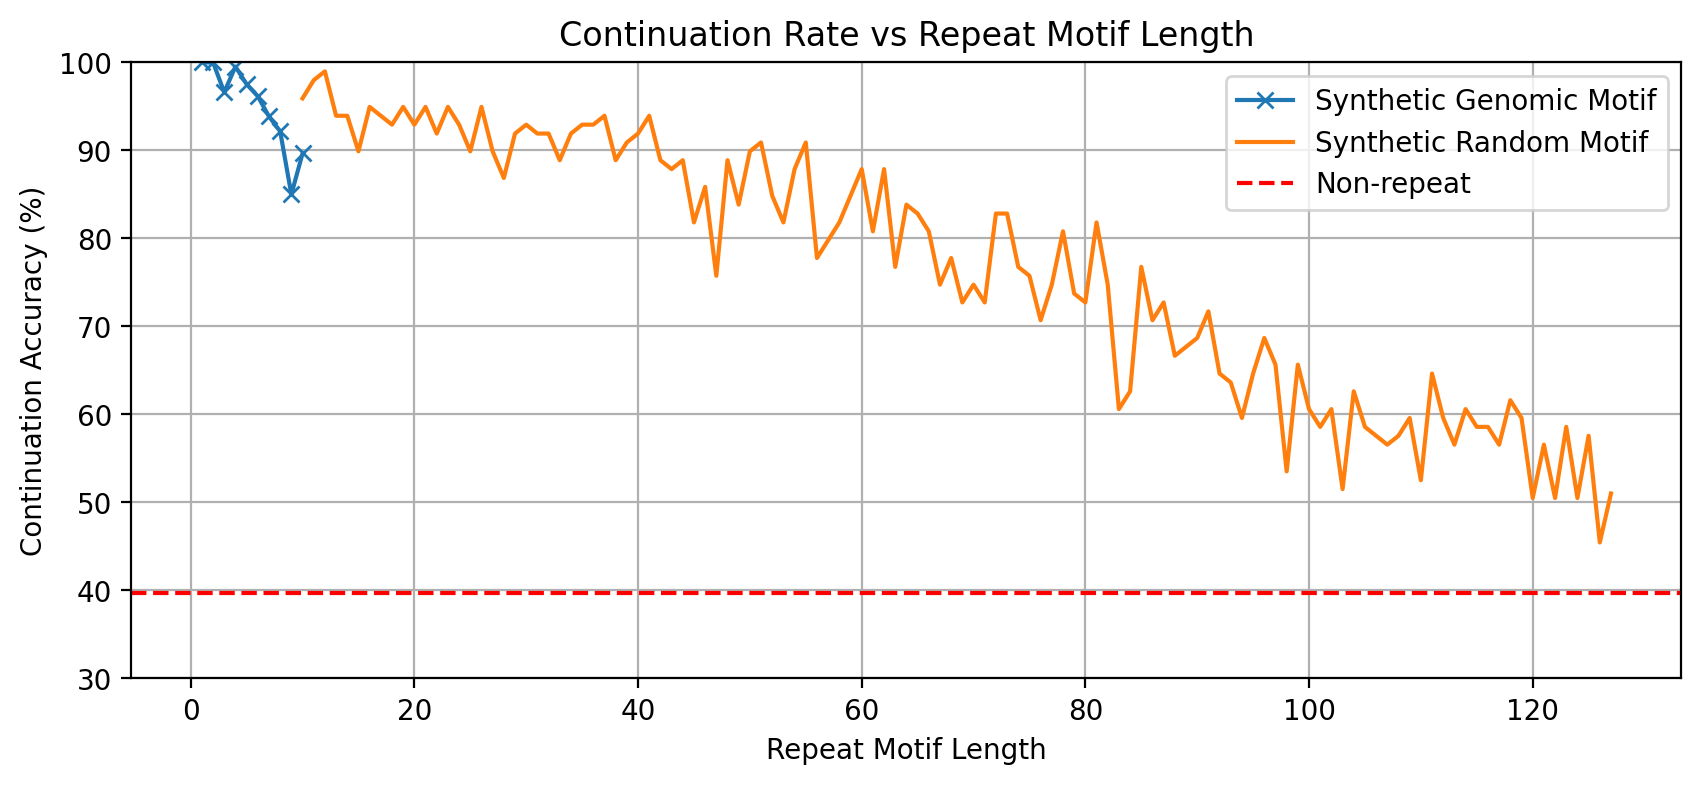

In [92]:
import matplotlib.pyplot as plt

# Assuming aggregated_single_length DataFrame is already defined
# Separate the data for 'known', 'unknown', and 'unknown_random' labels
known_data = aggregated_single_length[aggregated_single_length['label'] == 'known']
unknown_data = aggregated_single_length[aggregated_single_length['label'] == 'unknown']
unknown_random_data = aggregated_single_length[aggregated_single_length['label'] == 'unknown_random']

# Plot for 'known', 'unknown', and 'unknown_random' labels in the same plot
plt.figure(figsize=(10, 4))
plt.plot(known_data['single_repeat_length'], known_data['continuation_accuracy'], marker='x', label='Synthetic Genomic Motif')
#plt.plot(unknown_data['single_repeat_length'], unknown_data['continuation_accuracy'], marker='x', label='Unknown')
plt.plot(unknown_random_data['single_repeat_length'], unknown_random_data['continuation_accuracy'], marker='', label='Synthetic Random Motif')

# Set x-axis range and ticks
plt.xticks()

baseline=(non_repeats_stats[non_repeats_stats['label']=='unknown']['prediction_correct'].mean())*100 
plt.axhline(y=baseline, color='red', linestyle='--', label='Non-repeat')

plt.ylim(30, 100)
plt.xlabel('Repeat Motif Length')
plt.ylabel('Continuation Accuracy (%)')
plt.title('Continuation Rate vs Repeat Motif Length')
plt.legend()
plt.grid(True)
plt.show()


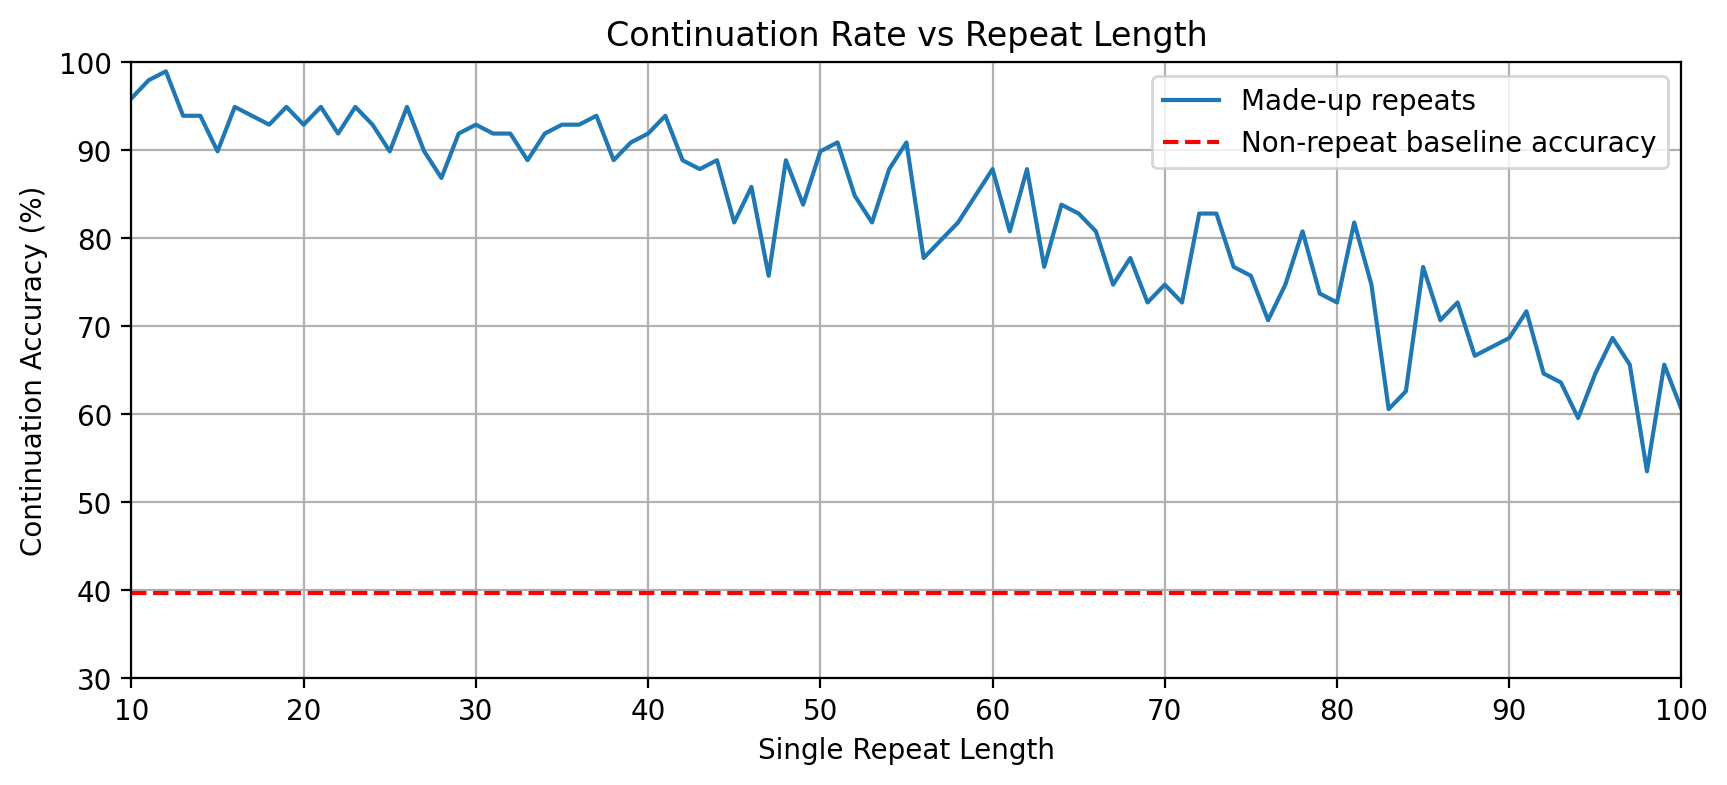

In [58]:
import matplotlib.pyplot as plt

# Assuming aggregated_single_length DataFrame is already defined
# Separate the data for 'known', 'unknown', and 'unknown_random' labels
#known_data = aggregated_single_length[aggregated_single_length['label'] == 'known']
#unknown_data = aggregated_single_length[aggregated_single_length['label'] == 'unknown']
unknown_random_data = aggregated_single_length[aggregated_single_length['label'] == 'unknown_random']

# Plot for 'known', 'unknown', and 'unknown_random' labels in the same plot
plt.figure(figsize=(10, 4))
#plt.plot(known_data['single_repeat_length'], known_data['continuation_accuracy'], marker='o', label='Known')
#plt.plot(unknown_data['single_repeat_length'], unknown_data['continuation_accuracy'], marker='x', label='Unknown')
plt.plot(unknown_random_data['single_repeat_length'], unknown_random_data['continuation_accuracy'], marker='', label='Made-up repeats')

# Set x-axis range and ticks
plt.xticks()

baseline=(non_repeats_stats[non_repeats_stats['label']=='unknown']['prediction_correct'].mean())*100 
plt.axhline(y=baseline, color='red', linestyle='--', label='Non-repeat baseline accuracy')

plt.ylim(30, 100)
plt.xlim(10, 100)

plt.xlabel('Single Repeat Length')
plt.ylabel('Continuation Accuracy (%)')
plt.title('Continuation Rate vs Repeat Length')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
### show that it converges!!!

repeat_count
(0.999, 1.774]                 634
(1.774, 3.146]                1006
(3.146, 5.579]                 873
(5.579, 9.895]                1439
(9.895, 17.549]               1569
(17.549, 31.125]              1055
(31.125, 55.202]               916
(55.202, 97.906]               954
(97.906, 173.645]              559
(173.645, 307.973]             356
(307.973, 546.215]             389
(546.215, 968.757]             258
(968.757, 1718.17]             161
(1718.17, 3047.315]            105
(3047.315, 5404.662]            77
(5404.662, 9585.611]            75
(9585.611, 17000.865]           47
(17000.865, 30152.426]          20
(30152.426, 53477.796]          14
(53477.796, 94847.249]          23
(94847.249, 168219.36]          20
(168219.36, 298350.805]          3
(298350.805, 529149.574]         1
(529149.574, 938490.083]         2
(938490.083, 1664488.983]        8
(1664488.983, 2952107.459]       0
(2952107.459, 5235804.223]       0
(5235804.223, 9286127.366]       0
(928612

/local/j262r/28017303/cluster_tmp/ipykernel_73493/1684667353.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  known_repeat_count_stats = known_repeats.groupby('repeat_count_bin')['correctly_continued'].mean() * 100
/local/j262r/28017303/cluster_tmp/ipykernel_73493/1684667353.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unknown_repeat_count_stats = unknown_repeats.groupby('repeat_count_bin')['correctly_continued'].mean() * 100


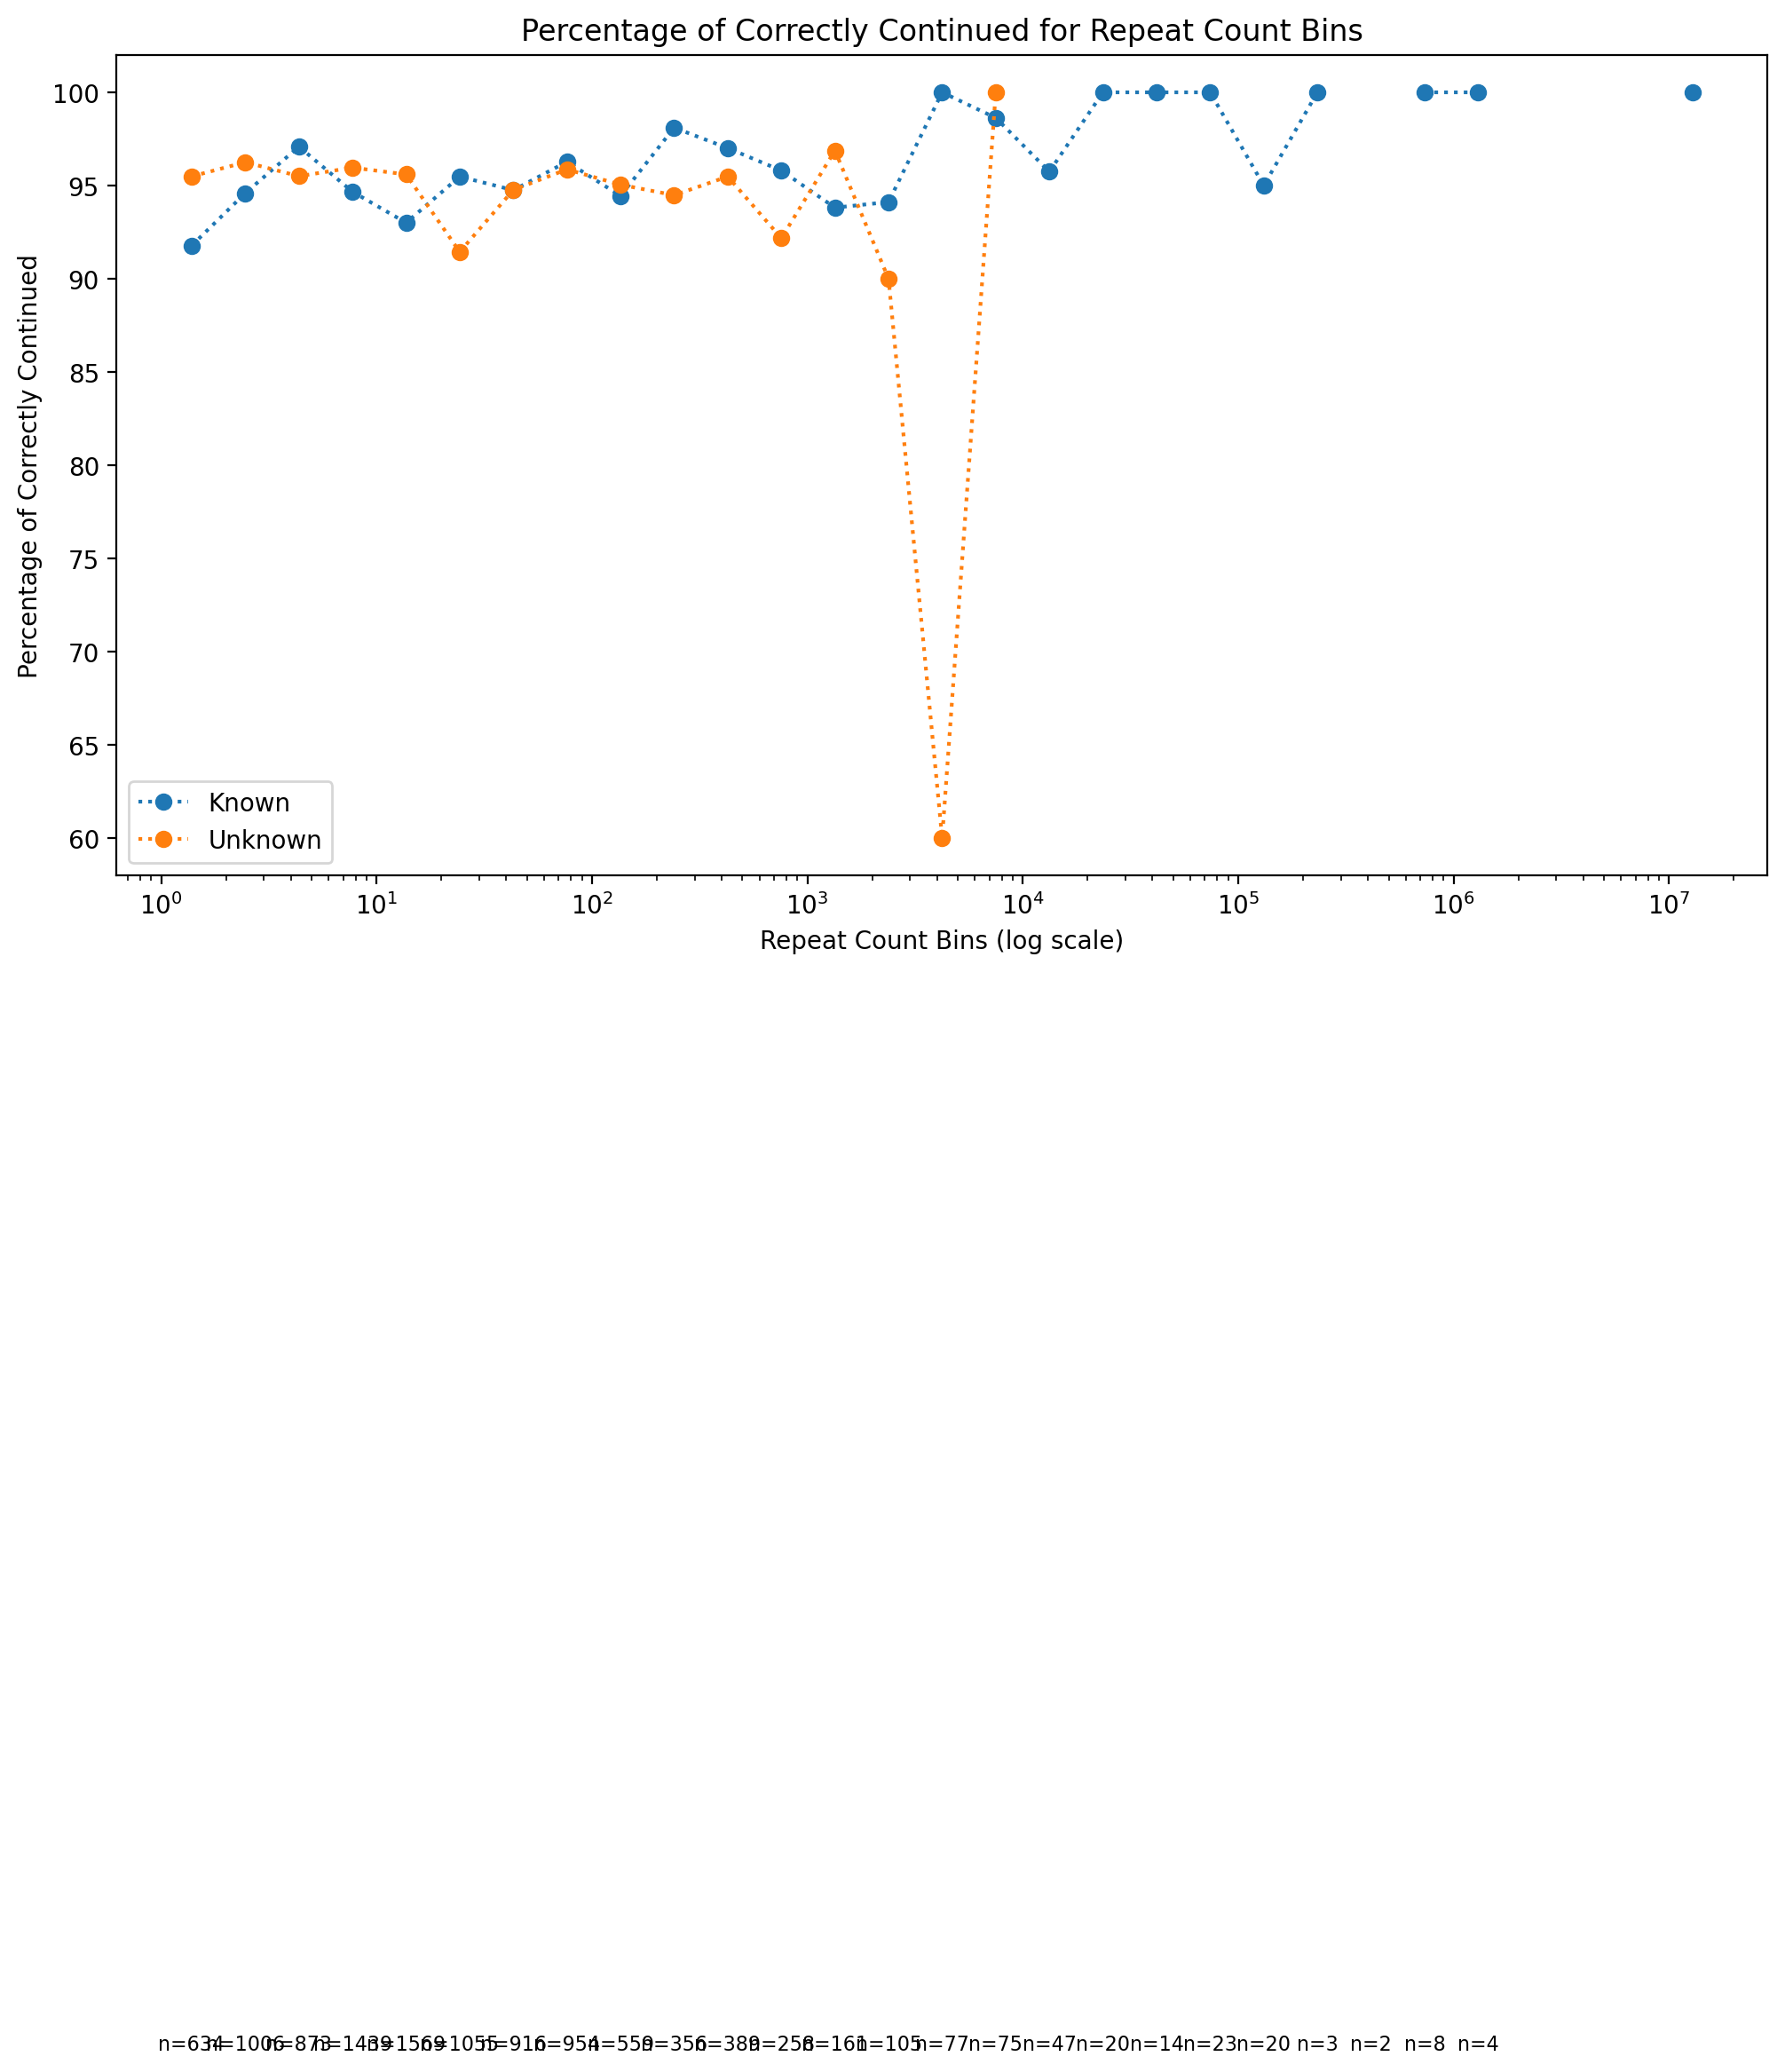

/local/j262r/28017303/cluster_tmp/ipykernel_73493/1684667353.py:48: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  known_length_stats = known_repeats.groupby('length_bin')['correctly_continued'].mean() * 100
/local/j262r/28017303/cluster_tmp/ipykernel_73493/1684667353.py:49: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unknown_length_stats = unknown_repeats.groupby('length_bin')['correctly_continued'].mean() * 100


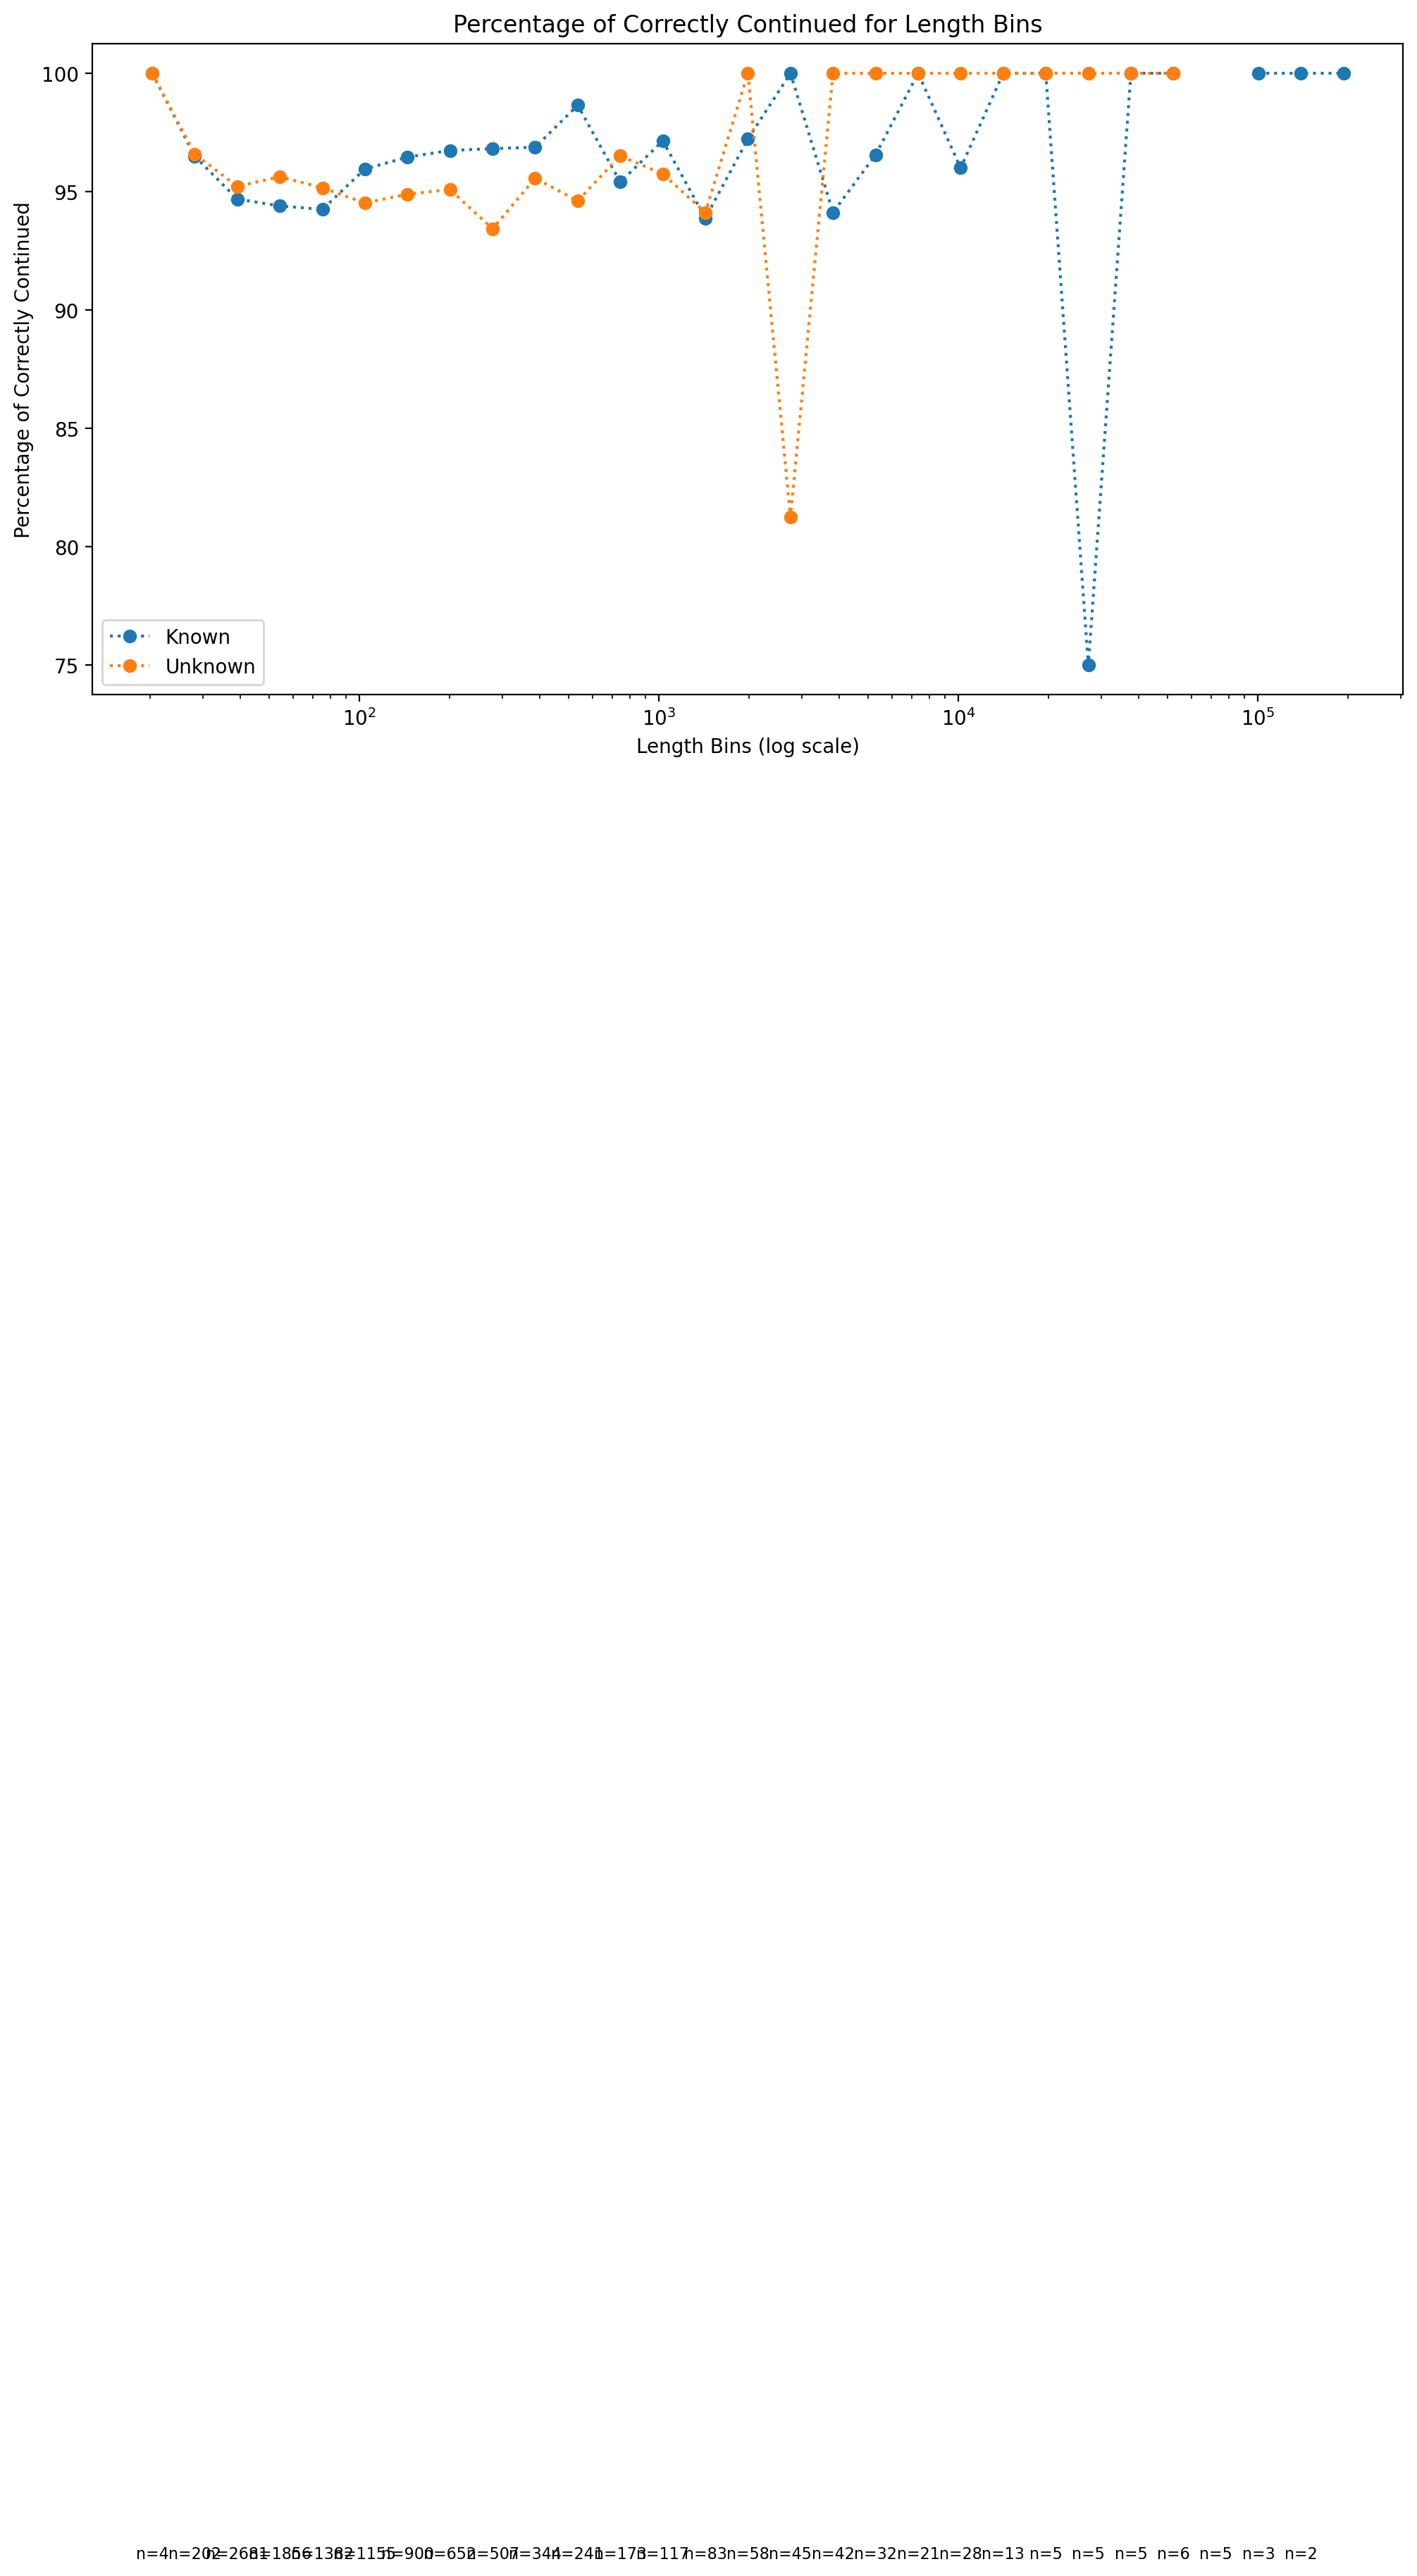

In [316]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming repeats DataFrame is already defined
n_bins = 30  # Define the number of bins

# Create logarithmically spaced bins for repeat_count and length
repeat_count_bins = np.logspace(np.log10(repeats['repeat_count'].min()), np.log10(repeats['repeat_count'].max()), n_bins)
length_bins = np.logspace(np.log10(repeats['length'].min()), np.log10(repeats['length'].max()), n_bins)

# Function to drop bins with only 1 value and store bin counts
def drop_small_bins_and_store_counts(series, bins):
    binned = pd.cut(series, bins=bins, include_lowest=True)
    bin_counts = binned.value_counts(sort=False)
    filtered_bins = bin_counts[bin_counts > 1].index
    filtered_counts = bin_counts[bin_counts > 1]
    print(bin_counts)
    return binned[binned.isin(filtered_bins)], filtered_counts

# Apply the function to the repeat_count and length
repeats['repeat_count_bin'], repeat_count_counts = drop_small_bins_and_store_counts(repeats['repeat_count'], repeat_count_bins)
repeats['length_bin'], length_counts = drop_small_bins_and_store_counts(repeats['length'], length_bins)

# Separate the data for 'known' and 'unknown' labels
known_repeats = repeats[repeats['label'] == 'known']
unknown_repeats = repeats[repeats['label'] == 'unknown']

# Calculate the percentage of true values in correctly_continued for each bin
known_repeat_count_stats = known_repeats.groupby('repeat_count_bin')['correctly_continued'].mean() * 100
unknown_repeat_count_stats = unknown_repeats.groupby('repeat_count_bin')['correctly_continued'].mean() * 100

# Plot the percentage of true values in correctly_continued for repeat_count bins
plt.figure(figsize=(12, 6))
plt.plot(known_repeat_count_stats.index.categories.mid, known_repeat_count_stats.values, marker='o', linestyle=':', label='Known')
plt.plot(unknown_repeat_count_stats.index.categories.mid, unknown_repeat_count_stats.values, marker='o', linestyle=':', label='Unknown')
plt.xscale('log')
plt.xlabel('Repeat Count Bins (log scale)')
plt.ylabel('Percentage of Correctly Continued')
plt.title('Percentage of Correctly Continued for Repeat Count Bins')
plt.legend()
plt.grid(False)
for i, count in enumerate(repeat_count_counts):
    plt.text(known_repeat_count_stats.index.categories.mid[i], -5, f'n={count}', ha='center', fontsize=8)
plt.show()

# Calculate the percentage of true values in correctly_continued for each bin
known_length_stats = known_repeats.groupby('length_bin')['correctly_continued'].mean() * 100
unknown_length_stats = unknown_repeats.groupby('length_bin')['correctly_continued'].mean() * 100

# Plot the percentage of true values in correctly_continued for length bins
plt.figure(figsize=(12, 6))
plt.plot(known_length_stats.index.categories.mid, known_length_stats.values, marker='o', linestyle=':', label='Known')
plt.plot(unknown_length_stats.index.categories.mid, unknown_length_stats.values, marker='o', linestyle=':', label='Unknown')
plt.xscale('log')
plt.xlabel('Length Bins (log scale)')
plt.ylabel('Percentage of Correctly Continued')
plt.title('Percentage of Correctly Continued for Length Bins')
plt.legend()
plt.grid(False)
for i, count in enumerate(length_counts): 
    plt.text(known_length_stats.index.categories.mid[i], -5, f'n={count}', ha='center', fontsize=8)
plt.show()


In [253]:
# Assuming repeats DataFrame is already defined
n_bins = 30  # Define the number of bins

# Create logarithmically spaced bins for repeat_count and length
repeat_count_bins = np.logspace(np.log10(repeats['repeat_count'].min()), np.log10(repeats['repeat_count'].max()), n_bins)
length_bins = np.logspace(np.log10(repeats['length'].min()), np.log10(repeats['length'].max()), n_bins)

# Bin the repeat_count and length
repeats['repeat_count_bin'] = pd.cut(repeats['repeat_count'], bins=repeat_count_bins, include_lowest=True)
repeats['length_bin'] = pd.cut(repeats['length'], bins=length_bins, include_lowest=True)

# Calculate the bin counts for repeat_count and length
repeat_count_counts = repeats['repeat_count_bin'].value_counts(sort=False)
length_counts = repeats['length_bin'].value_counts(sort=False)



# Create a DataFrame to store bin information and counts
bins_info = pd.DataFrame({
    'repeat_count_bin': repeat_count_counts.index.astype(str),
    'repeat_count_values': repeat_count_counts.values,
    'length_bin': length_counts.index.astype(str),
    'length_values': length_counts.values
})
bins_info

repeat_count_bin  repeat_count_values               length_bin  \
0               (0.999, 1.774]                 1070         (16.999, 23.582]   
1               (1.774, 3.146]                 1663         (23.582, 32.712]   
2               (3.146, 5.579]                 1057         (32.712, 45.377]   
3               (5.579, 9.895]                 1168         (45.377, 62.945]   
4              (9.895, 17.549]                 1012         (62.945, 87.316]   
5             (17.549, 31.125]                  963        (87.316, 121.122]   
6             (31.125, 55.202]                  801       (121.122, 168.016]   
7             (55.202, 97.906]                  535       (168.016, 233.067]   
8            (97.906, 173.645]                  352       (233.067, 323.302]   
9           (173.645, 307.973]                  359       (323.302, 448.474]   
10          (307.973, 546.215]                  314       (448.474, 622.109]   
11          (546.215, 968.757]                  175        (622.109, 862.97]   
12          (968.757, 1718.17]                  106       (862.97, 1197.083]   
13         (1718.17, 3047.315]                   88     (1197.083, 1660.555]   
14        (3047.315, 5404.662]                   73     (1660.555, 2303.467]   
15        (5404.662, 9585.611]                   73     (2303.467, 3195.295]   
16       (9585.611, 17000.865]                   47     (3195.295, 4432.409]   
17      (17000.865, 30152.426]                   20     (4432.409, 6148.494]   
18      (30152.426, 53477.796]                   14      (6148.494, 8528.99]   
19      (53477.796, 94847.249]                   23     (8528.99, 11831.137]   
20      (94847.249, 168219.36]                   20   (11831.137, 16411.768]   
21     (168219.36, 298350.805]                    3   (16411.768, 22765.869]   
22    (298350.805, 529149.574]                    1   (22765.869, 31580.072]   
23    (529149.574, 938490.083]                    2   (31580.072, 43806.846]   
24   (938490.083, 1664488.983]                    8    (43806.846, 60767.43]   
25  (1664488.983, 2952107.459]                    0    (60767.43, 84294.598]   
26  (2952107.459, 5235804.223]                    0   (84294.598, 116930.72]   
27  (5235804.223, 9286127.366]                    0  (116930.72, 162202.484]   
28   (9286127.366, 16469707.0]                    4   (162202.484, 225002.0]   

    length_values  
0               4  
1             198  
2            2489  
3            1651  
4            1287  
5            1103  
6             867  
7             637  
8             500  
9             340  
10            240  
11            172  
12            116  
13             81  
14             58  
15             44  
16             40  
17             32  
18             21  
19             27  
20             13  
21              5  
22              5  
23              5  
24              6  
25              0  
26              5  
27              3  
28              2

#### old violin plots for repeats

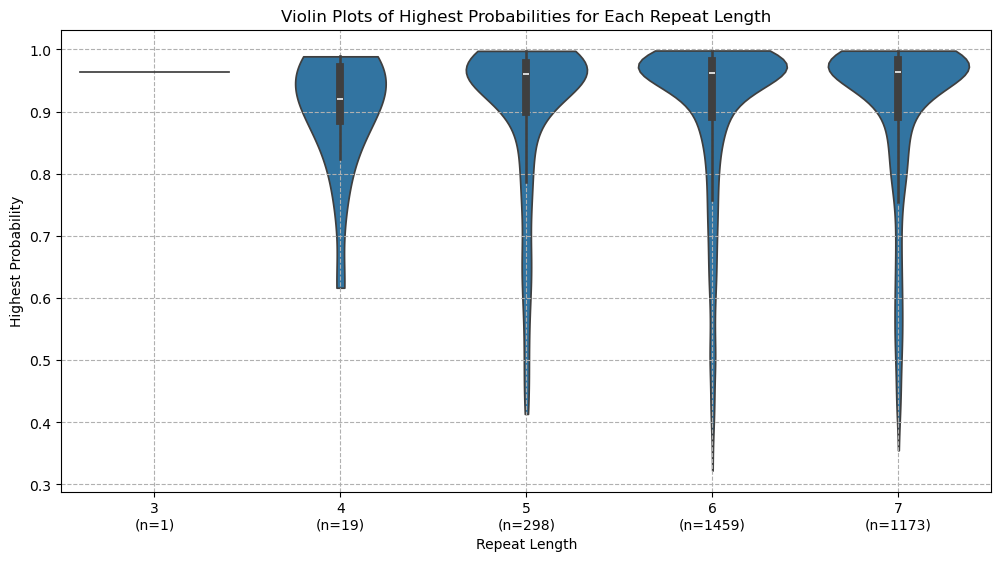

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already defined and contains the necessary data
df = unknown_df

repeat_length_counts = df['single_repeat_length'].value_counts()

# Create a custom x-axis label with the number of data points
custom_labels = [f'{length}\n(n={count})' for length, count in repeat_length_counts.sort_index().items()]

# Plot violin plots of highest_probs for each repeat length
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='single_repeat_length', y='highest_probs', cut=0)
plt.xlabel('Repeat Length')
plt.ylabel('Highest Probability')
plt.title('Violin Plots of Highest Probabilities for Each Repeat Length')
plt.xticks(ticks=range(len(custom_labels)), labels=custom_labels)

plt.grid(True, which="both", ls="--")
#plt.ylim(6e-1, 1e0) 
#plt.yscale('log')

plt.show()




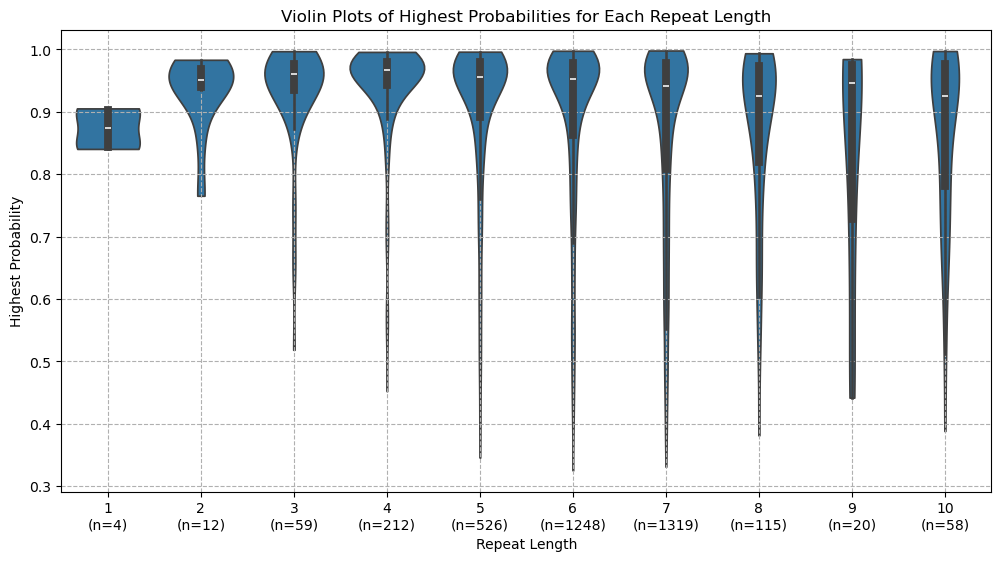

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already defined and contains the necessary data
df = known_df

repeat_length_counts = df['single_repeat_length'].value_counts()

# Create a custom x-axis label with the number of data points
custom_labels = [f'{length}\n(n={count})' for length, count in repeat_length_counts.sort_index().items()]

# Plot violin plots of highest_probs for each repeat length
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='single_repeat_length', y='highest_probs', cut=0)
plt.xlabel('Repeat Length')
plt.ylabel('Highest Probability')
plt.title('Violin Plots of Highest Probabilities for Each Repeat Length')
plt.xticks(ticks=range(len(custom_labels)), labels=custom_labels)

plt.grid(True, which="both", ls="--")
#plt.ylim(6e-1, 1e0) 
#plt.yscale('log')

plt.show()




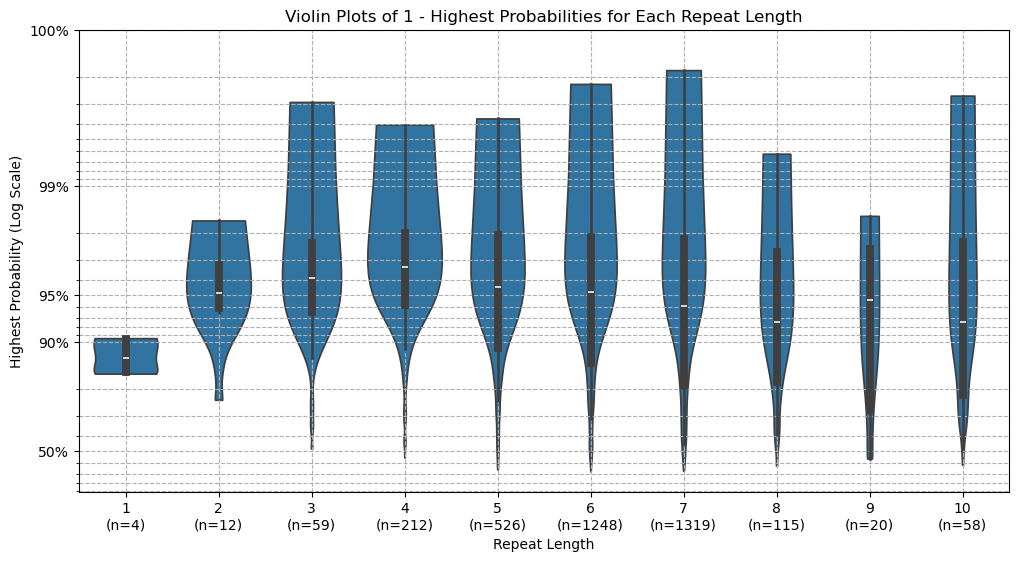

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Assuming df is already defined and contains the necessary data
df = known_df

# Transform highest_probs to emphasize values close to 1.0
df['transformed_probs'] = 1 - df[['A_probs', 'C_probs', 'G_probs', 'T_probs']].max(axis=1)

# Calculate the number of data points for each repeat length
repeat_length_counts = df['single_repeat_length'].value_counts()

# Create a custom x-axis label with the number of data points
custom_labels = [f'{length}\n(n={count})' for length, count in repeat_length_counts.sort_index().items()]

# Plot violin plots of transformed_probs for each repeat length
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='single_repeat_length', y='transformed_probs', cut=0)
plt.xlabel('Repeat Length')
plt.ylabel('Highest Probability (Log Scale)')
plt.title('Violin Plots of 1 - Highest Probabilities for Each Repeat Length')
plt.xticks(ticks=range(len(custom_labels)), labels=custom_labels)
plt.yscale('log')
plt.gca().invert_yaxis()  # Reverse the y-axis

# Custom y-axis labels to show as percentages
def percent_formatter(x, pos):
    if x == 0:
        return '100%'
    else:
        return f'{(1 - x) * 100:.0f}%'

plt.gca().yaxis.set_major_formatter(FuncFormatter(percent_formatter))

# Set specific ticks for 100%, 59%, and 50%
plt.gca().set_yticks([0.001, 0.01,0.05, 0.1, 0.5])

plt.grid(True, which="both", ls="--")
plt.show()


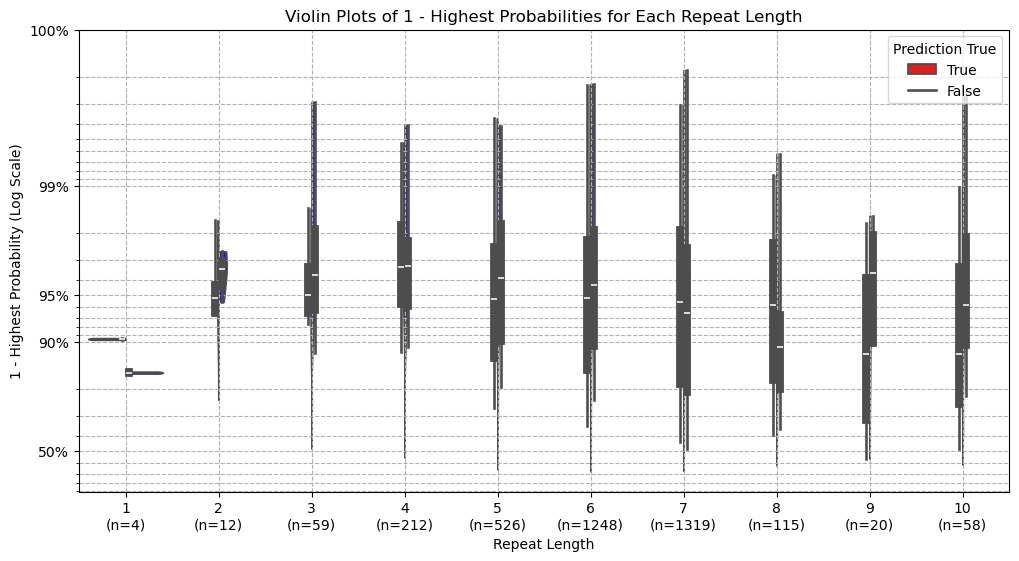

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Assuming df is already defined and contains the necessary data
df = known_df

# Transform highest_probs to emphasize values close to 1.0
df['transformed_probs'] = 1 - df[['A_probs', 'C_probs', 'G_probs', 'T_probs']].max(axis=1)

# Find the column with the highest probability
df['highest_prob_column'] = df[['A_probs', 'C_probs', 'G_probs', 'T_probs']].idxmax(axis=1)

# Find the column with the highest count
df['highest_count_column'] = df[['A', 'C', 'G', 'T']].idxmax(axis=1) + '_probs'

# Create a column indicating whether the prediction is true or false
df['prediction_true'] = df['highest_prob_column'] == df['highest_count_column']

# Calculate the number of data points for each repeat length
repeat_length_counts = df['single_repeat_length'].value_counts()

# Create a custom x-axis label with the number of data points
custom_labels = [f'{length}\n(n={count})' for length, count in repeat_length_counts.sort_index().items()]

# Plot violin plots of transformed_probs for each repeat length
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='single_repeat_length', y='transformed_probs', hue='prediction_true', split=True, cut=0, palette={True: 'blue', False: 'red'})
plt.xlabel('Repeat Length')
plt.ylabel('1 - Highest Probability (Log Scale)')
plt.title('Violin Plots of 1 - Highest Probabilities for Each Repeat Length')
plt.xticks(ticks=range(len(custom_labels)), labels=custom_labels)
plt.yscale('log')
plt.gca().invert_yaxis()  # Reverse the y-axis

# Custom y-axis labels to show as percentages
def percent_formatter(x, pos):
    if x == 0:
        return '100%'
    else:
        return f'{(1 - x) * 100:.0f}%'

plt.gca().yaxis.set_major_formatter(FuncFormatter(percent_formatter))

# Set specific ticks for 100%, 59%, and 50%
plt.gca().set_yticks([0.001, 0.01, 0.05, 0.1, 0.5])

plt.grid(True, which="both", ls="--")
plt.legend(title='Prediction True', loc='upper right', labels=['True', 'False'])
plt.show()


#### plots length vs repeat count, not needed 

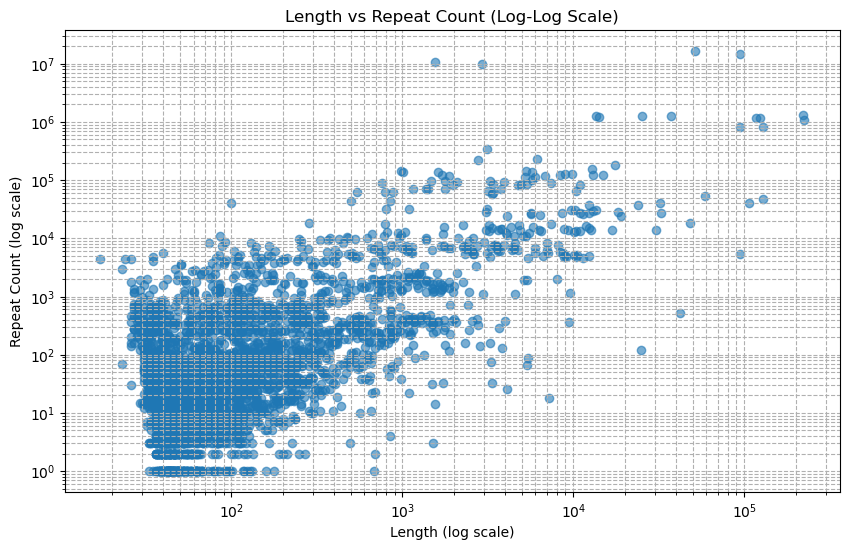

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
unknown_repeats_distribution = pd.read_csv('../genomic_data/t2t_annotation/t2t_autoreg_analysis/known_repeats_distribution.csv')

# Plot length against repeat_count with log-log scale
plt.figure(figsize=(10, 6))
plt.scatter(unknown_repeats_distribution['length'], unknown_repeats_distribution['repeat_count'], alpha=0.6)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Length (log scale)')
plt.ylabel('Repeat Count (log scale)')
plt.title('Length vs Repeat Count (Log-Log Scale)')
plt.grid(True, which="both", ls="--")
plt.show()


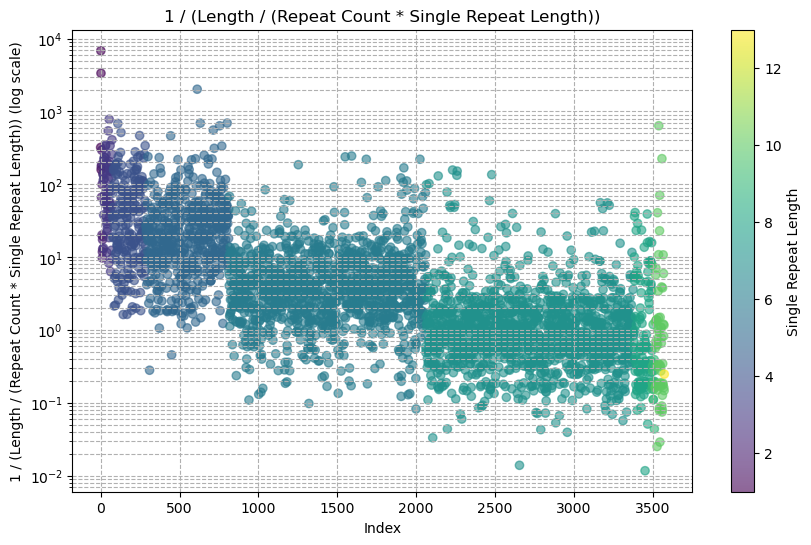

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
unknown_repeats_distribution = pd.read_csv('../genomic_data/t2t_annotation/t2t_autoreg_analysis/known_repeats_distribution.csv')
unknown_repeats_distribution = unknown_repeats_distribution[unknown_repeats_distribution['repeat_count'] != 0]

# Assuming there is a column 'single_repeat_length' in the CSV file
# Calculate the ratio of length to (repeat_count * single_repeat_length)
unknown_repeats_distribution['length_to_adjusted_repeat_count'] = unknown_repeats_distribution['length'] / (unknown_repeats_distribution['repeat_count'] * unknown_repeats_distribution['single_repeat_length'])

# Plot the ratio as dots, colored by 'single_repeat_length'
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    range(len(unknown_repeats_distribution)), 
    1 / unknown_repeats_distribution['length_to_adjusted_repeat_count'], 
    c=unknown_repeats_distribution['single_repeat_length'], 
    cmap='viridis', 
    alpha=0.6
)
plt.yscale('log')
plt.xlabel('Index')
plt.ylabel('1 / (Length / (Repeat Count * Single Repeat Length)) (log scale)')
plt.title('1 / (Length / (Repeat Count * Single Repeat Length))')
plt.grid(True, which="both", ls="--")
plt.colorbar(scatter, label='Single Repeat Length')
plt.show()


## to do

In [ ]:
"""have list of sequences repeated in training data
    can filter those for which results known 

Compare repeats model has seen (have results in train data) ...
... to ones model hasnt seen (not in train data but look for results in any other chromosome)

only include reps>1 maybe 
not sure how best to do with repeats longer than 7

steps:
    - for identified combinations find next likely position (done)
    - find the negative controls (done)
    - find their next positions (done)
    - run model on start=sequences, with_percentages (50 or 255 nucs??)(done)
    - extract percentages, add to df (done)
    - plot if correct prediction and how certain model was 
    - I HAVE ANNOTATION OF ALL THE REPEATS (expand on last 2 steps more informed...)(done)
    -and maybe compare with random non repeated 
    (could maybe even plot by length and repeat number...)... and nr instances found ..
            Think about what would make sense...


-maybe drop columns where most likely next is too ambiguous
"""

#- first concatenate known and unknown to 1 df!!!

#plot 1) repeat length against accuracy and then 2 graph for known repeats and unknown repeats
plot 2) (done) box plots of certainty, groups of 2 with known and unknown and then for different sequence lengths, 
        (in progress) - also for comparison one known/unknown for nonrepeated sequences (find 200each, make sure not repeated)
        - question to answer is if model gets more sure with repeat length or number and also if its as sure on unknown repeats
        - mark colourful repeats that occur with 100 or 255 length

- for repeats sequences doo same plot as for non-repeat sequences (maybe instead of correct incorrect have correctly/incorrectly 'continued!'
- everyyhing with length etc can cover independendly!! --> maybe certainty not that relevant then, just do accuracy!!
-appaarently doesnt matter if predictions are true... in x percent false and still on avg x percent certain-
-   somehow comment on longer repeats... check what LTR and LINE SINE whatever are, dont analyse tho 


## plotting model performance

In [97]:
#Basic_summary_train.columns=['context_size','n-gramm_train','accuracy_with_perfect_test']
#merged_df = pd.merge(merged_df, Basic_summary_train, on="context_size", how="left")
Basic_summary_train.head()

context_size  best_accuracy_train  accuracy_with_perfect_test
0             0               27.186                      27.186
1             1               29.789                      30.044
2             2               32.240                      32.703
3             3               32.478                      33.765
4             4               34.182                      35.899

In [98]:
import pandas as pd
basic_n_gramm_test=pd.read_csv('../results/autoregressive_best_model_calc/ordered_results/Basic_Summary_test.csv')
basic_n_gramm_test.columns=['context_size','n-gram_model','n_sequences','percentage_sequences']
basic_n_gramm_test.head()

context_size  n-gram_model  n_sequences  percentage_sequences
0             0        27.186            1                 100.0
1             1        30.044            4                 100.0
2             2        32.703           16                 100.0
3             3        33.765           64                 100.0
4             4        35.899          256                 100.0

In [99]:
import pandas as pd
import numpy as np

# Provided data
autoreg_evaluation = {
    "context_size":[    2,      4,     6,     8,     12,    16,     32,    64,    128,   255,    512,   1024],
    "acc_chr1":    [31.71,  32.07, 32.79,  33.59, 38.09,  40.66, 44.12,  48.33, 50.28, 52.39, np.nan, np.nan],
    "acc_chr1-15": [31.97, np.nan, 34.78, np.nan, 37.25, np.nan, 42.52, np.nan, 48.66, 50.51,  52.99,  52.63]
}



old_ngramm_model_data = {
    "context_size": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    "n-gramm_model": [29.24, 32.019, 33.358, 34.064, 35.523, 37.004, 38.845, 40.898, 43.425, 46.584, 50.524, 56.307, 65.639]
}

ngram_df = basic_n_gramm_test


# Convert to DataFrame
autoreg_df = pd.DataFrame(autoreg_evaluation)
#ngram_df = pd.DataFrame(old_ngramm_model_data)

# Merge the DataFrames based on context_size
merged_df = pd.merge(autoreg_df, ngram_df, on="context_size", how="left")

In [100]:
merged_df

context_size  acc_chr1  acc_chr1-15  n-gram_model  n_sequences  \
0              2     31.71        31.97        32.703         16.0   
1              4     32.07          NaN        35.899        256.0   
2              6     32.79        34.78        42.110       4096.0   
3              8     33.59          NaN        48.681      65536.0   
4             12     38.09        37.25        70.001    9850319.0   
5             16     40.66          NaN        96.027   31888263.0   
6             32     44.12        42.52           NaN          NaN   
7             64     48.33          NaN           NaN          NaN   
8            128     50.28        48.66           NaN          NaN   
9            255     52.39        50.51           NaN          NaN   
10           512       NaN        52.99           NaN          NaN   
11          1024       NaN        52.63           NaN          NaN   

    percentage_sequences  
0             100.000000  
1             100.000000  
2             100.000000  
3             100.000000  
4              58.712476  
5               0.742456  
6                    NaN  
7                    NaN  
8                    NaN  
9                    NaN  
10                   NaN  
11                   NaN

In [101]:
merged_df = pd.merge(merged_df, Basic_summary_train, on="context_size", how="left")
merged_df

context_size  acc_chr1  acc_chr1-15  n-gram_model  n_sequences  \
0              2     31.71        31.97        32.703         16.0   
1              4     32.07          NaN        35.899        256.0   
2              6     32.79        34.78        42.110       4096.0   
3              8     33.59          NaN        48.681      65536.0   
4             12     38.09        37.25        70.001    9850319.0   
5             16     40.66          NaN        96.027   31888263.0   
6             32     44.12        42.52           NaN          NaN   
7             64     48.33          NaN           NaN          NaN   
8            128     50.28        48.66           NaN          NaN   
9            255     52.39        50.51           NaN          NaN   
10           512       NaN        52.99           NaN          NaN   
11          1024       NaN        52.63           NaN          NaN   

    percentage_sequences  best_accuracy_train  accuracy_with_perfect_test  
0             100.000000               32.240                      32.703  
1             100.000000               34.182                      35.899  
2             100.000000               37.798                      42.110  
3             100.000000               41.737                      48.681  
4              58.712476                  NaN                         NaN  
5               0.742456                  NaN                         NaN  
6                    NaN                  NaN                         NaN  
7                    NaN                  NaN                         NaN  
8                    NaN                  NaN                         NaN  
9                    NaN                  NaN                         NaN  
10                   NaN                  NaN                         NaN  
11                   NaN                  NaN                         NaN

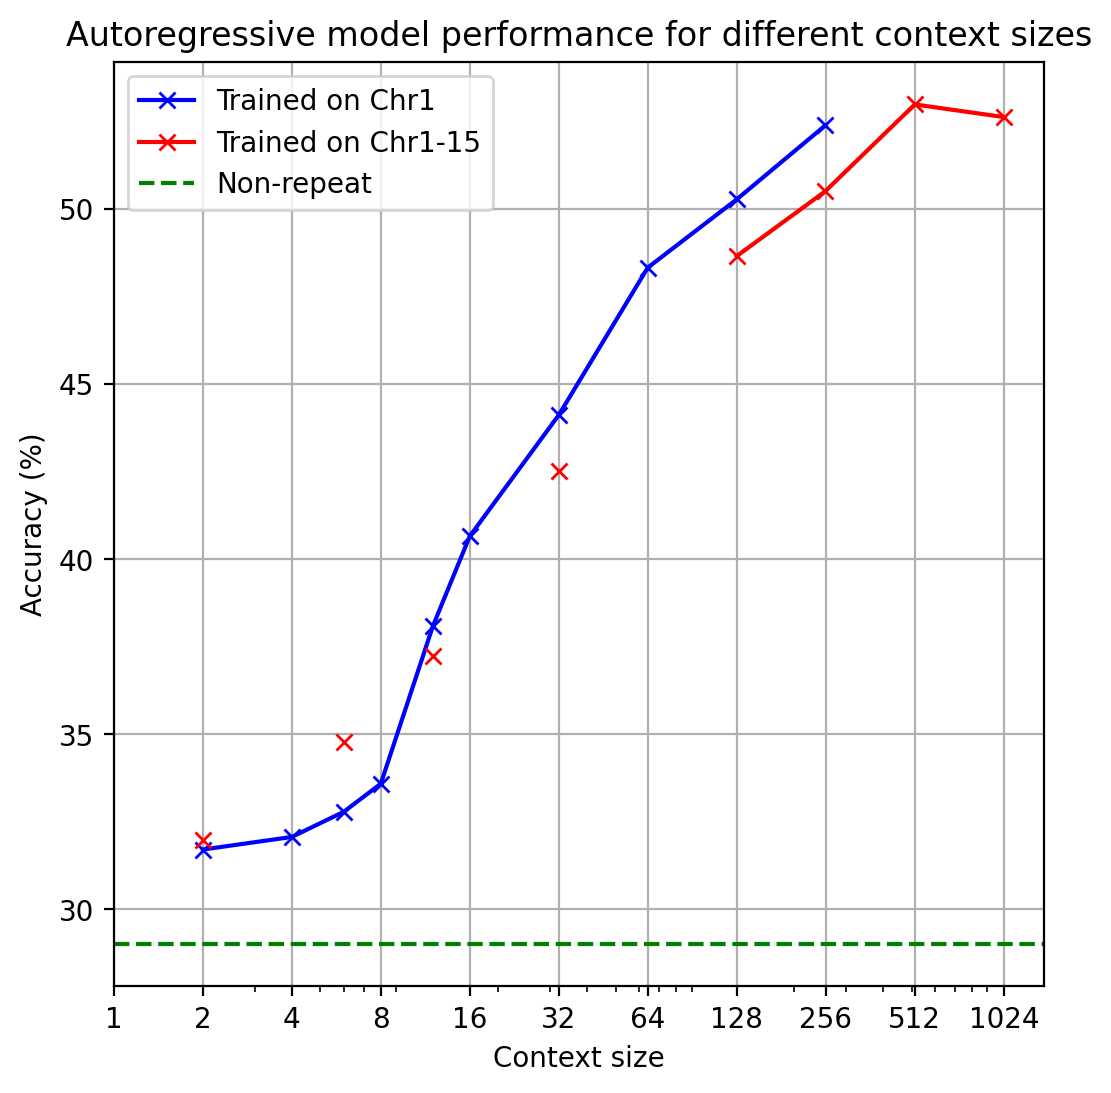

In [102]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare the data for conditional plotting
"""

ngram_context_size = ngram_df['context_size']
ngram_accuracy = ngram_df['n-gram_model']

ngram_context_size_train=Basic_summary_train['context_size']
ngram_accuracy_train = Basic_summary_train['best_accuracy_train']
# Split the data for conditional coloring
ngram_context_size_small = ngram_context_size[ngram_context_size <= 10]
ngram_accuracy_small = ngram_accuracy[ngram_context_size <= 10]
ngram_context_size_large = ngram_context_size[ngram_context_size > 10]
ngram_accuracy_large = ngram_accuracy[ngram_context_size > 10]
"""

# Plotting the data
plt.figure(figsize=(6, 6))
plt.plot(merged_df['context_size'], merged_df['acc_chr1'], marker='x', label='Trained on Chr1', color='blue')
plt.plot(merged_df['context_size'], merged_df['acc_chr1-15'], marker='x', label='Trained on Chr1-15', color='red')
"""
# Plot n-gram model with conditional coloring
plt.plot(ngram_context_size_small, ngram_accuracy_small, marker='o', color='green', linestyle='-', label='N-gramm test')
plt.plot(ngram_context_size_large, ngram_accuracy_large, marker='o', color='lightgreen', linestyle=':', label='-- model becomes useless')

plt.plot(ngram_context_size_train, ngram_accuracy_train, marker='o', color='purple', linestyle='-', label='N-gramm train')
"""
plt.xlabel('Context size')
plt.ylabel('Accuracy (%)')
plt.title('Autoregressive model performance for different context sizes')
#plt.ylim(20, 60)
plt.xscale('log')
#plt.xticks(merged_df['context_size'], labels=merged_df['context_size'])
plt.xticks([1,2,4,8,16,32,64,128,256,512,1024], labels=[1,2,4,8,16,32,64,128,256,512,1024])
plt.axhline(y=29, color='green', linestyle='--', label='Non-repeat')
plt.legend()
plt.grid(True)
plt.show()


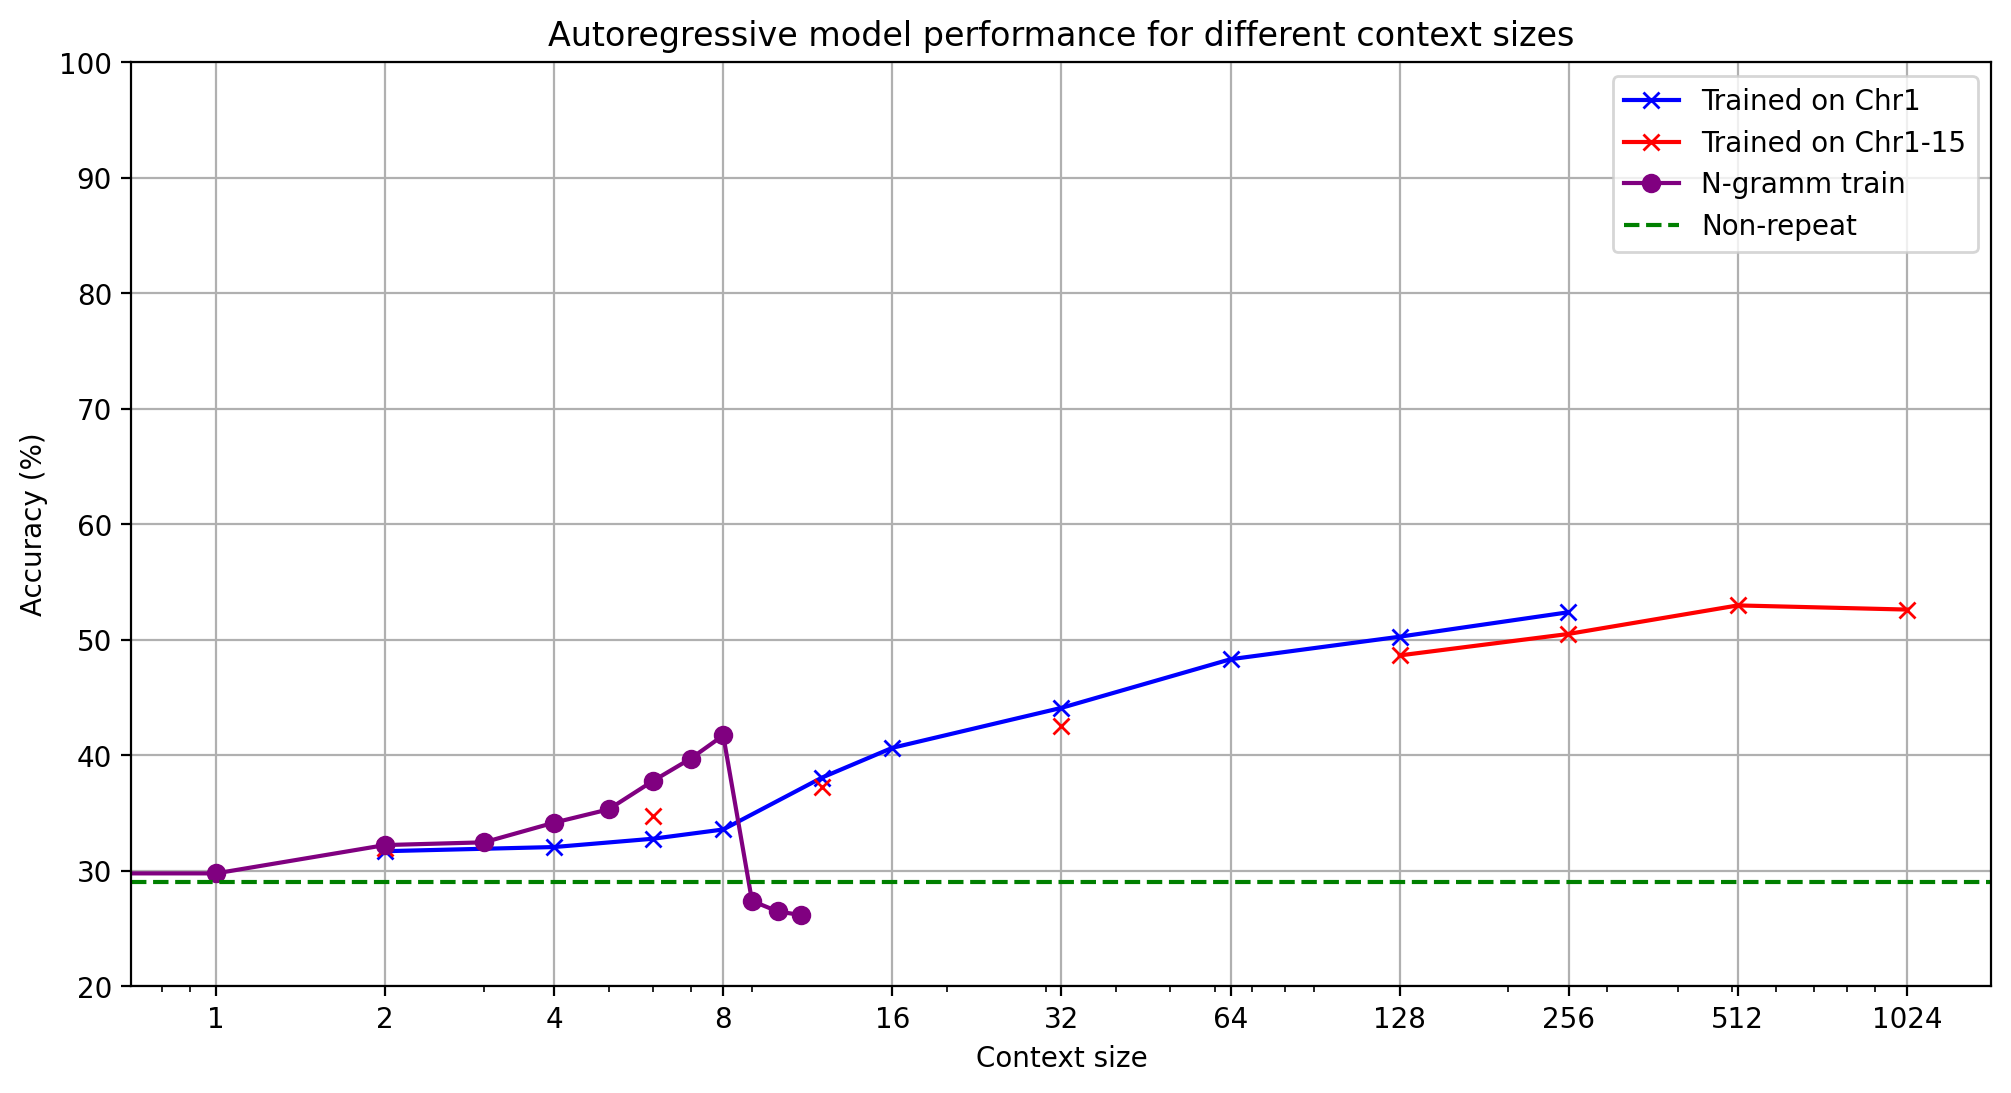

In [103]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare the data for conditional plotting


ngram_context_size = ngram_df['context_size']
ngram_accuracy = ngram_df['n-gram_model']

ngram_context_size_train=Basic_summary_train['context_size']
ngram_accuracy_train = Basic_summary_train['best_accuracy_train']
# Split the data for conditional coloring
ngram_context_size_small = ngram_context_size[ngram_context_size <= 10]
ngram_accuracy_small = ngram_accuracy[ngram_context_size <= 10]
ngram_context_size_large = ngram_context_size[ngram_context_size > 10]
ngram_accuracy_large = ngram_accuracy[ngram_context_size > 10]


# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(merged_df['context_size'], merged_df['acc_chr1'], marker='x', label='Trained on Chr1', color='blue')
plt.plot(merged_df['context_size'], merged_df['acc_chr1-15'], marker='x', label='Trained on Chr1-15', color='red')

# Plot n-gram model with conditional coloring
#plt.plot(ngram_context_size_small, ngram_accuracy_small, marker='o', color='green', linestyle='-', label='N-gramm test')
#plt.plot(ngram_context_size_large, ngram_accuracy_large, marker='o', color='lightgreen', linestyle=':', label='-- model becomes useless')

plt.plot(ngram_context_size_train, ngram_accuracy_train, marker='o', color='purple', linestyle='-', label='N-gramm train')

plt.xlabel('Context size')
plt.ylabel('Accuracy (%)')
plt.title('Autoregressive model performance for different context sizes')
plt.ylim(20, 100)
plt.xscale('log')
#plt.xticks(merged_df['context_size'], labels=merged_df['context_size'])
plt.xticks([1,2,4,8,16,32,64,128,256,512,1024], labels=[1,2,4,8,16,32,64,128,256,512,1024])
plt.axhline(y=29, color='green', linestyle='--', label='Non-repeat')
plt.legend()
plt.grid(True)
plt.show()


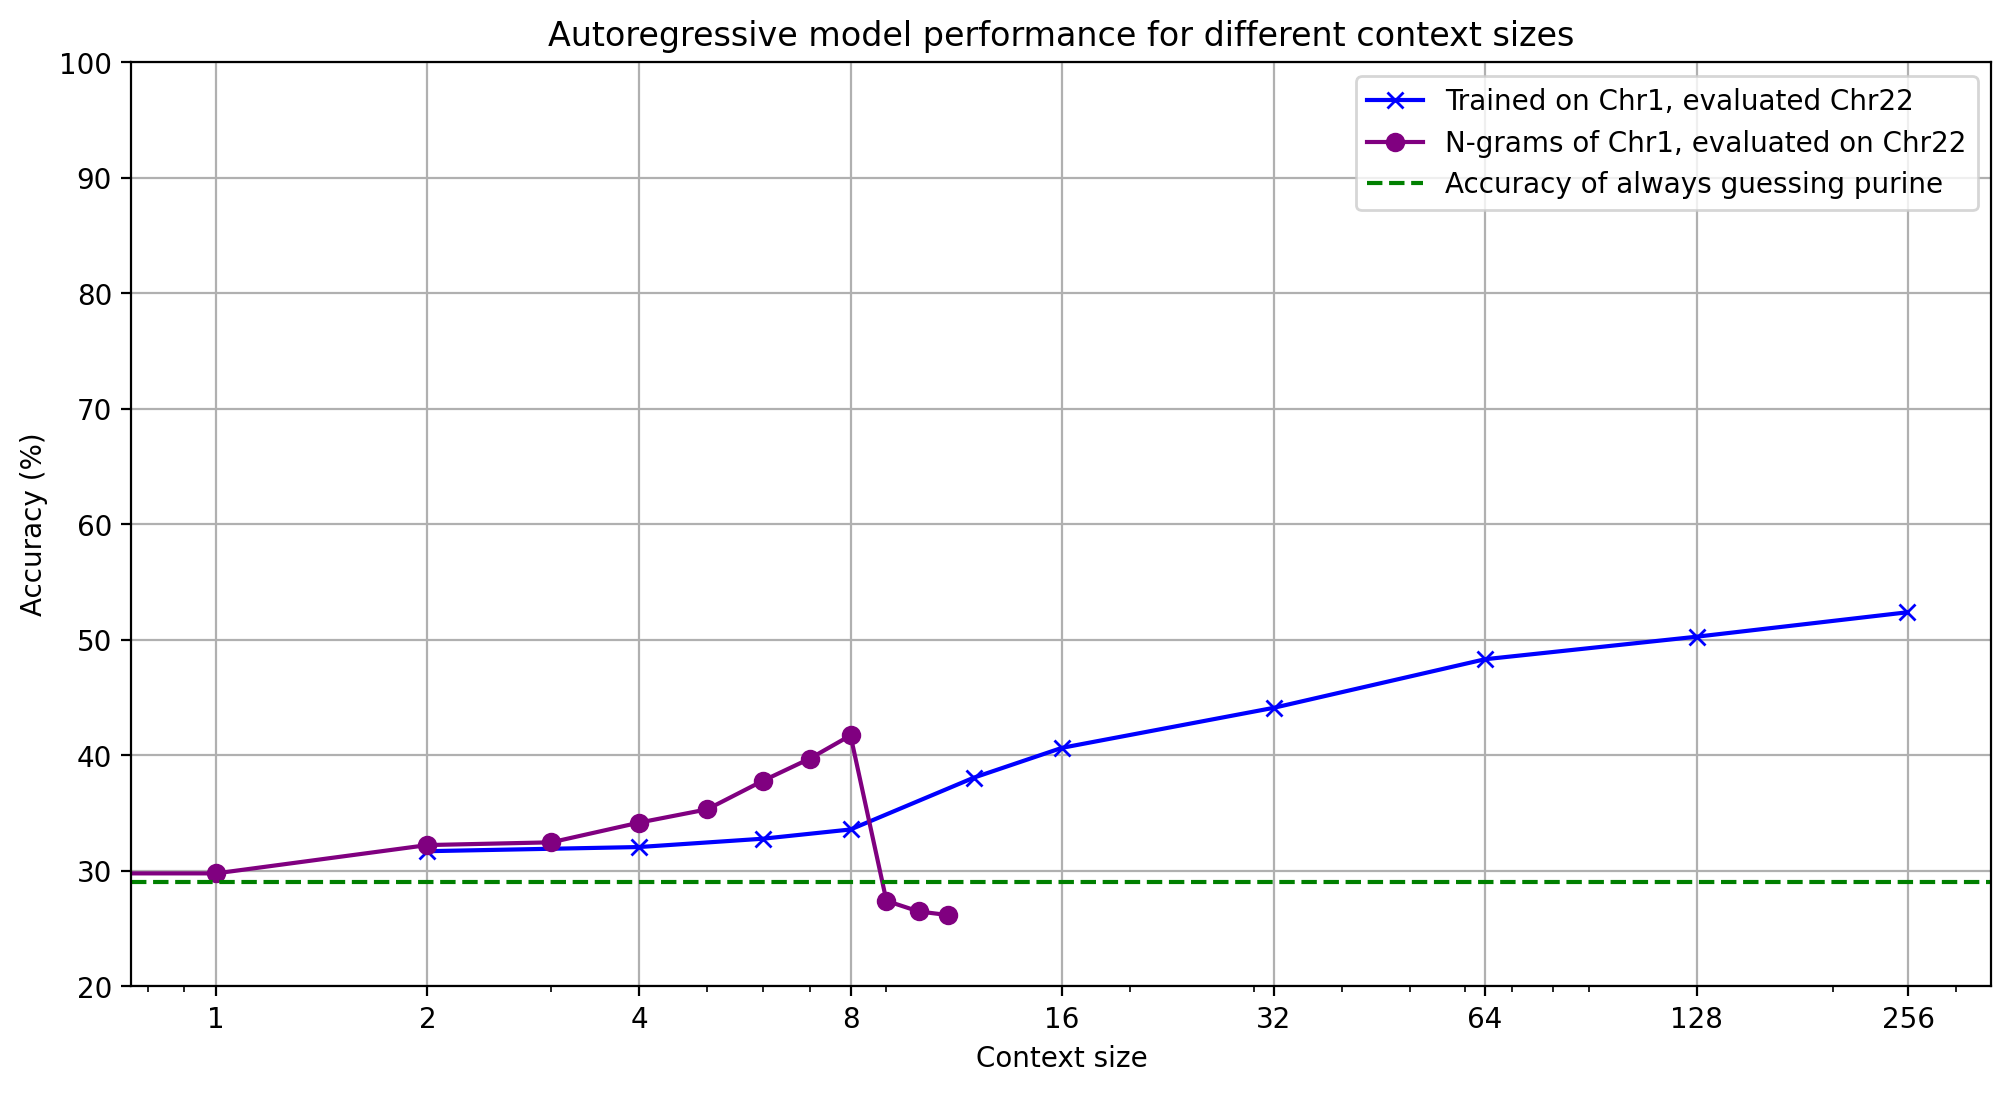

In [104]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare the data for conditional plotting


ngram_context_size = ngram_df['context_size']
ngram_accuracy = ngram_df['n-gram_model']

ngram_context_size_train=Basic_summary_train['context_size']
ngram_accuracy_train = Basic_summary_train['best_accuracy_train']
# Split the data for conditional coloring
ngram_context_size_small = ngram_context_size[ngram_context_size <= 10]
ngram_accuracy_small = ngram_accuracy[ngram_context_size <= 10]
ngram_context_size_large = ngram_context_size[ngram_context_size > 10]
ngram_accuracy_large = ngram_accuracy[ngram_context_size > 10]


# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(merged_df['context_size'], merged_df['acc_chr1'], marker='x', label='Trained on Chr1, evaluated Chr22', color='blue')
#plt.plot(merged_df['context_size'], merged_df['acc_chr1-15'], marker='x', label='Trained on Chr1-15', color='red')

# Plot n-gram model with conditional coloring
#plt.plot(ngram_context_size_small, ngram_accuracy_small, marker='o', color='green', linestyle='-', label='N-gramm test')
#plt.plot(ngram_context_size_large, ngram_accuracy_large, marker='o', color='lightgreen', linestyle=':', label='-- model becomes useless')

plt.plot(ngram_context_size_train, ngram_accuracy_train, marker='o', color='purple', linestyle='-', label='N-grams of Chr1, evaluated on Chr22')

plt.xlabel('Context size')
plt.ylabel('Accuracy (%)')
plt.title('Autoregressive model performance for different context sizes')
plt.ylim(20, 100)
plt.xscale('log')
#plt.xticks(merged_df['context_size'], labels=merged_df['context_size'])
plt.xticks([1,2,4,8,16,32,64,128,256], labels=[1,2,4,8,16,32,64,128,256])
#plt.xticks([1,2,4,8,16,32,64,128,256,512,1024], labels=[1,2,4,8,16,32,64,128,256,512,1024])
plt.axhline(y=29, color='green', linestyle='--', label='Accuracy of always guessing purine')
plt.legend()
plt.grid(True)
plt.show()


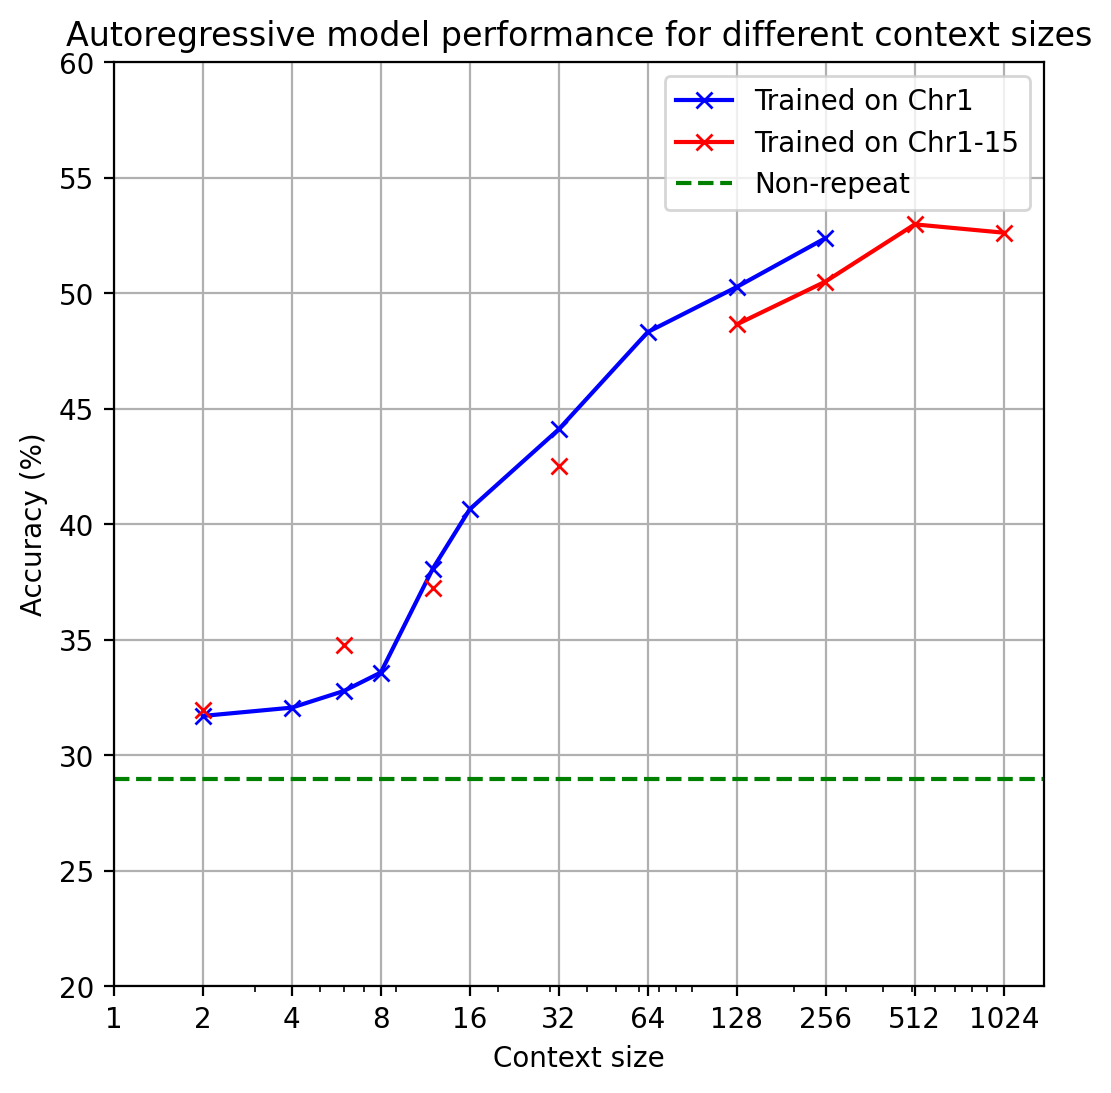

In [105]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare the data for conditional plotting
"""

ngram_context_size = ngram_df['context_size']
ngram_accuracy = ngram_df['n-gram_model']

ngram_context_size_train=Basic_summary_train['context_size']
ngram_accuracy_train = Basic_summary_train['best_accuracy_train']
# Split the data for conditional coloring
ngram_context_size_small = ngram_context_size[ngram_context_size <= 10]
ngram_accuracy_small = ngram_accuracy[ngram_context_size <= 10]
ngram_context_size_large = ngram_context_size[ngram_context_size > 10]
ngram_accuracy_large = ngram_accuracy[ngram_context_size > 10]
"""

# Plotting the data
plt.figure(figsize=(6, 6))
plt.plot(merged_df['context_size'], merged_df['acc_chr1'], marker='x', label='Trained on Chr1', color='blue')
plt.plot(merged_df['context_size'], merged_df['acc_chr1-15'], marker='x', label='Trained on Chr1-15', color='red')
"""
# Plot n-gram model with conditional coloring
plt.plot(ngram_context_size_small, ngram_accuracy_small, marker='o', color='green', linestyle='-', label='N-gramm test')
plt.plot(ngram_context_size_large, ngram_accuracy_large, marker='o', color='lightgreen', linestyle=':', label='-- model becomes useless')

plt.plot(ngram_context_size_train, ngram_accuracy_train, marker='o', color='purple', linestyle='-', label='N-gramm train')
"""
plt.xlabel('Context size')
plt.ylabel('Accuracy (%)')
plt.title('Autoregressive model performance for different context sizes')
plt.ylim(20, 60)
plt.xscale('log')
#plt.xticks(merged_df['context_size'], labels=merged_df['context_size'])
plt.xticks([1,2,4,8,16,32,64,128,256,512,1024], labels=[1,2,4,8,16,32,64,128,256,512,1024])
plt.axhline(y=29, color='green', linestyle='--', label='Non-repeat')
plt.legend()
plt.grid(True)
plt.show()


In [1]:
from collections import Counter

def top_n_grams(sequence, n, x):
    n_grams = (sequence[i:i+n] for i in range(len(sequence) - n + 1))
    n_gram_counts = Counter(n_grams)
    return n_gram_counts.most_common(x)


In [6]:
s='ATAGATCGATCCCGATCGATTAGCCATTACGGCATATTCGACTAGGGCTAAGCTA'

[('GATCGA', 2),
 ('ATCGAT', 2),
 ('ATAGAT', 1),
 ('TAGATC', 1),
 ('AGATCG', 1),
 ('TCGATC', 1),
 ('CGATCC', 1),
 ('GATCCC', 1),
 ('ATCCCG', 1),
 ('TCCCGA', 1),
 ('CCCGAT', 1),
 ('CCGATC', 1),
 ('CGATCG', 1),
 ('TCGATT', 1),
 ('CGATTA', 1),
 ('GATTAG', 1),
 ('ATTAGC', 1),
 ('TTAGCC', 1),
 ('TAGCCA', 1),
 ('AGCCAT', 1)]

In [9]:
t2t_testdata  = '../genomic_data/t2t_genome/chr22.txt'
with open(t2t_testdata, 'r') as file:
    sequence = file.readline().strip().upper()
top_n_grams(sequence,15,30)

[('GGAATGGAATGGAAT', 32309),
 ('TGGAATGGAATGGAA', 32078),
 ('ATGGAATGGAATGGA', 30621),
 ('GAATGGAATGGAATG', 30497),
 ('AATGGAATGGAATGG', 30333),
 ('TTTTTTTTTTTTTTT', 23045),
 ('AAAAAAAAAAAAAAA', 21681),
 ('TTCCATTCCATTCCA', 16738),
 ('ATTCCATTCCATTCC', 16182),
 ('TCCATTCCATTCCAT', 15967),
 ('CCATTCCATTCCATT', 15636),
 ('CATTCCATTCCATTC', 14878),
 ('ATCTCTGCACTGATC', 9292),
 ('GAGAATGCTTCTGTC', 8194),
 ('TGAGAATGCTTCTGT', 8163),
 ('CTGTACATAAAATAT', 7892),
 ('GTTTCCAACGAAATC', 7829),
 ('CCGTTTCCAACGAAA', 7807),
 ('TCCCGTTTCCAACGA', 7789),
 ('CGTTTCCAACGAAAT', 7779),
 ('CCCGTTTCCAACGAA', 7776),
 ('TATCTCTGCACTGAT', 7768),
 ('CTCTGCACTGATCAC', 7428),
 ('AAAATATCAAAGTAC', 7312),
 ('TGATCACCCAGGTGA', 7219),
 ('GATCACCCAGGTGAT', 7080),
 ('TCTGCACTGATCACC', 6985),
 ('AATGCTTCTGTCTAG', 6848),
 ('TGCACTGATCACCCA', 6847),
 ('TTATATACTGTACAT', 6830)]

In [10]:
t2t_testdata  = '../genomic_data/t2t_genome/chr22.txt'
with open(t2t_testdata, 'r') as file:
    sequence = file.readline().strip().upper()
top_n_grams(sequence,30,30)

[('GGAATGGAATGGAATGGAATGGAATGGAAT', 7341),
 ('TGGAATGGAATGGAATGGAATGGAATGGAA', 6975),
 ('GAATGGAATGGAATGGAATGGAATGGAATG', 6527),
 ('ATGGAATGGAATGGAATGGAATGGAATGGA', 6508),
 ('AATGGAATGGAATGGAATGGAATGGAATGG', 6439),
 ('GAAGATATTCCCGTTTCCAACGAAATCTTC', 3665),
 ('AAGATATTCCCGTTTCCAACGAAATCTTCA', 3650),
 ('TATGAAGATATTCCCGTTTCCAACGAAATC', 3535),
 ('ATATGAAGATATTCCCGTTTCCAACGAAAT', 3526),
 ('ATTCCATTCCATTCCATTCCATTCCATTCC', 3507),
 ('TTCCATTCCATTCCATTCCATTCCATTCCA', 3505),
 ('TCCATTCCATTCCATTCCATTCCATTCCAT', 3302),
 ('CCATTCCATTCCATTCCATTCCATTCCATT', 3199),
 ('CATTCCATTCCATTCCATTCCATTCCATTC', 3071),
 ('TACATAAAATATGAAAGTACATCAAATATA', 2689),
 ('GTACATAAAATATGAAAGTACATCAAATAT', 2685),
 ('CAGATTCTACAAAAAGAGTGTTTCAAAACT', 2065),
 ('AGATTCTACAAAAAGAGTGTTTCAAAACTG', 2064),
 ('AATGCTTCTGTCTAGTTTTTATTTGAAGAT', 2043),
 ('TGCTTCTGTCTAGTTTTTATTTGAAGATAT', 2042),
 ('ATGCTTCTGTCTAGTTTTTATTTGAAGATA', 2040),
 ('AGAATGCTTCTGTCTAGTTTTTATTTGAAG', 2035),
 ('GAATGCTTCTGTCTAGTTTTTATTTGAAGA', 2026),
 ('GCAGATTC

In [11]:
t2t_testdata  = '../genomic_data/t2t_genome/chr22.txt'
with open(t2t_testdata, 'r') as file:
    sequence = file.readline().strip().upper()
top_n_grams(sequence,100,30)

[('CAAACAAGTTTATGAGAATGCTTCTGTCTAGTTTTTATTTGAAGATATTTCCTTTCTCACCATAGACCTGAAAGCTGTCCTAATGTTCACTTCCAGATAC',
  1599),
 ('TTTATGAGAATGCTTCTGTCTAGTTTTTATTTGAAGATATTTCCTTTCTCACCATAGACCTGAAAGCTGTCCTAATGTTCACTTCCAGATACTACAGAAA',
  1591),
 ('GTTTATGAGAATGCTTCTGTCTAGTTTTTATTTGAAGATATTTCCTTTCTCACCATAGACCTGAAAGCTGTCCTAATGTTCACTTCCAGATACTACAGAA',
  1590),
 ('AACAAGTTTATGAGAATGCTTCTGTCTAGTTTTTATTTGAAGATATTTCCTTTCTCACCATAGACCTGAAAGCTGTCCTAATGTTCACTTCCAGATACTA',
  1588),
 ('AGTTTATGAGAATGCTTCTGTCTAGTTTTTATTTGAAGATATTTCCTTTCTCACCATAGACCTGAAAGCTGTCCTAATGTTCACTTCCAGATACTACAGA',
  1588),
 ('AAGTTTATGAGAATGCTTCTGTCTAGTTTTTATTTGAAGATATTTCCTTTCTCACCATAGACCTGAAAGCTGTCCTAATGTTCACTTCCAGATACTACAG',
  1587),
 ('TTATGAGAATGCTTCTGTCTAGTTTTTATTTGAAGATATTTCCTTTCTCACCATAGACCTGAAAGCTGTCCTAATGTTCACTTCCAGATACTACAGAAAG',
  1587),
 ('ACAAGTTTATGAGAATGCTTCTGTCTAGTTTTTATTTGAAGATATTTCCTTTCTCACCATAGACCTGAAAGCTGTCCTAATGTTCACTTCCAGATACTAC',
  1586),
 ('CAAGTTTATGAGAATGCTTCTGTCTAGTTTTTATTTGAAGATATTTCCTTTCTCACCATAGACCTGAAAGCTGTCCT

In [12]:
t2t_testdata  = '../genomic_data/t2t_genome/chr22.txt'
with open(t2t_testdata, 'r') as file:
    sequence = file.readline().strip().upper()
top_n_grams(sequence,500,30)

[('GGAATGTTCAACTCTATGAGTTGAATGCAAACATCACAAAGACGTTTCTGAGAATGCTTCTGTCTAGATTTGATATGAAGATATTCCCGTTTCCAACGAAATCTTCAAATCTATCCAAATGTCCACTTGCAGATTCAACAAAAAGTGTTTTTCAGAACTGCTCTATCAAAAGAAAGATCCACCTCTGTTAGCTGAGTTCACACATCACAAACAAGTTTATGAGAATGCTTCTGTCTAGTTTTTATTTGAAGATATTTCCTTTCTCACCATAGACCTGAAAGCTGTCCTAATGTTCACTTCCAGATACTACAGAAAGAGTGTTTCAAAACTGCTGTACGAAAGGGAATGTTCAACTCTGTGACTTGAATGCACACATCACAAAGAAGTTTCTGAGGATGCTGCTGTCTACTTTTTATACGTAATCCCGTTTCCAACGAAATCCTCCAAGCTATCCAAATATCCACTTGCAGATTCCACAGAAAGACTGTTTCAAAACTGCT',
  423),
 ('GAATGTTCAACTCTATGAGTTGAATGCAAACATCACAAAGACGTTTCTGAGAATGCTTCTGTCTAGATTTGATATGAAGATATTCCCGTTTCCAACGAAATCTTCAAATCTATCCAAATGTCCACTTGCAGATTCAACAAAAAGTGTTTTTCAGAACTGCTCTATCAAAAGAAAGATCCACCTCTGTTAGCTGAGTTCACACATCACAAACAAGTTTATGAGAATGCTTCTGTCTAGTTTTTATTTGAAGATATTTCCTTTCTCACCATAGACCTGAAAGCTGTCCTAATGTTCACTTCCAGATACTACAGAAAGAGTGTTTCAAAACTGCTGTACGAAAGGGAATGTTCAACTCTGTGACTTGAATGCACACATCACAAAGAAGTTTCTGAGGATGCTGCTGTCTACTTTTTATACGTAATCCCGTTTCCAACGAAATCCTCCAAGCTATCCAAATATCCACTTGCAGATTCCACAGAAAGA

In [ ]:
t2t_testdata  = '../genomic_data/t2t_genome/chr22.txt'
with open(t2t_testdata, 'r') as file:
    sequence = file.readline().strip().upper()
top_n_grams(sequence,1000,30)